# RNN and LSTM
- Each observation is a time series. This notebook aims to try the RNN method for single time series

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler

In [3]:
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [4]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [5]:
#df_cal0 = pd.read_csv('/Users/yanzeliu/Downloads/m5-forecasting-accuracy/calendar.csv')
#df_train0 = pd.read_csv("C:\\Users\\dyabin\\Documents\\Github_data\\m5-forecasting-accuracy\\sales_train_validation.csv")
df_train0 = pd.read_csv('/Users/yanzeliu/Downloads/m5-forecasting-accuracy/sales_train_validation.csv')
#df_price0 = pd.read_csv("/Users/yanzeliu/Downloads/m5-forecasting-accuracy/sell_prices.csv")

In [6]:
df_train0.head()

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  d_1  d_2  d_3  d_4  ...  d_1904  d_1905  d_1906  d_1907  d_1908  \
0       CA    0    0    0    0  ...       1       3       0       1       1   
1       CA    0    0    0    0  ...       0       0       0       0       0   
2       CA    0    0    0    0  ...       2       1       2       1       1   
3       CA    0    0    0    0  ...       1       0       5       4       1   
4       CA    0    0    0    0  ...       2       1       1       0       1   

   d_1909  d_1910  d_1911  d_1912  d_1913  
0       1       3       0       1       1  
1       1       0       0       0       0  
2       1       0       1       1       1  
3       0       1       3       7       2  
4       1       2       2       2       4  

[5 rows x 1919 columns]

In [13]:
str(df_train0[df_train0.columns[8]].dtype)[:3]

'int'

In [8]:
#df_Sample_Submission = pd.read_csv("C:\\Users\\dyabin\\Documents\\Github_data\\m5-forecasting-accuracy\\sample_submission.csv")
df_Sample_Submission = pd.read_csv('/Users/yanzeliu/Downloads/m5-forecasting-accuracy/sample_submission.csv')

In [9]:
df_Sample_Submission.set_index("id", inplace=True)

In [10]:
print(df_Sample_Submission.shape)
df_Sample_Submission.head()

(60980, 28)


F1  F2  F3  F4  F5  F6  F7  F8  F9  F10  ...  \
id                                                                      ...   
HOBBIES_1_001_CA_1_validation   0   0   0   0   0   0   0   0   0    0  ...   
HOBBIES_1_002_CA_1_validation   0   0   0   0   0   0   0   0   0    0  ...   
HOBBIES_1_003_CA_1_validation   0   0   0   0   0   0   0   0   0    0  ...   
HOBBIES_1_004_CA_1_validation   0   0   0   0   0   0   0   0   0    0  ...   
HOBBIES_1_005_CA_1_validation   0   0   0   0   0   0   0   0   0    0  ...   

                               F19  F20  F21  F22  F23  F24  F25  F26  F27  \
id                                                                           
HOBBIES_1_001_CA_1_validation    0    0    0    0    0    0    0    0    0   
HOBBIES_1_002_CA_1_validation    0    0    0    0    0    0    0    0    0   
HOBBIES_1_003_CA_1_validation    0    0    0    0    0    0    0    0    0   
HOBBIES_1_004_CA_1_validation    0    0    0    0    0    0    0    0    0   
HOBBIES_1_005_CA_1_validation    0    0    0    0    0    0    0    0    0   

                               F28  
id                                  
HOBBIES_1_001_CA_1_validation    0  
HOBBIES_1_002_CA_1_validation    0  
HOBBIES_1_003_CA_1_validation    0  
HOBBIES_1_004_CA_1_validation    0  
HOBBIES_1_005_CA_1_validation    0  

[5 rows x 28 columns]

In [11]:
df_train0.head()

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  d_1  d_2  d_3  d_4  ...  d_1904  d_1905  d_1906  d_1907  d_1908  \
0       CA    0    0    0    0  ...       1       3       0       1       1   
1       CA    0    0    0    0  ...       0       0       0       0       0   
2       CA    0    0    0    0  ...       2       1       2       1       1   
3       CA    0    0    0    0  ...       1       0       5       4       1   
4       CA    0    0    0    0  ...       2       1       1       0       1   

   d_1909  d_1910  d_1911  d_1912  d_1913  
0       1       3       0       1       1  
1       1       0       0       0       0  
2       1       0       1       1       1  
3       0       1       3       7       2  
4       1       2       2       2       4  

[5 rows x 1919 columns]

## Convert the first row to time series data type
- Use the first row: HOBBIES_1_001, from CA_1
- The timeline is 2011-01-29 to 2016-06-19: This is the whole 1969 days 
- The given training data is from 2011-01-29 to 2016-04-24
- The validation time period is from 2016-04-25 to 2016-06-19
- The data look rather **stationary**

In [12]:
# create time series index
idx_train = pd.date_range(start='2011-01-29', periods=1913, freq='D')
idx_val = pd.date_range(start='2016-04-25', periods=28, freq='D') #For validation time period
idx_eval = pd.date_range(start='2016-05-23', periods=28, freq='D') #For evaluation time period

In [15]:
idx_eval

DatetimeIndex(['2016-05-23', '2016-05-24', '2016-05-25', '2016-05-26',
               '2016-05-27', '2016-05-28', '2016-05-29', '2016-05-30',
               '2016-05-31', '2016-06-01', '2016-06-02', '2016-06-03',
               '2016-06-04', '2016-06-05', '2016-06-06', '2016-06-07',
               '2016-06-08', '2016-06-09', '2016-06-10', '2016-06-11',
               '2016-06-12', '2016-06-13', '2016-06-14', '2016-06-15',
               '2016-06-16', '2016-06-17', '2016-06-18', '2016-06-19'],
              dtype='datetime64[ns]', freq='D')

In [16]:
df_row1 = pd.DataFrame(df_train0.iloc[1000,6:].transpose())
df_row1.columns = ["Item_Sales"]
df_row1.head()

Item_Sales
d_1          0
d_2          0
d_3          0
d_4          0
d_5          0

In [17]:
# change the original index to datetime index
df_row1.set_index(idx_train, inplace=True)

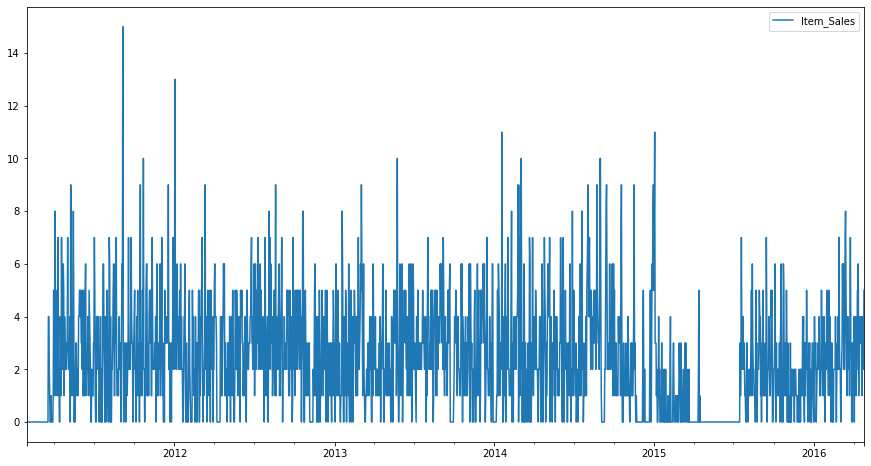

In [18]:
# visualize the one row
df_row1.plot(kind='line', figsize=(15,8))

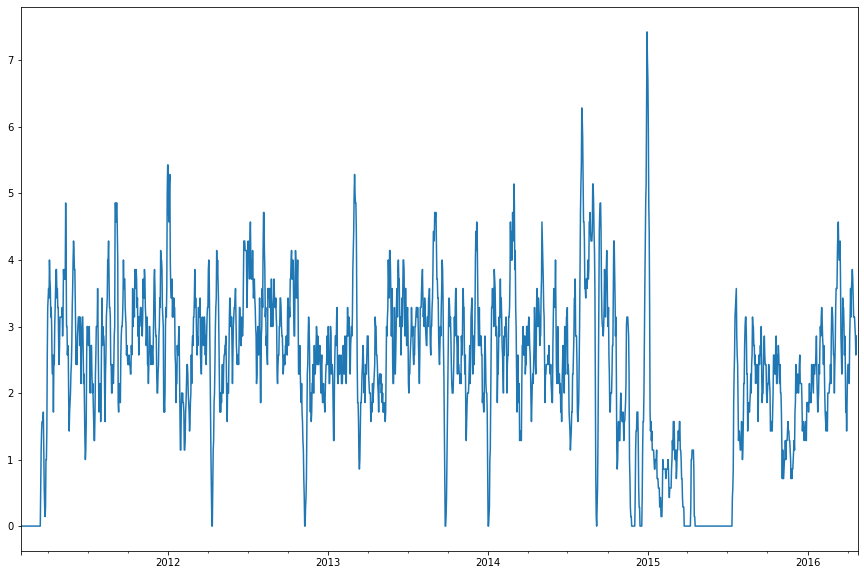

In [19]:
# times series decompose results
df_row1 = df_row1.astype(int)
tsa_decompose = seasonal_decompose(df_row1)
tsa_decompose.trend.plot(figsize=(15,10));

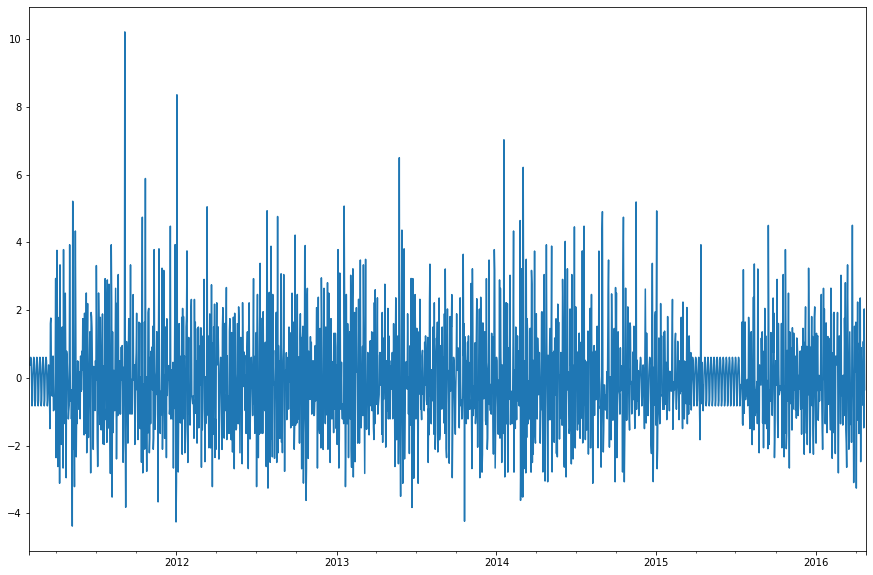

In [20]:
tsa_decompose.resid.plot(figsize=(15,10));

## Process RNN with the one item

In [21]:
# transpose the original dataframe
df_train1 = df_train0.iloc[:,6:].transpose()

In [22]:
# set the datetime index
df_train1.set_index(idx_train, inplace=True)

In [23]:
df_train1.head()

0      1      2      3      4      5      6      7      8      \
2011-01-29      0      0      0      0      0      0      0     12      2   
2011-01-30      0      0      0      0      0      0      0     15      0   
2011-01-31      0      0      0      0      0      0      0      0      7   
2011-02-01      0      0      0      0      0      0      0      0      3   
2011-02-02      0      0      0      0      0      0      0      0      0   

            9      ...  30480  30481  30482  30483  30484  30485  30486  \
2011-01-29      0  ...      0     14      1      0      4      0      0   
2011-01-30      0  ...      0     11      1      0      4      0      0   
2011-01-31      1  ...      0      5      1      0      2      2      0   
2011-02-01      0  ...      0      6      1      0      5      2      0   
2011-02-02      0  ...      0      5      1      0      2      0      0   

            30487  30488  30489  
2011-01-29      0      0      0  
2011-01-30      6      0      0  
2011-01-31      0      0      0  
2011-02-01      2      0      0  
2011-02-02      2      0      0  

[5 rows x 30490 columns]

**transform all items**

In [32]:
# separate train and validation
#df_train2 = df_train1.iloc[0:-28,]
#df_val2 = df_train1.iloc[-28:,]

In [34]:
# scale the dataset
scaler = MinMaxScaler().fit(df_train1)
train_scale = scaler.transform(df_train1)
#val_scale = scaler.transform(df_val1)

In [ ]:
#train_scale[:,0]

In [ ]:
#train_scale = train_scale.reshape(1885, 30490,1)

In [ ]:
#train_scale[:,0]

In [ ]:
train_scale[0:10,0:5]
train_scale[:,0].shape

### Preparation for RNN input

In [35]:
n_input = 7
n_features = train_scale.shape[1]

In [36]:
ts_generator = TimeseriesGenerator(train_scale, train_scale, length=n_input, batch_size=128)

In [37]:
X,y = ts_generator[0]
X.shape
#y.shape

(128, 7, 30490)

In [1]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(30490))
model.compile(optimizer='adam', loss='mse')

NameError: name 'Sequential' is not defined

In [ ]:
model.compile(opti)

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               12236400  
_________________________________________________________________
dense_1 (Dense)              (None, 30490)             3079490   
Total params: 15,315,890
Trainable params: 15,315,890
Non-trainable params: 0
_________________________________________________________________


In [40]:
# fit model
model.fit_generator(ts_generator,epochs=80)


Epoch 1/80
15/15 [==============================] - 10s 699ms/step - loss: 0.0196
Epoch 2/80
15/15 [==============================] - 9s 619ms/step - loss: 0.0340
Epoch 3/80
15/15 [==============================] - 9s 621ms/step - loss: 0.0177
Epoch 4/80
15/15 [==============================] - 9s 625ms/step - loss: 0.0160
Epoch 5/80
15/15 [==============================] - 9s 623ms/step - loss: 0.0144
Epoch 6/80
15/15 [==============================] - 9s 622ms/step - loss: 0.0139
Epoch 7/80
15/15 [==============================] - 9s 611ms/step - loss: 0.0140
Epoch 8/80
15/15 [==============================] - 9s 616ms/step - loss: 0.0136
Epoch 9/80
15/15 [==============================] - 9s 621ms/step - loss: 0.0136
Epoch 10/80
15/15 [==============================] - 9s 612ms/step - loss: 0.0134
Epoch 11/80
15/15 [==============================] - 9s 617ms/step - loss: 0.0133
Epoch 12/80
15/15 [==============================] - 9s 621ms/step - loss: 0.0134
Epoch 13/80
15/15 [====

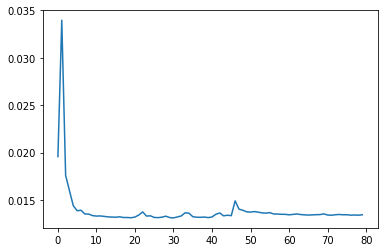

In [41]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

### model validation

In [42]:
first_eval_batch = train_scale[-7:]
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

In [43]:
print('the first forecase result is {}'.format(model.predict(first_eval_batch)[0][0:20]))
print('the first true validation is {}'.format(val_scale[0][0:20]))

the first forecase result is [0.17546566 0.06144617 0.07679077 0.16788273 0.13437288 0.07787349
 0.13110617 0.11573924 0.00633341 0.08831322 0.03465271 0.06945621
 0.11213595 0.12668921 0.0469057  0.06755537 0.07563223 0.02520021
 0.15896817 0.05902582]
the first true validation is [0.2        0.2        0.         0.         0.11111111 0.
 0.33333333 0.         0.         0.         0.         0.33333333
 0.         0.2        0.04819277 0.02222222 0.         0.
 0.078125   0.        ]


**prediction for 28 days**

In [44]:
test_predictions = []

first_eval_batch = train_scale[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

In [45]:
current_batch.shape

(1, 7, 30490)

### split sample submission

In [57]:
df_Sample_Submission_val = df_Sample_Submission.iloc[0:30490,:]
df_Sample_Submission_eval = df_Sample_Submission.iloc[30490:,:]

In [59]:
df_Sample_Submission_eval.shape
df_Sample_Submission_eval.head()

F1  F2  F3  F4  F5  F6  F7  F8  F9  F10  ...  \
id                                                                      ...   
HOBBIES_1_001_CA_1_evaluation   0   0   0   0   0   0   0   0   0    0  ...   
HOBBIES_1_002_CA_1_evaluation   0   0   0   0   0   0   0   0   0    0  ...   
HOBBIES_1_003_CA_1_evaluation   0   0   0   0   0   0   0   0   0    0  ...   
HOBBIES_1_004_CA_1_evaluation   0   0   0   0   0   0   0   0   0    0  ...   
HOBBIES_1_005_CA_1_evaluation   0   0   0   0   0   0   0   0   0    0  ...   

                               F19  F20  F21  F22  F23  F24  F25  F26  F27  \
id                                                                           
HOBBIES_1_001_CA_1_evaluation    0    0    0    0    0    0    0    0    0   
HOBBIES_1_002_CA_1_evaluation    0    0    0    0    0    0    0    0    0   
HOBBIES_1_003_CA_1_evaluation    0    0    0    0    0    0    0    0    0   
HOBBIES_1_004_CA_1_evaluation    0    0    0    0    0    0    0    0    0   
HOBBIES_1_005_CA_1_evaluation    0    0    0    0    0    0    0    0    0   

                               F28  
id                                  
HOBBIES_1_001_CA_1_evaluation    0  
HOBBIES_1_002_CA_1_evaluation    0  
HOBBIES_1_003_CA_1_evaluation    0  
HOBBIES_1_004_CA_1_evaluation    0  
HOBBIES_1_005_CA_1_evaluation    0  

[5 rows x 28 columns]

### Validation and evaluation results

In [66]:
test_predictions = []

first_eval_batch = train_scale[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(28*2):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [67]:
print(test_predictions[0].shape)
print(len(test_predictions))

(30490,)
56


In [169]:
test_predictions = scaler.inverse_transform(test_predictions)

In [64]:
#rms = sqrt(mean_squared_error(val_scale, test_predictions))

In [68]:
#rms

In [170]:
df_submission0 = pd.DataFrame(test_predictions)

In [171]:
df_submission_val = df_submission0.iloc[0:28,:]
df_submission_eval = df_submission0.iloc[28:,:]

In [172]:
df_submission_eval.index=range(0,28)

In [173]:
df_submission = pd.concat([df_submission_val, df_submission_eval],axis=1)
df_submission = df_submission.transpose()

In [174]:
#df_submission.shape
#df_submission.tail()
#df_submission.isnull().sum()
df_submission.head()

0         1         2         3         4         5         6   \
0  0.877328  0.902266  0.926794  0.950921  0.974653  0.997998  1.020961   
1  0.307231  0.313633  0.319930  0.326125  0.332218  0.338211  0.344107   
2  0.460745  0.474357  0.487747  0.500918  0.513873  0.526617  0.539152   
3  2.518241  2.586777  2.654188  2.720499  2.785722  2.849884  2.912994   
4  1.209356  1.237476  1.265134  1.292341  1.319102  1.345427  1.371320   

         7         8         9   ...        18        19        20        21  \
0  1.043550  1.065768  1.087626  ...  1.268982  1.287529  1.305807  1.323784   
1  0.349906  0.355611  0.361222  ...  0.407783  0.412534  0.417082  0.421552   
2  0.551483  0.563611  0.575543  ...  0.674543  0.684659  0.694524  0.704224   
3  2.975076  3.036140  3.096214  ...  3.594643  3.645598  3.695591  3.744754   
4  1.396792  1.421846  1.446494  ...  1.650996  1.671901  1.692398  1.712555   

         22        23        24        25        26        27  
0  1.341465  1.358854  1.375956  1.392876  1.409689  1.426345  
1  0.425944  0.430260  0.434503  0.438417  0.441826  0.444862  
2  0.713762  0.723140  0.732360  0.741264  0.749738  0.757868  
3  3.793101  3.840646  3.887401  3.933185  3.977878  4.021584  
4  1.732376  1.751868  1.771036  1.789777  1.808021  1.825826  

[5 rows x 28 columns]

In [175]:
df_submission.index = df_Sample_Submission.index

In [176]:
df_submission.columns = df_Sample_Submission.columns

In [177]:
df_submission[df_submission < 0] =0

In [178]:
df_submission.head()

F1        F2        F3        F4  \
id                                                                      
HOBBIES_1_001_CA_1_validation  0.877328  0.902266  0.926794  0.950921   
HOBBIES_1_002_CA_1_validation  0.307231  0.313633  0.319930  0.326125   
HOBBIES_1_003_CA_1_validation  0.460745  0.474357  0.487747  0.500918   
HOBBIES_1_004_CA_1_validation  2.518241  2.586777  2.654188  2.720499   
HOBBIES_1_005_CA_1_validation  1.209356  1.237476  1.265134  1.292341   

                                     F5        F6        F7        F8  \
id                                                                      
HOBBIES_1_001_CA_1_validation  0.974653  0.997998  1.020961  1.043550   
HOBBIES_1_002_CA_1_validation  0.332218  0.338211  0.344107  0.349906   
HOBBIES_1_003_CA_1_validation  0.513873  0.526617  0.539152  0.551483   
HOBBIES_1_004_CA_1_validation  2.785722  2.849884  2.912994  2.975076   
HOBBIES_1_005_CA_1_validation  1.319102  1.345427  1.371320  1.396792   

                                     F9       F10  ...       F19       F20  \
id                                                 ...                       
HOBBIES_1_001_CA_1_validation  1.065768  1.087626  ...  1.268982  1.287529   
HOBBIES_1_002_CA_1_validation  0.355611  0.361222  ...  0.407783  0.412534   
HOBBIES_1_003_CA_1_validation  0.563611  0.575543  ...  0.674543  0.684659   
HOBBIES_1_004_CA_1_validation  3.036140  3.096214  ...  3.594643  3.645598   
HOBBIES_1_005_CA_1_validation  1.421846  1.446494  ...  1.650996  1.671901   

                                    F21       F22       F23       F24  \
id                                                                      
HOBBIES_1_001_CA_1_validation  1.305807  1.323784  1.341465  1.358854   
HOBBIES_1_002_CA_1_validation  0.417082  0.421552  0.425944  0.430260   
HOBBIES_1_003_CA_1_validation  0.694524  0.704224  0.713762  0.723140   
HOBBIES_1_004_CA_1_validation  3.695591  3.744754  3.793101  3.840646   
HOBBIES_1_005_CA_1_validation  1.692398  1.712555  1.732376  1.751868   

                                    F25       F26       F27       F28  
id                                                                     
HOBBIES_1_001_CA_1_validation  1.375956  1.392876  1.409689  1.426345  
HOBBIES_1_002_CA_1_validation  0.434503  0.438417  0.441826  0.444862  
HOBBIES_1_003_CA_1_validation  0.732360  0.741264  0.749738  0.757868  
HOBBIES_1_004_CA_1_validation  3.887401  3.933185  3.977878  4.021584  
HOBBIES_1_005_CA_1_validation  1.771036  1.789777  1.808021  1.825826  

[5 rows x 28 columns]

In [179]:
#df_submission.to_csv(r'C:\\Users\\dyabin\\Documents\\Github_data\\m5-forecasting-accuracy-submission\\FirstSubmission.csv')

先去除每一行的0值，再进行预测

In [24]:
df_train1.head()

0      1      2      3      4      5      6      7      8      \
2011-01-29      0      0      0      0      0      0      0     12      2   
2011-01-30      0      0      0      0      0      0      0     15      0   
2011-01-31      0      0      0      0      0      0      0      0      7   
2011-02-01      0      0      0      0      0      0      0      0      3   
2011-02-02      0      0      0      0      0      0      0      0      0   

            9      ...  30480  30481  30482  30483  30484  30485  30486  \
2011-01-29      0  ...      0     14      1      0      4      0      0   
2011-01-30      0  ...      0     11      1      0      4      0      0   
2011-01-31      1  ...      0      5      1      0      2      2      0   
2011-02-01      0  ...      0      6      1      0      5      2      0   
2011-02-02      0  ...      0      5      1      0      2      0      0   

            30487  30488  30489  
2011-01-29      0      0      0  
2011-01-30      6      0      0  
2011-01-31      0      0      0  
2011-02-01      2      0      0  
2011-02-02      2      0      0  

[5 rows x 30490 columns]

In [26]:
df_train1.shape

(1913, 30490)

In [83]:
np.nonzero(df_train1.iloc[:,3])[0][0]

36

In [62]:
df_train1.iloc[:,0]

2011-01-29    0
2011-01-30    0
2011-01-31    0
2011-02-01    0
2011-02-02    0
             ..
2016-04-20    1
2016-04-21    3
2016-04-22    0
2016-04-23    1
2016-04-24    1
Freq: D, Name: 0, Length: 1913, dtype: int64

In [84]:
l = list()

In [85]:
for row in range(df_train1.shape[1]):
    df_new = df_train1.iloc[:,row]
    f_idex = np.nonzero(df_new)[0][0]
    l.append(f_idex)

In [86]:
len(l)

30490

In [91]:
def averagenum(num):
    nsum = 0
    for i in range(len(num)):
        nsum += num[i]
    return nsum / len(num)

In [142]:
final_output = list()

In [143]:
for row in range(df_train1.shape[1]):
    df_new = df_train1.iloc[:,row]
    f_idex = np.nonzero(df_new)[0][0]
    if f_idex >= 400:
        df_fnal = df_train1[[row]][f_idex:]
    else:
        df_fnal = df_train1[[row]]
    scaler = MinMaxScaler().fit(df_fnal)
    train_scale = scaler.transform(df_fnal)
    ts_generator = TimeseriesGenerator(train_scale, train_scale, length=7, batch_size=128)
    model = Sequential()
    model.add(LSTM(100, activation='relu', input_shape=(7, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit_generator(ts_generator,epochs=80)
    test_predictions = []
    first_eval_batch = train_scale[-7:]
    current_batch = first_eval_batch.reshape((1, 7, 1))
    for i in range(56):
        # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
        current_pred = model.predict(current_batch)[0]
        # store prediction
        test_predictions.append(current_pred) 
        # update batch to now include prediction and drop first value
        current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    test_predictions = scaler.inverse_transform(test_predictions)
    final_output.append(test_predictions)

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
8/8 [==============================] - 0s 48ms/step - loss: 0.0375
Epoch 2/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0302
Epoch 3/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0302
Epoch 4/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0295
Epoch 5/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0296
Epoch 6/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0295
Epoch 7/80
8/8 [==============================] - 0s 9ms/step - loss: 0.0295
Epoch 8/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0295
Epoch 9/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0295
Epoch 10/80
8/8 [==============================] - 0s 9ms/step - loss: 0.0295
Epoch 11/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0296
Epoch 12/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0297
Epoch 13/80
8/8 [==============================] - 0s 11ms/step

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0139
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0126
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0125
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0125
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0125
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0124
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0124
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0124
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0124
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0124
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0124
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0124
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
7/7 [==============================] - 0s 54ms/step - loss: 0.0140
Epoch 2/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0125
Epoch 3/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0123
Epoch 4/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0122
Epoch 5/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0119
Epoch 6/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0119
Epoch 7/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0118
Epoch 8/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0118
Epoch 9/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0117
Epoch 10/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0117
Epoch 11/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0117
Epoch 12/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0117
Epoch 13/80
7/7 [==============================] - 0s 10ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0204
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0177
Epoch 3/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0173
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0172
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0171
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0171
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0171
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0170
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0171
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0171
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0172
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0171
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0257
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0200
Epoch 3/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0197
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0197
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0195
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0195
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0195
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0194
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0194
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0194
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0194
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0193
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 0s 34ms/step - loss: 0.0336
Epoch 2/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0294
Epoch 3/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0284
Epoch 4/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0290
Epoch 5/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0287
Epoch 6/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0286
Epoch 7/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0286
Epoch 8/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0285
Epoch 9/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0286
Epoch 10/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0286
Epoch 11/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0286
Epoch 12/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0285
Epoch 13/80
12/12 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
11/11 [==============================] - 0s 37ms/step - loss: 0.0401
Epoch 2/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0365
Epoch 3/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0364
Epoch 4/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0364
Epoch 5/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0363
Epoch 6/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0364
Epoch 7/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0362
Epoch 8/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0363
Epoch 9/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0363
Epoch 10/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0363
Epoch 11/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0364
Epoch 12/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0363
Epoch 13/80
11/11 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0115
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0098
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0098
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0096
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0097
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0097
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0096
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0096
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0096
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0096
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0095
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0096
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0109
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0102
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0101
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0100
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0100
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0100
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0099
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0099
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0099
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0099
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0099
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0099
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0296
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0241
Epoch 3/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0234
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0234
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0234
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0233
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0234
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0234
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0233
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0233
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0233
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0233
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 0s 35ms/step - loss: 0.0119
Epoch 2/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0119
Epoch 3/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0117
Epoch 4/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0117
Epoch 5/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0117
Epoch 6/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0117
Epoch 7/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0117
Epoch 8/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0117
Epoch 9/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0117
Epoch 10/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0117
Epoch 11/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0117
Epoch 12/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0117
Epoch 13/80
12/12 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0528
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0474
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0467
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0465
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0465
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0465
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0464
Epoch 8/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0465
Epoch 9/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0466
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0469
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0464
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0465
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 0s 39ms/step - loss: 0.0283
Epoch 2/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0256
Epoch 3/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0252
Epoch 4/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0252
Epoch 5/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0252
Epoch 6/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0252
Epoch 7/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0252
Epoch 8/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0252
Epoch 9/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0252
Epoch 10/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0252
Epoch 11/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0252
Epoch 12/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0252
Epoch 13/80
12/12 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 33ms/step - loss: 0.0115
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0109
Epoch 3/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0107
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0106
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0106
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0105
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0106
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0105
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0105
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0104
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0105
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0104
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0093
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0077
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0078
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0077
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0077
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0077
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0077
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0077
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0077
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0077
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0076
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0085
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0075
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0074
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0074
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0074
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0074
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0074
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0074
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0074
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0074
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0074
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0074
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0122
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0111
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0108
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0107
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0107
Epoch 6/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0107
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0107
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0107
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0107
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0107
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0107
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0107
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 0s 34ms/step - loss: 0.0075
Epoch 2/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0074
Epoch 3/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0074
Epoch 4/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0074
Epoch 5/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0074
Epoch 6/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0074
Epoch 7/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0074
Epoch 8/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0074
Epoch 9/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0074
Epoch 10/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0074
Epoch 11/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0074
Epoch 12/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0074
Epoch 13/80
12/12 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
11/11 [==============================] - 0s 38ms/step - loss: 0.0200
Epoch 2/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0171
Epoch 3/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0169
Epoch 4/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0161
Epoch 5/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0160
Epoch 6/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0159
Epoch 7/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0158
Epoch 8/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0157
Epoch 9/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0158
Epoch 10/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0157
Epoch 11/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0157
Epoch 12/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0156
Epoch 13/80
11/11 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0252
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0238
Epoch 3/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0235
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0235
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0235
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0235
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0235
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0235
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0235
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0234
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0235
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0234
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0096
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0083
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0081
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0078
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0078
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0077
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0077
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0077
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0077
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0077
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0077
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0167
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0158
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0155
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0156
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0155
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0155
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0155
Epoch 8/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0155
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0156
Epoch 10/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0155
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0155
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0155
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0378
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0290
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0266
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0261
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0252
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0249
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0245
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0245
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0243
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0244
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0243
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0243
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
11/11 [==============================] - 0s 36ms/step - loss: 0.0201
Epoch 2/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0188
Epoch 3/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0184
Epoch 4/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0185
Epoch 5/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0185
Epoch 6/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0185
Epoch 7/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0184
Epoch 8/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0184
Epoch 9/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0184
Epoch 10/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0184
Epoch 11/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0185
Epoch 12/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0185
Epoch 13/80
11/11 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0263
Epoch 2/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0235
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0233
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0233
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0235
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0234
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0233
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0233
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0233
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0233
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0233
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0233
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
7/7 [==============================] - 0s 53ms/step - loss: 0.0042
Epoch 2/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0040
Epoch 3/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0039
Epoch 4/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0039
Epoch 5/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0039
Epoch 6/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0038
Epoch 7/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0038
Epoch 8/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0038
Epoch 9/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0037
Epoch 10/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0037
Epoch 11/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0037
Epoch 12/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0037
Epoch 13/80
7/7 [==============================] - 0s 10ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
7/7 [==============================] - 0s 52ms/step - loss: 0.0198
Epoch 2/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0164
Epoch 3/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0167
Epoch 4/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0165
Epoch 5/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0166
Epoch 6/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0165
Epoch 7/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0164
Epoch 8/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0164
Epoch 9/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0164
Epoch 10/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0164
Epoch 11/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0164
Epoch 12/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0165
Epoch 13/80
7/7 [==============================] - 0s 10ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0494
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0368
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0354
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0353
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0345
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0342
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0341
Epoch 8/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0341
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0341
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0338
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0338
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0339
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0283
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0192
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0185
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0185
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0184
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0182
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0183
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0181
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0181
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0181
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0180
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0181
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
11/11 [==============================] - 0s 37ms/step - loss: 0.0129
Epoch 2/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0104
Epoch 3/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0101
Epoch 4/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0101
Epoch 5/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0100
Epoch 6/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0099
Epoch 7/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0100
Epoch 8/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0099
Epoch 9/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0099
Epoch 10/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0099
Epoch 11/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0099
Epoch 12/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0099
Epoch 13/80
11/11 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0255
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0238
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0234
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0234
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0234
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0234
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0234
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0234
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0235
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0235
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0233
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0233
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0158
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0138
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0137
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0136
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0136
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0136
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0135
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0135
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0135
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0135
Epoch 11/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0135
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0135
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
8/8 [==============================] - 0s 48ms/step - loss: 0.0277
Epoch 2/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0241
Epoch 3/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0243
Epoch 4/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0240
Epoch 5/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0239
Epoch 6/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0238
Epoch 7/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0239
Epoch 8/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0239
Epoch 9/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0238
Epoch 10/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0239
Epoch 11/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0238
Epoch 12/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0239
Epoch 13/80
8/8 [==============================] - 0s 10ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0094
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0089
Epoch 3/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0089
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0089
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0089
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0089
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0089
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0089
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0089
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0088
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0088
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0088
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0109
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0105
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0107
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0106
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0106
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0106
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0106
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0106
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0106
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0106
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0106
Epoch 12/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0105
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0102
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0094
Epoch 3/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0094
Epoch 4/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0094
Epoch 5/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0094
Epoch 6/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0094
Epoch 7/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0094
Epoch 8/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0094
Epoch 9/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0094
Epoch 10/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0093
Epoch 11/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0094
Epoch 12/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0093
Epoch 13/80
15/15 [====================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 0s 37ms/step - loss: 0.0424
Epoch 2/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0297
Epoch 3/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0299
Epoch 4/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0297
Epoch 5/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0295
Epoch 6/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0295
Epoch 7/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0294
Epoch 8/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0295
Epoch 9/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0294
Epoch 10/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0294
Epoch 11/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0294
Epoch 12/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0295
Epoch 13/80
12/12 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0316
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0280
Epoch 3/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0279
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0279
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0279
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0279
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0277
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0277
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0278
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0277
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0277
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0277
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 0s 34ms/step - loss: 0.0187
Epoch 2/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0178
Epoch 3/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0177
Epoch 4/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0177
Epoch 5/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0177
Epoch 6/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0177
Epoch 7/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0177
Epoch 8/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0177
Epoch 9/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0177
Epoch 10/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0177
Epoch 11/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0177
Epoch 12/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0177
Epoch 13/80
12/12 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 0s 34ms/step - loss: 0.0432
Epoch 2/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0338
Epoch 3/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0303
Epoch 4/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0291
Epoch 5/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0286
Epoch 6/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0282
Epoch 7/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0279
Epoch 8/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0276
Epoch 9/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0272
Epoch 10/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0270
Epoch 11/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0267
Epoch 12/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0266
Epoch 13/80
12/12 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0435
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0399
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0393
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0393
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0393
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0393
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0393
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0395
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0395
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0391
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0392
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0392
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0173
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0159
Epoch 3/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0158
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0158
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0156
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0156
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0156
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0155
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0158
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0157
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0155
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0155
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0086
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0080
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0078
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0078
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0078
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0078
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0078
Epoch 9/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0078
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0078
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0078
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0206
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0170
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0167
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0166
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0165
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0163
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0165
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0163
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0163
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0165
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0163
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0161
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
5/5 [==============================] - 0s 72ms/step - loss: 0.0291
Epoch 2/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0250
Epoch 3/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0228
Epoch 4/80
5/5 [==============================] - 0s 12ms/step - loss: 0.0228
Epoch 5/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0230
Epoch 6/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0227
Epoch 7/80
5/5 [==============================] - 0s 12ms/step - loss: 0.0226
Epoch 8/80
5/5 [==============================] - 0s 12ms/step - loss: 0.0226
Epoch 9/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0226
Epoch 10/80
5/5 [==============================] - 0s 12ms/step - loss: 0.0226
Epoch 11/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0226
Epoch 12/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0226
Epoch 13/80
5/5 [==============================] - 0s 11ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
4/4 [==============================] - 0s 89ms/step - loss: 0.0318
Epoch 2/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0265
Epoch 3/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0209
Epoch 4/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0193
Epoch 5/80
4/4 [==============================] - 0s 13ms/step - loss: 0.0205
Epoch 6/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0205
Epoch 7/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0196
Epoch 8/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0196
Epoch 9/80
4/4 [==============================] - 0s 13ms/step - loss: 0.0196
Epoch 10/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0196
Epoch 11/80
4/4 [==============================] - 0s 13ms/step - loss: 0.0195
Epoch 12/80
4/4 [==============================] - 0s 13ms/step - loss: 0.0194
Epoch 13/80
4/4 [==============================] - 0s 12ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0083
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0080
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0078
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0078
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0078
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0266
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0192
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0186
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0184
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0178
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0172
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0168
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0167
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0166
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0165
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0165
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0163
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0249
Epoch 2/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0230
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0225
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0224
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0224
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0222
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0222
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0222
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0222
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0222
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0221
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0221
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0301
Epoch 2/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0221
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0220
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0219
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0218
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0217
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0216
Epoch 8/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0216
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0216
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0215
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0216
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0216
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 43ms/step - loss: 0.0170
Epoch 2/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0159
Epoch 3/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0157
Epoch 4/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0156
Epoch 5/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0156
Epoch 6/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0156
Epoch 7/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0156
Epoch 8/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0157
Epoch 9/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0155
Epoch 10/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0156
Epoch 11/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0156
Epoch 12/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0156
Epoch 13/80
9/9 [==============================] - 0s 10ms/step - l

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0033
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0033
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0032
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0032
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0033
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0032
Epoch 7/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0032
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0032
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0032
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0032
Epoch 11/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0032
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0032
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 45ms/step - loss: 0.0087
Epoch 2/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0085
Epoch 3/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0085
Epoch 4/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0085
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0085
Epoch 6/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0085
Epoch 7/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0085
Epoch 8/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0085
Epoch 9/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0085
Epoch 10/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0085
Epoch 11/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0085
Epoch 12/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0085
Epoch 13/80
9/9 [==============================] - 0s 10ms/step

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
8/8 [==============================] - 0s 50ms/step - loss: 0.0165
Epoch 2/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0146
Epoch 3/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0147
Epoch 4/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0144
Epoch 5/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0144
Epoch 6/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0144
Epoch 7/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0143
Epoch 8/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0143
Epoch 9/80
8/8 [==============================] - 0s 9ms/step - loss: 0.0143
Epoch 10/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0143
Epoch 11/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0143
Epoch 12/80
8/8 [==============================] - 0s 16ms/step - loss: 0.0143
Epoch 13/80
8/8 [==============================] - 0s 10ms/ste

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0340
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0249
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0250
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0243
Epoch 5/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0245
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0245
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0244
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0244
Epoch 9/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0245
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0245
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0244
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0244
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 43ms/step - loss: 0.0244
Epoch 2/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0183
Epoch 3/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0182
Epoch 4/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0180
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0178
Epoch 6/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0178
Epoch 7/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0176
Epoch 8/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0176
Epoch 9/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0175
Epoch 10/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0175
Epoch 11/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0175
Epoch 12/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0175
Epoch 13/80
9/9 [==============================] - 0s 9ms/step - l

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
11/11 [==============================] - 0s 37ms/step - loss: 0.0344
Epoch 2/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0253
Epoch 3/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0229
Epoch 4/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0224
Epoch 5/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0222
Epoch 6/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0221
Epoch 7/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0220
Epoch 8/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0219
Epoch 9/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0219
Epoch 10/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0218
Epoch 11/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0218
Epoch 12/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0218
Epoch 13/80
11/11 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0189
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0165
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0163
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0164
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0163
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0163
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0163
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0163
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0163
Epoch 10/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0163
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0163
Epoch 12/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0163
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
11/11 [==============================] - 0s 37ms/step - loss: 0.0353
Epoch 2/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0331
Epoch 3/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0331
Epoch 4/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0330
Epoch 5/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0330
Epoch 6/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0331
Epoch 7/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0328
Epoch 8/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0329
Epoch 9/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0328
Epoch 10/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0329
Epoch 11/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0328
Epoch 12/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0328
Epoch 13/80
11/11 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0118
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0114
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0114
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0114
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0114
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0114
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0114
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0114
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0114
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0114
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0114
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0113
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 43ms/step - loss: 0.0192
Epoch 2/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0188
Epoch 3/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0185
Epoch 4/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0186
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0185
Epoch 6/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0185
Epoch 7/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0185
Epoch 8/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0185
Epoch 9/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0185
Epoch 10/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0185
Epoch 11/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0185
Epoch 12/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0185
Epoch 13/80
9/9 [==============================] - 0s 10ms/step - l

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0132
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0125
Epoch 3/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0124
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0124
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0124
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0124
Epoch 7/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0123
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0123
Epoch 9/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0123
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0124
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0125
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0124
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0510
Epoch 2/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0340
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0317
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0308
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0306
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0304
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0302
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0302
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0303
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0303
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0303
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0301
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 0s 34ms/step - loss: 0.0138
Epoch 2/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0135
Epoch 3/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0133
Epoch 4/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0133
Epoch 5/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0133
Epoch 6/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0133
Epoch 7/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0133
Epoch 8/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0133
Epoch 9/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0133
Epoch 10/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0133
Epoch 11/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0134
Epoch 12/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0133
Epoch 13/80
12/12 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
8/8 [==============================] - 0s 49ms/step - loss: 0.0036
Epoch 2/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0034
Epoch 3/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0034
Epoch 4/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0034
Epoch 5/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0034
Epoch 6/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0033
Epoch 7/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0033
Epoch 8/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0033
Epoch 9/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0033
Epoch 10/80
8/8 [==============================] - 0s 9ms/step - loss: 0.0033
Epoch 11/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0034
Epoch 12/80
8/8 [==============================] - 0s 9ms/step - loss: 0.0033
Epoch 13/80
8/8 [==============================] - 0s 10ms/step

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0114
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0102
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0102
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0101
Epoch 5/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0100
Epoch 6/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0100
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0100
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0100
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0100
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0101
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0099
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0099
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0353
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0291
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0287
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0287
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0287
Epoch 6/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0286
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0286
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0284
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0285
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0286
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0284
Epoch 12/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0284
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 35ms/step - loss: 0.0340
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0293
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0290
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0289
Epoch 5/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0289
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0288
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0287
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0288
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0286
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0287
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0286
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0287
Epoch 13/80
15/15 [=====================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 0s 39ms/step - loss: 0.0147
Epoch 2/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0143
Epoch 3/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0143
Epoch 4/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0143
Epoch 5/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0143
Epoch 6/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0143
Epoch 7/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0143
Epoch 8/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0143
Epoch 9/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0143
Epoch 10/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0143
Epoch 11/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0143
Epoch 12/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0143
Epoch 13/80
12/12 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0181
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0172
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0169
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0168
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0168
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0168
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0168
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0167
Epoch 9/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0167
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0168
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0167
Epoch 12/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0167
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0515
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0464
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0462
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0459
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0457
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0457
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0458
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0456
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0457
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0457
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0458
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0458
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0268
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0183
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0172
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0167
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0163
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0159
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0158
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0157
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0156
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0155
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0155
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0155
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0148
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0136
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0130
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0130
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0131
Epoch 6/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0129
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0129
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0129
Epoch 9/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0129
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0129
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0129
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0129
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0103
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0095
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0095
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0095
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0095
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0095
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0095
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0095
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0095
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0095
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0095
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0095
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 0s 38ms/step - loss: 0.0179
Epoch 2/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0158
Epoch 3/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0155
Epoch 4/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0151
Epoch 5/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0149
Epoch 6/80
12/12 [==============================] - 0s 11ms/step - loss: 0.0147
Epoch 7/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0146
Epoch 8/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0145
Epoch 9/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0144
Epoch 10/80
12/12 [==============================] - 0s 11ms/step - loss: 0.0143
Epoch 11/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0143
Epoch 12/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0143
Epoch 13/80
12/12 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0469
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0322
Epoch 3/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0320
Epoch 4/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0314
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0310
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0310
Epoch 7/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0309
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0311
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0306
Epoch 10/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0309
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0310
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0314
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0217
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0182
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0179
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0180
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0178
Epoch 6/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0179
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0179
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0179
Epoch 9/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0179
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0180
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0179
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0178
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0110
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0102
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0102
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0100
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0099
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0099
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0099
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0098
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0098
Epoch 10/80
15/15 [==============================] - 0s 13ms/step - loss: 0.0097
Epoch 11/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0097
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0097
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
8/8 [==============================] - 0s 49ms/step - loss: 0.0403
Epoch 2/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0294
Epoch 3/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0274
Epoch 4/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0265
Epoch 5/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0262
Epoch 6/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0263
Epoch 7/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0261
Epoch 8/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0261
Epoch 9/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0261
Epoch 10/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0261
Epoch 11/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0261
Epoch 12/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0261
Epoch 13/80
8/8 [==============================] - 0s 10ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0113
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0110
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0109
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0108
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0109
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0109
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0109
Epoch 8/80
15/15 [==============================] - 0s 13ms/step - loss: 0.0109
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0109
Epoch 10/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0109
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0109
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0109
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
11/11 [==============================] - 0s 41ms/step - loss: 0.0233
Epoch 2/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0210
Epoch 3/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0200
Epoch 4/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0198
Epoch 5/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0196
Epoch 6/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0196
Epoch 7/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0195
Epoch 8/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0193
Epoch 9/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0193
Epoch 10/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0192
Epoch 11/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0192
Epoch 12/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0193
Epoch 13/80
11/11 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0415
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0304
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0294
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0293
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0292
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0291
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0291
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0292
Epoch 9/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0289
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0290
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0290
Epoch 12/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0289
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
11/11 [==============================] - 0s 39ms/step - loss: 0.0444
Epoch 2/80
11/11 [==============================] - 0s 12ms/step - loss: 0.0307
Epoch 3/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0300
Epoch 4/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0299
Epoch 5/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0298
Epoch 6/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0296
Epoch 7/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0296
Epoch 8/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0297
Epoch 9/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0299
Epoch 10/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0298
Epoch 11/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0295
Epoch 12/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0296
Epoch 13/80
11/11 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0328
Epoch 2/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0223
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0222
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0223
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0223
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0221
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0220
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0220
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0220
Epoch 10/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0219
Epoch 11/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0220
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0220
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
11/11 [==============================] - 0s 36ms/step - loss: 0.0465
Epoch 2/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0361
Epoch 3/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0349
Epoch 4/80
11/11 [==============================] - ETA: 0s - loss: 0.032 - 0s 10ms/step - loss: 0.0349
Epoch 5/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0348
Epoch 6/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0348
Epoch 7/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0347
Epoch 8/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0348
Epoch 9/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0349
Epoch 10/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0347
Epoch 11/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0346
Epoch 12/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0344
Epoch 13/80
11/11 [==

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0156
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0148
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0147
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0147
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0147
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0147
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0147
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0148
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0148
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0146
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0147
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0147
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 28ms/step - loss: 0.0302
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0207
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0206
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0197
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0198
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0196
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0194
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0190
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0189
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0189
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0187
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0188
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 44ms/step - loss: 0.0232
Epoch 2/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0211
Epoch 3/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0208
Epoch 4/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0210
Epoch 5/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0208
Epoch 6/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0206
Epoch 7/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0205
Epoch 8/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0205
Epoch 9/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0204
Epoch 10/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0205
Epoch 11/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0205
Epoch 12/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0204
Epoch 13/80
9/9 [==============================] - 0s 9ms/step - los

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
6/6 [==============================] - 0s 61ms/step - loss: 0.0093
Epoch 2/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0085
Epoch 3/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0085
Epoch 4/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0084
Epoch 5/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0084
Epoch 6/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0084
Epoch 7/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0084
Epoch 8/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0084
Epoch 9/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0084
Epoch 10/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0084
Epoch 11/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0084
Epoch 12/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0084
Epoch 13/80
6/6 [==============================] - 0s 10ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 28ms/step - loss: 0.0165
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0157
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0155
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0155
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0155
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0155
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0155
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0155
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0155
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0155
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0155
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0155
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
11/11 [==============================] - 0s 36ms/step - loss: 0.0310
Epoch 2/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0287
Epoch 3/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0283
Epoch 4/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0282
Epoch 5/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0281
Epoch 6/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0281
Epoch 7/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0281
Epoch 8/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0281
Epoch 9/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0281
Epoch 10/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0281
Epoch 11/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0281
Epoch 12/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0281
Epoch 13/80
11/11 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0202
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0189
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0189
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0189
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0188
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0189
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0188
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0188
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0188
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0187
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0188
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0187
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0190
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0185
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0184
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0184
Epoch 5/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0183
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0184
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0183
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0185
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0183
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0184
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0183
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0183
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0418
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0362
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0361
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0360
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0360
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0359
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0360
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0360
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0360
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0360
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0360
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0359
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0401
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0342
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0324
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0319
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0316
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0314
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0311
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0309
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0308
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0308
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0305
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0303
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0355
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0239
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0238
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0214
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0203
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0198
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0196
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0196
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0195
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0195
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0195
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0195
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0444
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0331
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0333
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0329
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0327
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0328
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0326
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0325
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0327
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0326
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0326
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0326
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
11/11 [==============================] - 0s 38ms/step - loss: 0.0437
Epoch 2/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0418
Epoch 3/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0415
Epoch 4/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0413
Epoch 5/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0413
Epoch 6/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0412
Epoch 7/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0412
Epoch 8/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0412
Epoch 9/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0412
Epoch 10/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0413
Epoch 11/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0412
Epoch 12/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0413
Epoch 13/80
11/11 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0187
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0147
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0146
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0144
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0144
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0144
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0144
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0143
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0143
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0143
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0143
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0143
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
6/6 [==============================] - 0s 60ms/step - loss: 0.0747
Epoch 2/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0654
Epoch 3/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0617
Epoch 4/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0627
Epoch 5/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0622
Epoch 6/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0618
Epoch 7/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0622
Epoch 8/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0620
Epoch 9/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0619
Epoch 10/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0618
Epoch 11/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0617
Epoch 12/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0617
Epoch 13/80
6/6 [==============================] - 0s 11ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0287
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0236
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0236
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0237
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0236
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0235
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0235
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0238
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0236
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0234
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0234
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0234
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0100
Epoch 2/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0095
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0094
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0091
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0092
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0092
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0090
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0090
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0090
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0090
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0090
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0090
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
10/10 [==============================] - 0s 39ms/step - loss: 0.0144
Epoch 2/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0142
Epoch 3/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0141
Epoch 4/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0141
Epoch 5/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0141
Epoch 6/80
10/10 [==============================] - 0s 8ms/step - loss: 0.0141
Epoch 7/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0141
Epoch 8/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0141
Epoch 9/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0140
Epoch 10/80
10/10 [==============================] - 0s 8ms/step - loss: 0.0140
Epoch 11/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0141
Epoch 12/80
10/10 [==============================] - 0s 8ms/step - loss: 0.0140
Epoch 13/80
10/10 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 28ms/step - loss: 0.0228
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0165
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0159
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0157
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0156
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0156
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0155
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0154
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0153
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0153
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0153
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0153
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0336
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0297
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0294
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0295
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0294
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0296
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0294
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0295
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0293
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0293
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0294
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0293
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0098
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0095
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0095
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0095
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0094
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0095
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0095
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0094
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0094
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0094
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0095
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0094
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0089
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0085
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0083
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0082
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0082
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0082
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0082
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0082
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0082
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0082
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0082
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0082
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0085
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0085
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0083
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0083
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0083
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0083
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0083
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0083
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0083
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0083
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0083
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0083
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 43ms/step - loss: 0.0044
Epoch 2/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0043
Epoch 3/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0042
Epoch 4/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0042
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0042
Epoch 6/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0042
Epoch 7/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0042
Epoch 8/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0043
Epoch 9/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0042
Epoch 10/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0042
Epoch 11/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0042
Epoch 12/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0042
Epoch 13/80
9/9 [==============================] - 0s 10ms/step

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 0s 34ms/step - loss: 0.0100
Epoch 2/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0094
Epoch 3/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0094
Epoch 4/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0094
Epoch 5/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0094
Epoch 6/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0094
Epoch 7/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0093
Epoch 8/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0094
Epoch 9/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0094
Epoch 10/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0094
Epoch 11/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0094
Epoch 12/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0094
Epoch 13/80
12/12 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
10/10 [==============================] - 0s 39ms/step - loss: 0.0048
Epoch 2/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0046
Epoch 3/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0047
Epoch 4/80
10/10 [==============================] - 0s 8ms/step - loss: 0.0046
Epoch 5/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0046
Epoch 6/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0046
Epoch 7/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0046
Epoch 8/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0046
Epoch 9/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0046
Epoch 10/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0046
Epoch 11/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0046
Epoch 12/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0046
Epoch 13/80
10/10 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
11/11 [==============================] - 0s 37ms/step - loss: 0.0172
Epoch 2/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0154
Epoch 3/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0155
Epoch 4/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0151
Epoch 5/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0150
Epoch 6/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0149
Epoch 7/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0148
Epoch 8/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0148
Epoch 9/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0148
Epoch 10/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0147
Epoch 11/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0147
Epoch 12/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0147
Epoch 13/80
11/11 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0247
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0236
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0235
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0235
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0235
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0235
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0235
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0235
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0235
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0235
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0235
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0235
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0188
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0186
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0184
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0184
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0184
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0185
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0185
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0184
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0184
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0184
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0184
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0184
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
8/8 [==============================] - 0s 48ms/step - loss: 0.0123
Epoch 2/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0107
Epoch 3/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0107
Epoch 4/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0106
Epoch 5/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0106
Epoch 6/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0105
Epoch 7/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0106
Epoch 8/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0105
Epoch 9/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0106
Epoch 10/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0106
Epoch 11/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0106
Epoch 12/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0106
Epoch 13/80
8/8 [==============================] - 0s 10ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 43ms/step - loss: 0.0290
Epoch 2/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0220
Epoch 3/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0228
Epoch 4/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0224
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0222
Epoch 6/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0222
Epoch 7/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0222
Epoch 8/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0221
Epoch 9/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0221
Epoch 10/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0221
Epoch 11/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0222
Epoch 12/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0220
Epoch 13/80
9/9 [==============================] - 0s 10ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 44ms/step - loss: 0.0054
Epoch 2/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0054
Epoch 3/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0053
Epoch 4/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0053
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0053
Epoch 6/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0052
Epoch 7/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0052
Epoch 8/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0052
Epoch 9/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0052
Epoch 10/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0053
Epoch 11/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0052
Epoch 12/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0053
Epoch 13/80
9/9 [==============================] - 0s 10ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
8/8 [==============================] - 0s 47ms/step - loss: 0.0081
Epoch 2/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0068
Epoch 3/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0067
Epoch 4/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0066
Epoch 5/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0066
Epoch 6/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0066
Epoch 7/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0066
Epoch 8/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0066
Epoch 9/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0066
Epoch 10/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0066
Epoch 11/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0066
Epoch 12/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0066
Epoch 13/80
8/8 [==============================] - 0s 10ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 43ms/step - loss: 0.0339
Epoch 2/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0251
Epoch 3/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0245
Epoch 4/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0239
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0238
Epoch 6/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0236
Epoch 7/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0236
Epoch 8/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0235
Epoch 9/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0235
Epoch 10/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0234
Epoch 11/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0234
Epoch 12/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0234
Epoch 13/80
9/9 [==============================] - 0s 10ms/step - 

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
10/10 [==============================] - 0s 40ms/step - loss: 0.0433
Epoch 2/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0320
Epoch 3/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0298
Epoch 4/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0294
Epoch 5/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0294
Epoch 6/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0293
Epoch 7/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0293
Epoch 8/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0292
Epoch 9/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0292
Epoch 10/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0290
Epoch 11/80
10/10 [==============================] - 0s 8ms/step - loss: 0.0291
Epoch 12/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0290
Epoch 13/80
10/10 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
4/4 [==============================] - 0s 92ms/step - loss: 0.0266
Epoch 2/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0225
Epoch 3/80
4/4 [==============================] - 0s 13ms/step - loss: 0.0218
Epoch 4/80
4/4 [==============================] - 0s 11ms/step - loss: 0.0220
Epoch 5/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0218
Epoch 6/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0214
Epoch 7/80
4/4 [==============================] - 0s 11ms/step - loss: 0.0214
Epoch 8/80
4/4 [==============================] - 0s 13ms/step - loss: 0.0214
Epoch 9/80
4/4 [==============================] - 0s 14ms/step - loss: 0.0213
Epoch 10/80
4/4 [==============================] - 0s 13ms/step - loss: 0.0213
Epoch 11/80
4/4 [==============================] - 0s 11ms/step - loss: 0.0213
Epoch 12/80
4/4 [==============================] - 0s 11ms/step - loss: 0.0212
Epoch 13/80
4/4 [==============================] - 0s 12ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
6/6 [==============================] - 0s 59ms/step - loss: 0.0470
Epoch 2/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0352
Epoch 3/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0290
Epoch 4/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0295
Epoch 5/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0289
Epoch 6/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0282
Epoch 7/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0283
Epoch 8/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0282
Epoch 9/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0282
Epoch 10/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0281
Epoch 11/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0281
Epoch 12/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0281
Epoch 13/80
6/6 [==============================] - 0s 11ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0108
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0105
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0106
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0105
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0105
Epoch 6/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0105
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0105
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0105
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0105
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0105
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0105
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0105
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 28ms/step - loss: 0.0179
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0174
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0175
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0173
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0173
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0173
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0173
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0172
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0175
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0176
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0173
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0173
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
11/11 [==============================] - 0s 36ms/step - loss: 0.0350
Epoch 2/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0270
Epoch 3/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0264
Epoch 4/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0261
Epoch 5/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0260
Epoch 6/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0259
Epoch 7/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0258
Epoch 8/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0258
Epoch 9/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0257
Epoch 10/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0257
Epoch 11/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0256
Epoch 12/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0256
Epoch 13/80
11/11 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 28ms/step - loss: 0.0148
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0124
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0124
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0126
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0123
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0123
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0124
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0123
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0123
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0123
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0123
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0124
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
10/10 [==============================] - 0s 40ms/step - loss: 0.0109
Epoch 2/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0104
Epoch 3/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0103
Epoch 4/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0103
Epoch 5/80
10/10 [==============================] - 0s 8ms/step - loss: 0.0102
Epoch 6/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0102
Epoch 7/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0102
Epoch 8/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0102
Epoch 9/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0103
Epoch 10/80
10/10 [==============================] - 0s 8ms/step - loss: 0.0103
Epoch 11/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0102
Epoch 12/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0102
Epoch 13/80
10/10 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0402
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0314
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0300
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0299
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0294
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0294
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0293
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0292
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0291
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0292
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0290
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0291
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
11/11 [==============================] - 0s 38ms/step - loss: 0.0334
Epoch 2/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0271
Epoch 3/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0272
Epoch 4/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0269
Epoch 5/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0270
Epoch 6/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0267
Epoch 7/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0266
Epoch 8/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0265
Epoch 9/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0265
Epoch 10/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0264
Epoch 11/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0264
Epoch 12/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0264
Epoch 13/80
11/11 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0323
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0198
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0192
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0190
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0191
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0191
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0192
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0188
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0188
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0187
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0187
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0186
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
8/8 [==============================] - 0s 52ms/step - loss: 0.0241
Epoch 2/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0230
Epoch 3/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0232
Epoch 4/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0231
Epoch 5/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0230
Epoch 6/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0230
Epoch 7/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0230
Epoch 8/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0231
Epoch 9/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0230
Epoch 10/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0230
Epoch 11/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0230
Epoch 12/80
8/8 [==============================] - 0s 9ms/step - loss: 0.0230
Epoch 13/80
8/8 [==============================] - 0s 11ms/ste

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 0s 37ms/step - loss: 0.0103
Epoch 2/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0100
Epoch 3/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0100
Epoch 4/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0099
Epoch 5/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0100
Epoch 6/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0099
Epoch 7/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0100
Epoch 8/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0100
Epoch 9/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0100
Epoch 10/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0100
Epoch 11/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0100
Epoch 12/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0099
Epoch 13/80
12/12 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 34ms/step - loss: 0.0255
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0218
Epoch 3/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0210
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0207
Epoch 5/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0206
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0204
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0205
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0204
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0204
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0204
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0204
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0204
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 0s 35ms/step - loss: 0.0198
Epoch 2/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0182
Epoch 3/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0182
Epoch 4/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0182
Epoch 5/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0181
Epoch 6/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0180
Epoch 7/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0180
Epoch 8/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0180
Epoch 9/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0180
Epoch 10/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0180
Epoch 11/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0180
Epoch 12/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0180
Epoch 13/80
12/12 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
8/8 [==============================] - 0s 50ms/step - loss: 0.0125
Epoch 2/80
8/8 [==============================] - 0s 9ms/step - loss: 0.0111
Epoch 3/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0111
Epoch 4/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0109
Epoch 5/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0109
Epoch 6/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0109
Epoch 7/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0109
Epoch 8/80
8/8 [==============================] - 0s 9ms/step - loss: 0.0109
Epoch 9/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0110
Epoch 10/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0108
Epoch 11/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0108
Epoch 12/80
8/8 [==============================] - 0s 9ms/step - loss: 0.0108
Epoch 13/80
8/8 [==============================] - 0s 10ms/step 

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 48ms/step - loss: 0.0099
Epoch 2/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0098
Epoch 3/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0096
Epoch 4/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0097
Epoch 5/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0096
Epoch 6/80
9/9 [==============================] - 0s 13ms/step - loss: 0.0096
Epoch 7/80
9/9 [==============================] - 0s 11ms/step - loss: 0.0096
Epoch 8/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0096
Epoch 9/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0096
Epoch 10/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0096
Epoch 11/80
9/9 [==============================] - 0s 12ms/step - loss: 0.0096
Epoch 12/80
9/9 [==============================] - 0s 11ms/step - loss: 0.0096
Epoch 13/80
9/9 [==============================] - 0s 8ms/step - l

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0370
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0250
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0236
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0220
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0210
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0205
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0204
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0202
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0201
Epoch 10/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0200
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0199
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0198
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 33ms/step - loss: 0.0120
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0090
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0082
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0078
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0073
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0069
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0068
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0066
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0066
Epoch 10/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0065
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0065
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0065
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0184
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0158
Epoch 3/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0158
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0158
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0159
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0157
Epoch 7/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0157
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0156
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0156
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0157
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0156
Epoch 12/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0157
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0284
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0214
Epoch 3/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0205
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0200
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0201
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0200
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0197
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0198
Epoch 9/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0198
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0197
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0196
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0195
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0042
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0041
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0041
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0041
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0041
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0041
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0041
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0041
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0041
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0041
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0041
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0041
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0174
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0161
Epoch 3/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0159
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0158
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0158
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0159
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0159
Epoch 8/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0158
Epoch 9/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0158
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0158
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0158
Epoch 12/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0158
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0352
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0169
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0168
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0149
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0143
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0137
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0132
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0132
Epoch 9/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0128
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0126
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0126
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0126
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 46ms/step - loss: 0.0543
Epoch 2/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0291
Epoch 3/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0277
Epoch 4/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0259
Epoch 5/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0259
Epoch 6/80
9/9 [==============================] - 0s 11ms/step - loss: 0.0256
Epoch 7/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0257
Epoch 8/80
9/9 [==============================] - 0s 12ms/step - loss: 0.0256
Epoch 9/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0256
Epoch 10/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0257
Epoch 11/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0256
Epoch 12/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0256
Epoch 13/80
9/9 [==============================] - 0s 10ms/step -

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0330
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0275
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0273
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0271
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0271
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0270
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0273
Epoch 8/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0271
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0270
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0268
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0268
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0268
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0233
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0210
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0208
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0207
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0206
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0207
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0205
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0205
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0206
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0205
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0205
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0203
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0258
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0217
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0212
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0212
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0211
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0213
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0212
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0211
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0212
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0212
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0211
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0211
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 42ms/step - loss: 0.0345
Epoch 2/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0275
Epoch 3/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0274
Epoch 4/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0267
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0269
Epoch 6/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0268
Epoch 7/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0268
Epoch 8/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0268
Epoch 9/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0267
Epoch 10/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0266
Epoch 11/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0266
Epoch 12/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0267
Epoch 13/80
9/9 [==============================] - 0s 10ms/step

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0295
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0239
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0220
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0219
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0215
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0213
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0212
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0211
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0210
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0210
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0209
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0209
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 0s 34ms/step - loss: 0.0433
Epoch 2/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0299
Epoch 3/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0290
Epoch 4/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0287
Epoch 5/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0283
Epoch 6/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0283
Epoch 7/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0283
Epoch 8/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0282
Epoch 9/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0283
Epoch 10/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0282
Epoch 11/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0282
Epoch 12/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0281
Epoch 13/80
12/12 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
8/8 [==============================] - 0s 49ms/step - loss: 0.0579
Epoch 2/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0358
Epoch 3/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0245
Epoch 4/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0265
Epoch 5/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0254
Epoch 6/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0253
Epoch 7/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0249
Epoch 8/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0249
Epoch 9/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0249
Epoch 10/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0250
Epoch 11/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0249
Epoch 12/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0249
Epoch 13/80
8/8 [==============================] - 0s 10ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
6/6 [==============================] - 0s 60ms/step - loss: 0.0105
Epoch 2/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0091
Epoch 3/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0092
Epoch 4/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0091
Epoch 5/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0090
Epoch 6/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0090
Epoch 7/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0090
Epoch 8/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0090
Epoch 9/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0090
Epoch 10/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0089
Epoch 11/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0090
Epoch 12/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0090
Epoch 13/80
6/6 [==============================] - 0s 11ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 34ms/step - loss: 0.0367
Epoch 2/80
15/15 [==============================] - 0s 13ms/step - loss: 0.0309
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0308
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0304
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0303
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0305
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0301
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0303
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0302
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0303
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0300
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0300
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
8/8 [==============================] - 0s 48ms/step - loss: 0.0664
Epoch 2/80
8/8 [==============================] - 0s 9ms/step - loss: 0.0482
Epoch 3/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0336
Epoch 4/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0270
Epoch 5/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0252
Epoch 6/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0239
Epoch 7/80
8/8 [==============================] - 0s 9ms/step - loss: 0.0225
Epoch 8/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0215
Epoch 9/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0207
Epoch 10/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0204
Epoch 11/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0201
Epoch 12/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0199
Epoch 13/80
8/8 [==============================] - 0s 10ms/step

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0214
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0185
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0189
Epoch 4/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0185
Epoch 5/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0185
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0185
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0185
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0186
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0186
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0185
Epoch 11/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0185
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0185
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
11/11 [==============================] - 0s 38ms/step - loss: 0.0414
Epoch 2/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0323
Epoch 3/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0315
Epoch 4/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0311
Epoch 5/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0311
Epoch 6/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0310
Epoch 7/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0310
Epoch 8/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0310
Epoch 9/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0311
Epoch 10/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0311
Epoch 11/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0309
Epoch 12/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0309
Epoch 13/80
11/11 [=======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
6/6 [==============================] - 0s 66ms/step - loss: 0.0189
Epoch 2/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0167
Epoch 3/80
6/6 [==============================] - 0s 12ms/step - loss: 0.0166
Epoch 4/80
6/6 [==============================] - 0s 12ms/step - loss: 0.0164
Epoch 5/80
6/6 [==============================] - 0s 13ms/step - loss: 0.0162
Epoch 6/80
6/6 [==============================] - 0s 14ms/step - loss: 0.0163
Epoch 7/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0162
Epoch 8/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0162
Epoch 9/80
6/6 [==============================] - 0s 12ms/step - loss: 0.0162
Epoch 10/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0162
Epoch 11/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0162
Epoch 12/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0162
Epoch 13/80
6/6 [==============================] - 0s 10ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0079
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0080
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 7/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0079
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0079
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0284
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0255
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0255
Epoch 4/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0255
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0255
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0255
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0255
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0254
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0254
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0254
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0255
Epoch 12/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0254
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0314
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0255
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0250
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0248
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0249
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0248
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0249
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0248
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0248
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0248
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0249
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0247
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0233
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0216
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0215
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0215
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0214
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0215
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0214
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0213
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0213
Epoch 10/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0213
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0213
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0214
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
11/11 [==============================] - 0s 45ms/step - loss: 0.0441
Epoch 2/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0278
Epoch 3/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0239
Epoch 4/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0235
Epoch 5/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0225
Epoch 6/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0220
Epoch 7/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0216
Epoch 8/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0214
Epoch 9/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0210
Epoch 10/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0208
Epoch 11/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0206
Epoch 12/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0206
Epoch 13/80
11/11 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
10/10 [==============================] - 0s 43ms/step - loss: 0.0090
Epoch 2/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0087
Epoch 3/80
10/10 [==============================] - 0s 8ms/step - loss: 0.0086
Epoch 4/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0086
Epoch 5/80
10/10 [==============================] - 0s 8ms/step - loss: 0.0086
Epoch 6/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0086
Epoch 7/80
10/10 [==============================] - 0s 8ms/step - loss: 0.0086
Epoch 8/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0086
Epoch 9/80
10/10 [==============================] - 0s 8ms/step - loss: 0.0086
Epoch 10/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0086
Epoch 11/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0087
Epoch 12/80
10/10 [==============================] - 0s 8ms/step - loss: 0.0085
Epoch 13/80
10/10 [=======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
6/6 [==============================] - 0s 64ms/step - loss: 0.0467
Epoch 2/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0393
Epoch 3/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0361
Epoch 4/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0362
Epoch 5/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0357
Epoch 6/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0358
Epoch 7/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0357
Epoch 8/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0357
Epoch 9/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0355
Epoch 10/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0356
Epoch 11/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0356
Epoch 12/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0355
Epoch 13/80
6/6 [==============================] - 0s 11ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0240
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0214
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0210
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0210
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0208
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0207
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0206
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0207
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0206
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0205
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0205
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0206
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
8/8 [==============================] - 0s 47ms/step - loss: 0.0409
Epoch 2/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0356
Epoch 3/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0357
Epoch 4/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0352
Epoch 5/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0351
Epoch 6/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0350
Epoch 7/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0349
Epoch 8/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0348
Epoch 9/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0348
Epoch 10/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0348
Epoch 11/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0348
Epoch 12/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0349
Epoch 13/80
8/8 [==============================] - 0s 10ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
7/7 [==============================] - 0s 53ms/step - loss: 0.0308
Epoch 2/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0244
Epoch 3/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0233
Epoch 4/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0232
Epoch 5/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0229
Epoch 6/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0229
Epoch 7/80
7/7 [==============================] - 0s 9ms/step - loss: 0.0229
Epoch 8/80
7/7 [==============================] - 0s 9ms/step - loss: 0.0228
Epoch 9/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0229
Epoch 10/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0228
Epoch 11/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0228
Epoch 12/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0228
Epoch 13/80
7/7 [==============================] - 0s 10ms/step

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0130
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0119
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0117
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0116
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0116
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0116
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0116
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0116
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0116
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0115
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0115
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0115
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
11/11 [==============================] - 0s 39ms/step - loss: 0.0274
Epoch 2/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0211
Epoch 3/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0208
Epoch 4/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0207
Epoch 5/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0206
Epoch 6/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0206
Epoch 7/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0206
Epoch 8/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0206
Epoch 9/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0206
Epoch 10/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0206
Epoch 11/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0207
Epoch 12/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0206
Epoch 13/80
11/11 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 0s 34ms/step - loss: 0.0116
Epoch 2/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0112
Epoch 3/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0113
Epoch 4/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0112
Epoch 5/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0112
Epoch 6/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0112
Epoch 7/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0112
Epoch 8/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0113
Epoch 9/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0112
Epoch 10/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0112
Epoch 11/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0112
Epoch 12/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0112
Epoch 13/80
12/12 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0099
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0097
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0096
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0096
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0097
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0097
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0097
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0097
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0096
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0096
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0096
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0096
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 35ms/step - loss: 0.0142
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0137
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0137
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0137
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0136
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0137
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0137
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0137
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0137
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0136
Epoch 11/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0136
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0137
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0264
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0184
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0178
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0167
Epoch 5/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0161
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0154
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0151
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0152
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0152
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0151
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0151
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0150
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0203
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0155
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0150
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0150
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0149
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0148
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0149
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0148
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0146
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0146
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0147
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0145
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0225
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0174
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0170
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0169
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0170
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0169
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0169
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0169
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0168
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0167
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0167
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0167
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
6/6 [==============================] - 0s 61ms/step - loss: 0.0476
Epoch 2/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0412
Epoch 3/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0371
Epoch 4/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0379
Epoch 5/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0372
Epoch 6/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0371
Epoch 7/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0372
Epoch 8/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0370
Epoch 9/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0369
Epoch 10/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0369
Epoch 11/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0369
Epoch 12/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0370
Epoch 13/80
6/6 [==============================] - 0s 11ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0196
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0182
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0179
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0177
Epoch 5/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0177
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0175
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0176
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0175
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0175
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0175
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0174
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0174
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 43ms/step - loss: 0.0226
Epoch 2/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0184
Epoch 3/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0183
Epoch 4/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0182
Epoch 5/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0181
Epoch 6/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0180
Epoch 7/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0179
Epoch 8/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0179
Epoch 9/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0177
Epoch 10/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0177
Epoch 11/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0177
Epoch 12/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0177
Epoch 13/80
9/9 [==============================] - 0s 9ms/step - loss: 

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
11/11 [==============================] - 0s 38ms/step - loss: 0.0300
Epoch 2/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0276
Epoch 3/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0273
Epoch 4/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0273
Epoch 5/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0274
Epoch 6/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0272
Epoch 7/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0273
Epoch 8/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0272
Epoch 9/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0272
Epoch 10/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0272
Epoch 11/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0272
Epoch 12/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0272
Epoch 13/80
11/11 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0034
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0033
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0032
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0033
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0033
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0032
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0032
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0032
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0032
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0032
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0032
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0032
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
5/5 [==============================] - 0s 77ms/step - loss: 0.0150
Epoch 2/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0125
Epoch 3/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0114
Epoch 4/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0114
Epoch 5/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0111
Epoch 6/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0111
Epoch 7/80
5/5 [==============================] - 0s 12ms/step - loss: 0.0109
Epoch 8/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0110
Epoch 9/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0106
Epoch 10/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0105
Epoch 11/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0105
Epoch 12/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0103
Epoch 13/80
5/5 [==============================] - 0s 11ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0111
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0101
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0102
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0101
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0101
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0101
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0100
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0100
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0100
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0100
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0100
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0099
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0161
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0158
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0159
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0159
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0158
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0158
Epoch 7/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0158
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0159
Epoch 9/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0158
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0157
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0158
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0157
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0124
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0111
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0110
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0109
Epoch 5/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0106
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0106
Epoch 7/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0107
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0105
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0105
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0105
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0105
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0105
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
7/7 [==============================] - 0s 53ms/step - loss: 0.0131
Epoch 2/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0125
Epoch 3/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0124
Epoch 4/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0124
Epoch 5/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0123
Epoch 6/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0123
Epoch 7/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0123
Epoch 8/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0123
Epoch 9/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0123
Epoch 10/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0123
Epoch 11/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0123
Epoch 12/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0123
Epoch 13/80
7/7 [==============================] - 0s 11ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
6/6 [==============================] - 0s 67ms/step - loss: 0.0133
Epoch 2/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0129
Epoch 3/80
6/6 [==============================] - 0s 9ms/step - loss: 0.0128
Epoch 4/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0127
Epoch 5/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0128
Epoch 6/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0128
Epoch 7/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0127
Epoch 8/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0128
Epoch 9/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0127
Epoch 10/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0127
Epoch 11/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0127
Epoch 12/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0127
Epoch 13/80
6/6 [==============================] - 0s 11ms/ste

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0058
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0057
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0057
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0057
Epoch 5/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0057
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0057
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0057
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0057
Epoch 9/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0057
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0057
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0057
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0057
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0201
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0192
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0187
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0185
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0184
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0184
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0183
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0183
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0184
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0183
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0186
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0183
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0337
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0223
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0222
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0217
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0215
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0214
Epoch 7/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0212
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0212
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0211
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0211
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0211
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0210
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0341
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0275
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0270
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0269
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0267
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0266
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0266
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0265
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0265
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0266
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0265
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0262
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0191
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0184
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0183
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0183
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0183
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0183
Epoch 7/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0183
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0183
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0183
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0184
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0183
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0183
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0341
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0286
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0282
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0283
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0282
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0281
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0280
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0283
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0281
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0283
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0279
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0279
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0143
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0123
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0120
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0116
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0110
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0109
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0108
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0107
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0107
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0106
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0106
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0107
Epoch 13/80
15/15 [=======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
11/11 [==============================] - 0s 36ms/step - loss: 0.0651
Epoch 2/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0446
Epoch 3/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0422
Epoch 4/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0412
Epoch 5/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0415
Epoch 6/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0412
Epoch 7/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0412
Epoch 8/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0411
Epoch 9/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0411
Epoch 10/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0411
Epoch 11/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0410
Epoch 12/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0411
Epoch 13/80
11/11 [=======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0091
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0069
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0067
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0067
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0067
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0067
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0067
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0067
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0067
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0067
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0067
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0067
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0093
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0083
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0083
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0083
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0083
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0083
Epoch 7/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0083
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0083
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0082
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0082
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0083
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0083
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
8/8 [==============================] - 0s 55ms/step - loss: 0.0329
Epoch 2/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0261
Epoch 3/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0243
Epoch 4/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0239
Epoch 5/80
8/8 [==============================] - 0s 9ms/step - loss: 0.0236
Epoch 6/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0236
Epoch 7/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0235
Epoch 8/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0235
Epoch 9/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0236
Epoch 10/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0235
Epoch 11/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0235
Epoch 12/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0234
Epoch 13/80
8/8 [==============================] - 0s 10ms/ste

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
4/4 [==============================] - 0s 85ms/step - loss: 0.0381
Epoch 2/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0315
Epoch 3/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0275
Epoch 4/80
4/4 [==============================] - 0s 13ms/step - loss: 0.0253
Epoch 5/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0251
Epoch 6/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0252
Epoch 7/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0250
Epoch 8/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0245
Epoch 9/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0246
Epoch 10/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0246
Epoch 11/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0245
Epoch 12/80
4/4 [==============================] - 0s 13ms/step - loss: 0.0246
Epoch 13/80
4/4 [==============================] - 0s 12ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 0s 34ms/step - loss: 0.0167
Epoch 2/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0164
Epoch 3/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0163
Epoch 4/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0162
Epoch 5/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0162
Epoch 6/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0162
Epoch 7/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0162
Epoch 8/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0162
Epoch 9/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0162
Epoch 10/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0162
Epoch 11/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0162
Epoch 12/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0162
Epoch 13/80
12/12 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
5/5 [==============================] - 0s 69ms/step - loss: 0.0299
Epoch 2/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0217
Epoch 3/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0168
Epoch 4/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0173
Epoch 5/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0171
Epoch 6/80
5/5 [==============================] - 0s 10ms/step - loss: 0.0163
Epoch 7/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0165
Epoch 8/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0164
Epoch 9/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0163
Epoch 10/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0163
Epoch 11/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0163
Epoch 12/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0162
Epoch 13/80
5/5 [==============================] - 0s 11ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0216
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0209
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0210
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0209
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0209
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0209
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0209
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0209
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0208
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0209
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0209
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0209
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
10/10 [==============================] - 0s 39ms/step - loss: 0.0478
Epoch 2/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0335
Epoch 3/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0331
Epoch 4/80
10/10 [==============================] - 0s 8ms/step - loss: 0.0323
Epoch 5/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0323
Epoch 6/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0321
Epoch 7/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0320
Epoch 8/80
10/10 [==============================] - 0s 8ms/step - loss: 0.0321
Epoch 9/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0319
Epoch 10/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0319
Epoch 11/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0321
Epoch 12/80
10/10 [==============================] - 0s 8ms/step - loss: 0.0319
Epoch 13/80
10/10 [=======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0118
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0101
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0100
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0099
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0099
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0100
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0099
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0099
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0099
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0099
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0099
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0099
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0068
Epoch 2/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0063
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0062
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0062
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0061
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0062
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0061
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0061
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0061
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0061
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0061
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0061
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
6/6 [==============================] - 0s 62ms/step - loss: 0.0331
Epoch 2/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0273
Epoch 3/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0242
Epoch 4/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0241
Epoch 5/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0243
Epoch 6/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0242
Epoch 7/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0238
Epoch 8/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0238
Epoch 9/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0237
Epoch 10/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0236
Epoch 11/80
6/6 [==============================] - 0s 12ms/step - loss: 0.0236
Epoch 12/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0236
Epoch 13/80
6/6 [==============================] - 0s 11ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0080
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0080
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0079
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0240
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0205
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0202
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0202
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0202
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0201
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0201
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0201
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0201
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0201
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0203
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0201
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0167
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0159
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0159
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0160
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0158
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0158
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0158
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0158
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0158
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0157
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0158
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0159
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0322
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0263
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0259
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0251
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0252
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0250
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0250
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0249
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0249
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0248
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0248
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0249
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 34ms/step - loss: 0.0207
Epoch 2/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0176
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0176
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0176
Epoch 5/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0177
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0175
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0175
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0175
Epoch 9/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0175
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0175
Epoch 11/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0174
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0175
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 34ms/step - loss: 0.0075
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0072
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0072
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0072
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0072
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0072
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0072
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0072
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0072
Epoch 10/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0072
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0072
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0072
Epoch 13/80
15/15 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 49ms/step - loss: 0.0235
Epoch 2/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0226
Epoch 3/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0221
Epoch 4/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0222
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0220
Epoch 6/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0220
Epoch 7/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0220
Epoch 8/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0219
Epoch 9/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0220
Epoch 10/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0219
Epoch 11/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0219
Epoch 12/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0219
Epoch 13/80
9/9 [==============================] - 0s 9ms/step - lo

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
7/7 [==============================] - 0s 60ms/step - loss: 0.0321
Epoch 2/80
7/7 [==============================] - 0s 9ms/step - loss: 0.0299
Epoch 3/80
7/7 [==============================] - 0s 9ms/step - loss: 0.0297
Epoch 4/80
7/7 [==============================] - 0s 9ms/step - loss: 0.0293
Epoch 5/80
7/7 [==============================] - 0s 9ms/step - loss: 0.0295
Epoch 6/80
7/7 [==============================] - 0s 9ms/step - loss: 0.0295
Epoch 7/80
7/7 [==============================] - 0s 9ms/step - loss: 0.0294
Epoch 8/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0294
Epoch 9/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0294
Epoch 10/80
7/7 [==============================] - 0s 9ms/step - loss: 0.0294
Epoch 11/80
7/7 [==============================] - 0s 9ms/step - loss: 0.0294
Epoch 12/80
7/7 [==============================] - 0s 9ms/step - loss: 0.0294
Epoch 13/80
7/7 [==============================] - 0s 9ms/step - loss:

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0103
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0098
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0097
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0097
Epoch 5/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0097
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0097
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0097
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0097
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0097
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0097
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0097
Epoch 12/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0097
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0112
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0109
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0107
Epoch 4/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0107
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0108
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0107
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0107
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0108
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0107
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0107
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0107
Epoch 12/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0107
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 50ms/step - loss: 0.0080
Epoch 2/80
9/9 [==============================] - 0s 11ms/step - loss: 0.0076
Epoch 3/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0077
Epoch 4/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0076
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0076
Epoch 6/80
9/9 [==============================] - 0s 11ms/step - loss: 0.0076
Epoch 7/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0076
Epoch 8/80
9/9 [==============================] - 0s 12ms/step - loss: 0.0077
Epoch 9/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0076
Epoch 10/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0076
Epoch 11/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0076
Epoch 12/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0076
Epoch 13/80
9/9 [==============================] - 0s 10ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 36ms/step - loss: 0.0074
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0074
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0073
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0073
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0073
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0073
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0073
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0073
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0073
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0073
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0073
Epoch 12/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0073
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
11/11 [==============================] - 0s 43ms/step - loss: 0.0410
Epoch 2/80
11/11 [==============================] - 0s 11ms/step - loss: 0.0323
Epoch 3/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0313
Epoch 4/80
11/11 [==============================] - 0s 12ms/step - loss: 0.0313
Epoch 5/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0311
Epoch 6/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0311
Epoch 7/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0311
Epoch 8/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0309
Epoch 9/80
11/11 [==============================] - 0s 12ms/step - loss: 0.0310
Epoch 10/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0309
Epoch 11/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0307
Epoch 12/80
11/11 [==============================] - 0s 13ms/step - loss: 0.0309
Epoch 13/80
11/11 [=====================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0377
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0271
Epoch 3/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0261
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0254
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0244
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0240
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0241
Epoch 8/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0239
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0240
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0240
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0239
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0239
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0167
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0164
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0164
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0164
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0164
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0164
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0164
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0164
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0164
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0164
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0164
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0164
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0405
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0331
Epoch 3/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0323
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0322
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0321
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0321
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0321
Epoch 8/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0320
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0320
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0320
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0318
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0318
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
10/10 [==============================] - 0s 41ms/step - loss: 0.0169
Epoch 2/80
10/10 [==============================] - 0s 8ms/step - loss: 0.0161
Epoch 3/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0161
Epoch 4/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0160
Epoch 5/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0160
Epoch 6/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0160
Epoch 7/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0160
Epoch 8/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0159
Epoch 9/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0160
Epoch 10/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0160
Epoch 11/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0160
Epoch 12/80
10/10 [==============================] - 0s 8ms/step - loss: 0.0160
Epoch 13/80
10/10 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0082
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0078
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0078
Epoch 6/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0078
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0078
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0078
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0078
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0078
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 34ms/step - loss: 0.0172
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0150
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0148
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0147
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0147
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0147
Epoch 7/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0146
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0146
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0146
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0146
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0148
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0145
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
4/4 [==============================] - 0s 88ms/step - loss: 0.0199
Epoch 2/80
4/4 [==============================] - 0s 13ms/step - loss: 0.0173
Epoch 3/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0157
Epoch 4/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0157
Epoch 5/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0158
Epoch 6/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0156
Epoch 7/80
4/4 [==============================] - 0s 13ms/step - loss: 0.0154
Epoch 8/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0154
Epoch 9/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0154
Epoch 10/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0154
Epoch 11/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0154
Epoch 12/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0154
Epoch 13/80
4/4 [==============================] - 0s 12ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0217
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0166
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0166
Epoch 4/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0166
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0166
Epoch 6/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0165
Epoch 7/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0165
Epoch 8/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0164
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0165
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0165
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0164
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0164
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0058
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0055
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0055
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0054
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0054
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0054
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0054
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0055
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0054
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0054
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0053
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0053
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0193
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0167
Epoch 3/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0165
Epoch 4/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0164
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0163
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0163
Epoch 7/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0162
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0162
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0162
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0162
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0162
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0162
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0125
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0066
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0060
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0054
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0051
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0050
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0051
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0050
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0050
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0050
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0050
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0448
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0326
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0322
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0323
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0322
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0324
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0323
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0323
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0322
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0321
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0322
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0321
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0223
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0206
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0203
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0202
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0202
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0203
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0202
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0202
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0202
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0202
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0202
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0203
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0142
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0135
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0134
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0134
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0134
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0134
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0134
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0134
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0134
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0134
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0134
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0134
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0258
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0220
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0217
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0212
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0213
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0210
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0210
Epoch 8/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0209
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0209
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0208
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0207
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0207
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
7/7 [==============================] - 0s 56ms/step - loss: 0.0590
Epoch 2/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0436
Epoch 3/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0347
Epoch 4/80
7/7 [==============================] - 0s 16ms/step - loss: 0.0316
Epoch 5/80
7/7 [==============================] - 0s 9ms/step - loss: 0.0275
Epoch 6/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0248
Epoch 7/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0241
Epoch 8/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0234
Epoch 9/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0215
Epoch 10/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0205
Epoch 11/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0194
Epoch 12/80
7/7 [==============================] - 0s 13ms/step - loss: 0.0182
Epoch 13/80
7/7 [==============================] - 0s 11ms/ste

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0287
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0216
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0205
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0203
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0203
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0197
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0199
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0195
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0194
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0195
Epoch 11/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0194
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0193
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 48ms/step - loss: 0.0334
Epoch 2/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0304
Epoch 3/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0301
Epoch 4/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0300
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0300
Epoch 6/80
9/9 [==============================] - 0s 13ms/step - loss: 0.0299
Epoch 7/80
9/9 [==============================] - 0s 12ms/step - loss: 0.0300
Epoch 8/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0299
Epoch 9/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0299
Epoch 10/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0299
Epoch 11/80
9/9 [==============================] - 0s 12ms/step - loss: 0.0300
Epoch 12/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0299
Epoch 13/80
9/9 [==============================] - 0s 10ms/step -

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0145
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0119
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0116
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0116
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0115
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0115
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0115
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0114
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0114
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0114
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0114
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0114
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0130
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0127
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0127
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0126
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0125
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0126
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0125
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0126
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0125
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0125
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0125
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0125
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
6/6 [==============================] - 0s 70ms/step - loss: 0.0411
Epoch 2/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0319
Epoch 3/80
6/6 [==============================] - 0s 15ms/step - loss: 0.0297
Epoch 4/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0305
Epoch 5/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0300
Epoch 6/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0297
Epoch 7/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0298
Epoch 8/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0296
Epoch 9/80
6/6 [==============================] - 0s 12ms/step - loss: 0.0296
Epoch 10/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0295
Epoch 11/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0295
Epoch 12/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0295
Epoch 13/80
6/6 [==============================] - 0s 11ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
7/7 [==============================] - 0s 59ms/step - loss: 0.0416
Epoch 2/80
7/7 [==============================] - 0s 8ms/step - loss: 0.0324
Epoch 3/80
7/7 [==============================] - 0s 8ms/step - loss: 0.0273
Epoch 4/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0273
Epoch 5/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0267
Epoch 6/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0262
Epoch 7/80
7/7 [==============================] - 0s 9ms/step - loss: 0.0262
Epoch 8/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0261
Epoch 9/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0259
Epoch 10/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0260
Epoch 11/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0258
Epoch 12/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0256
Epoch 13/80
7/7 [==============================] - 0s 10ms/step 

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0106
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0095
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0086
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0081
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0078
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0075
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0075
Epoch 8/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0075
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0073
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0073
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0072
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0072
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0291
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0228
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0223
Epoch 4/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0225
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0223
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0224
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0224
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0225
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0225
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0225
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0223
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0223
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0145
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0140
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0139
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0139
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0139
Epoch 6/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0139
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0138
Epoch 8/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0139
Epoch 9/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0138
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0138
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0138
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0138
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 42ms/step - loss: 0.0119
Epoch 2/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0102
Epoch 3/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0102
Epoch 4/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0101
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0101
Epoch 6/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0101
Epoch 7/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0100
Epoch 8/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0101
Epoch 9/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0100
Epoch 10/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0100
Epoch 11/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0100
Epoch 12/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0100
Epoch 13/80
9/9 [==============================] - 0s 10ms/ste

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
6/6 [==============================] - 0s 60ms/step - loss: 0.0247
Epoch 2/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0213
Epoch 3/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0191
Epoch 4/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0190
Epoch 5/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0190
Epoch 6/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0186
Epoch 7/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0186
Epoch 8/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0185
Epoch 9/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0184
Epoch 10/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0183
Epoch 11/80
6/6 [==============================] - 0s 13ms/step - loss: 0.0182
Epoch 12/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0182
Epoch 13/80
6/6 [==============================] - 0s 10ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
8/8 [==============================] - 0s 48ms/step - loss: 0.0199
Epoch 2/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0158
Epoch 3/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0162
Epoch 4/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0160
Epoch 5/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0159
Epoch 6/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0159
Epoch 7/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0158
Epoch 8/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0158
Epoch 9/80
8/8 [==============================] - 0s 9ms/step - loss: 0.0158
Epoch 10/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0157
Epoch 11/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0157
Epoch 12/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0157
Epoch 13/80
8/8 [==============================] - 0s 10ms/ste

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0073
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0064
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0063
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0063
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0063
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0063
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0063
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0063
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0063
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0063
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0063
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0063
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 0s 40ms/step - loss: 0.0099
Epoch 2/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0091
Epoch 3/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0091
Epoch 4/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0091
Epoch 5/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0091
Epoch 6/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0091
Epoch 7/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0091
Epoch 8/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0091
Epoch 9/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0091
Epoch 10/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0091
Epoch 11/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0091
Epoch 12/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0091
Epoch 13/80
12/12 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0268
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0197
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0184
Epoch 4/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0183
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0182
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0182
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0180
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0179
Epoch 9/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0179
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0181
Epoch 11/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0179
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0179
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0215
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0206
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0205
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0204
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0205
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0205
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0204
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0204
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0205
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0206
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0205
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0206
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0346
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0238
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0241
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0236
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0236
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0233
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0236
Epoch 8/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0234
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0234
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0235
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0236
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0233
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0177
Epoch 2/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0174
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0172
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0173
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0172
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0172
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0172
Epoch 8/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0172
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0172
Epoch 10/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0172
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0172
Epoch 12/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0173
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
11/11 [==============================] - 0s 41ms/step - loss: 0.0387
Epoch 2/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0313
Epoch 3/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0305
Epoch 4/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0305
Epoch 5/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0300
Epoch 6/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0303
Epoch 7/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0303
Epoch 8/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0304
Epoch 9/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0302
Epoch 10/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0301
Epoch 11/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0302
Epoch 12/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0302
Epoch 13/80
11/11 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0118
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0099
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0095
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0093
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0092
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0091
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0091
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0091
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0090
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0090
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0089
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0088
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
6/6 [==============================] - 0s 61ms/step - loss: 0.0445
Epoch 2/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0371
Epoch 3/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0350
Epoch 4/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0352
Epoch 5/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0347
Epoch 6/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0344
Epoch 7/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0346
Epoch 8/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0345
Epoch 9/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0345
Epoch 10/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0344
Epoch 11/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0345
Epoch 12/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0344
Epoch 13/80
6/6 [==============================] - 0s 13ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0103
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0097
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0097
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0097
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0098
Epoch 6/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0098
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0097
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0097
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0097
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0097
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0097
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0097
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0397
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0364
Epoch 3/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0359
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0359
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0359
Epoch 6/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0358
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0359
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0359
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0358
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0359
Epoch 11/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0359
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0358
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 0s 34ms/step - loss: 0.0135
Epoch 2/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0129
Epoch 3/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0127
Epoch 4/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0128
Epoch 5/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0128
Epoch 6/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0127
Epoch 7/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0127
Epoch 8/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0128
Epoch 9/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0127
Epoch 10/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0128
Epoch 11/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0127
Epoch 12/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0127
Epoch 13/80
12/12 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0285
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0251
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0245
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0244
Epoch 5/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0243
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0242
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0242
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0242
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0241
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0242
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0242
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0241
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 44ms/step - loss: 0.0017
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0017
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0016
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0016
Epoch 5/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0016
Epoch 6/80
15/15 [==============================] - 0s 13ms/step - loss: 0.0016
Epoch 7/80
15/15 [==============================] - 0s 14ms/step - loss: 0.0016
Epoch 8/80
15/15 [==============================] - 0s 16ms/step - loss: 0.0016
Epoch 9/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0016
Epoch 10/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0016
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0016
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0016
Epoch 13/80
15/15 [===================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0025
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0022
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0022
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0022
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0022
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0022
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0022
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0022
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0022
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0022
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0022
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0022
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
4/4 [==============================] - 0s 87ms/step - loss: 0.0415
Epoch 2/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0376
Epoch 3/80
4/4 [==============================] - 0s 13ms/step - loss: 0.0355
Epoch 4/80
4/4 [==============================] - 0s 13ms/step - loss: 0.0338
Epoch 5/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0340
Epoch 6/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0344
Epoch 7/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0342
Epoch 8/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0340
Epoch 9/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0340
Epoch 10/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0340
Epoch 11/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0340
Epoch 12/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0339
Epoch 13/80
4/4 [==============================] - 0s 12ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
11/11 [==============================] - 0s 40ms/step - loss: 0.0418
Epoch 2/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0283
Epoch 3/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0264
Epoch 4/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0259
Epoch 5/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0259
Epoch 6/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0258
Epoch 7/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0258
Epoch 8/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0259
Epoch 9/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0259
Epoch 10/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0259
Epoch 11/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0258
Epoch 12/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0258
Epoch 13/80
11/11 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0146
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0138
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0137
Epoch 4/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0137
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0136
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0136
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0136
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0136
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0136
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0136
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0136
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0136
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 0s 35ms/step - loss: 0.0128
Epoch 2/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0126
Epoch 3/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0126
Epoch 4/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0126
Epoch 5/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0125
Epoch 6/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0125
Epoch 7/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0125
Epoch 8/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0125
Epoch 9/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0125
Epoch 10/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0125
Epoch 11/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0125
Epoch 12/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0125
Epoch 13/80
12/12 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0298
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0284
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0283
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0282
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0282
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0282
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0282
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0281
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0282
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0281
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0281
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0281
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0053
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0053
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0053
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0053
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0053
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0053
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0053
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0052
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0052
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0053
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0052
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0053
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
11/11 [==============================] - 0s 37ms/step - loss: 0.0407
Epoch 2/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0275
Epoch 3/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0290
Epoch 4/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0274
Epoch 5/80
11/11 [==============================] - 0s 11ms/step - loss: 0.0273
Epoch 6/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0268
Epoch 7/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0270
Epoch 8/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0266
Epoch 9/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0267
Epoch 10/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0264
Epoch 11/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0263
Epoch 12/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0263
Epoch 13/80
11/11 [=======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0472
Epoch 2/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0330
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0324
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0325
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0324
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0324
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0323
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0323
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0323
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0325
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0323
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0323
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0115
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0115
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0111
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0111
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0111
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0111
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0111
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0111
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0110
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0110
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0110
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0110
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0126
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0117
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0118
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0113
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0114
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0113
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0111
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0111
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0110
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0110
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0110
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0111
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
7/7 [==============================] - 0s 56ms/step - loss: 0.0252
Epoch 2/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0205
Epoch 3/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0193
Epoch 4/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0195
Epoch 5/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0193
Epoch 6/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0190
Epoch 7/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0187
Epoch 8/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0187
Epoch 9/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0185
Epoch 10/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0185
Epoch 11/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0184
Epoch 12/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0183
Epoch 13/80
7/7 [==============================] - 0s 10ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 33ms/step - loss: 0.0289
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0244
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0233
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0231
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0230
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0229
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0228
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0229
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0228
Epoch 10/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0227
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0227
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0227
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 33ms/step - loss: 0.0310
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0244
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0238
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0231
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0225
Epoch 6/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0222
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0220
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0220
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0218
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0218
Epoch 11/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0217
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0216
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0293
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0245
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0235
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0232
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0228
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0226
Epoch 7/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0225
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0225
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0224
Epoch 10/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0224
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0224
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0224
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
4/4 [==============================] - 0s 91ms/step - loss: 0.0795
Epoch 2/80
4/4 [==============================] - 0s 11ms/step - loss: 0.0700
Epoch 3/80
4/4 [==============================] - 0s 11ms/step - loss: 0.0613
Epoch 4/80
4/4 [==============================] - 0s 11ms/step - loss: 0.0559
Epoch 5/80
4/4 [==============================] - 0s 11ms/step - loss: 0.0550
Epoch 6/80
4/4 [==============================] - 0s 11ms/step - loss: 0.0562
Epoch 7/80
4/4 [==============================] - 0s 11ms/step - loss: 0.0559
Epoch 8/80
4/4 [==============================] - 0s 11ms/step - loss: 0.0547
Epoch 9/80
4/4 [==============================] - 0s 13ms/step - loss: 0.0545
Epoch 10/80
4/4 [==============================] - 0s 11ms/step - loss: 0.0549
Epoch 11/80
4/4 [==============================] - 0s 11ms/step - loss: 0.0550
Epoch 12/80
4/4 [==============================] - 0s 11ms/step - loss: 0.0548
Epoch 13/80
4/4 [==============================] - 0s 11ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0153
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0144
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0143
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0143
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0143
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0143
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0143
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0143
Epoch 9/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0143
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0143
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0143
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0143
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0211
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0204
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0203
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0202
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0202
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0201
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0201
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0202
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0200
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0201
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0200
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0200
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0106
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0100
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0098
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0098
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0096
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0096
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0096
Epoch 8/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0098
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0096
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0096
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0096
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0097
Epoch 13/80
15/15 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0298
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0230
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0226
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0224
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0224
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0222
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0221
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0220
Epoch 9/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0219
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0219
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0218
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0217
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0166
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0152
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0151
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0149
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0149
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0149
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0149
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0149
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0148
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0149
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0149
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0150
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0124
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0122
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0122
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0121
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0121
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0121
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0121
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0121
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0121
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0121
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0121
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0121
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 39ms/step - loss: 0.0123
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0118
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0117
Epoch 4/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0117
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0116
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0117
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0117
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0116
Epoch 9/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0116
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0116
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0116
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0116
Epoch 13/80
15/15 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
6/6 [==============================] - 0s 61ms/step - loss: 0.0382
Epoch 2/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0307
Epoch 3/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0295
Epoch 4/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0296
Epoch 5/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0290
Epoch 6/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0292
Epoch 7/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0290
Epoch 8/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0289
Epoch 9/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0289
Epoch 10/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0288
Epoch 11/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0288
Epoch 12/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0287
Epoch 13/80
6/6 [==============================] - 0s 11ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0145
Epoch 2/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0140
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0140
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0139
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0139
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0139
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0139
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0139
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0140
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0139
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0139
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0139
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
10/10 [==============================] - 0s 41ms/step - loss: 0.0145
Epoch 2/80
10/10 [==============================] - 0s 8ms/step - loss: 0.0142
Epoch 3/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0140
Epoch 4/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0139
Epoch 5/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0139
Epoch 6/80
10/10 [==============================] - 0s 8ms/step - loss: 0.0139
Epoch 7/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0139
Epoch 8/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0138
Epoch 9/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0139
Epoch 10/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0138
Epoch 11/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0139
Epoch 12/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0138
Epoch 13/80
10/10 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 34ms/step - loss: 0.0145
Epoch 2/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0130
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0127
Epoch 4/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0127
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0126
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0127
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0127
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0125
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0125
Epoch 10/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0124
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0125
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0125
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0218
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0195
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0191
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0191
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0191
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0191
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0191
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0191
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0191
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0190
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0191
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0191
Epoch 13/80
15/15 [=======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0340
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0266
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0255
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0252
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0251
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0252
Epoch 7/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0246
Epoch 8/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0247
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0246
Epoch 10/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0246
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0246
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0245
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0229
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0185
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0182
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0178
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0175
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0174
Epoch 7/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0173
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0173
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0173
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0173
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0174
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0175
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0030
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0030
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0030
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0030
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0030
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0030
Epoch 7/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0030
Epoch 8/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0030
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0030
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0030
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0030
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0030
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0228
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0174
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0161
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0161
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0157
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0155
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0154
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0152
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0152
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0152
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0152
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0151
Epoch 13/80
15/15 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0251
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0214
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0211
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0211
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0211
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0211
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0211
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0212
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0211
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0210
Epoch 11/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0210
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0212
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 34ms/step - loss: 0.0109
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0108
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0108
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0108
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0108
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0108
Epoch 7/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0108
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0108
Epoch 9/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0108
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0108
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0108
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0108
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0188
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0174
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0175
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0173
Epoch 5/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0173
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0173
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0173
Epoch 8/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0173
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0173
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0174
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0173
Epoch 12/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0175
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0048
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0045
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0045
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0045
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0045
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0045
Epoch 7/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0045
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0045
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0045
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0046
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0045
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0045
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0078
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0075
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0075
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0075
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0075
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0075
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0075
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0075
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0075
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0075
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0075
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0075
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 46ms/step - loss: 0.0286
Epoch 2/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0259
Epoch 3/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0259
Epoch 4/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0258
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0257
Epoch 6/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0257
Epoch 7/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0256
Epoch 8/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0255
Epoch 9/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0255
Epoch 10/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0255
Epoch 11/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0254
Epoch 12/80
9/9 [==============================] - 0s 11ms/step - loss: 0.0254
Epoch 13/80
9/9 [==============================] - 0s 10ms/ste

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 0s 34ms/step - loss: 0.0443
Epoch 2/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0422
Epoch 3/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0417
Epoch 4/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0417
Epoch 5/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0417
Epoch 6/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0418
Epoch 7/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0416
Epoch 8/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0417
Epoch 9/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0416
Epoch 10/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0417
Epoch 11/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0416
Epoch 12/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0417
Epoch 13/80
12/12 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
11/11 [==============================] - 0s 38ms/step - loss: 0.0200
Epoch 2/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0163
Epoch 3/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0155
Epoch 4/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0153
Epoch 5/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0152
Epoch 6/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0151
Epoch 7/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0149
Epoch 8/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0149
Epoch 9/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0147
Epoch 10/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0147
Epoch 11/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0147
Epoch 12/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0146
Epoch 13/80
11/11 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0271
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0226
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0222
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0223
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0222
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0222
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0223
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0221
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0222
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0221
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0221
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0221
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0472
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0404
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0398
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0398
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0397
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0398
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0396
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0397
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0396
Epoch 10/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0398
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0396
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0395
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
6/6 [==============================] - 0s 69ms/step - loss: 0.0246
Epoch 2/80
6/6 [==============================] - 0s 9ms/step - loss: 0.0221
Epoch 3/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0222
Epoch 4/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0220
Epoch 5/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0219
Epoch 6/80
6/6 [==============================] - 0s 14ms/step - loss: 0.0219
Epoch 7/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0218
Epoch 8/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0218
Epoch 9/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0218
Epoch 10/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0218
Epoch 11/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0218
Epoch 12/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0218
Epoch 13/80
6/6 [==============================] - 0s 11ms/ste

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0076
Epoch 2/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0071
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0071
Epoch 4/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0070
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0070
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0070
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0069
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0069
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0069
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0069
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0069
Epoch 12/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0069
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0200
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0162
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0157
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0157
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0156
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0157
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0156
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0156
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0155
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0155
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0155
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0155
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0094
Epoch 2/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0092
Epoch 3/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0092
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0092
Epoch 5/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0092
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0092
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0092
Epoch 8/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0092
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0092
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0092
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0092
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0092
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0054
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0050
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0050
Epoch 4/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0050
Epoch 5/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0050
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0050
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0050
Epoch 8/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0050
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0050
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0050
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0050
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0050
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 0s 39ms/step - loss: 0.0118
Epoch 2/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0103
Epoch 3/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0096
Epoch 4/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0096
Epoch 5/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0097
Epoch 6/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0093
Epoch 7/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0093
Epoch 8/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0093
Epoch 9/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0092
Epoch 10/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0092
Epoch 11/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0092
Epoch 12/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0091
Epoch 13/80
12/12 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 34ms/step - loss: 0.0362
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0295
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0288
Epoch 4/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0289
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0286
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0288
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0287
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0287
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0288
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0288
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0287
Epoch 12/80
15/15 [==============================] - 0s 13ms/step - loss: 0.0286
Epoch 13/80
15/15 [======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
6/6 [==============================] - 0s 68ms/step - loss: 0.0194
Epoch 2/80
6/6 [==============================] - 0s 9ms/step - loss: 0.0165
Epoch 3/80
6/6 [==============================] - 0s 12ms/step - loss: 0.0166
Epoch 4/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0160
Epoch 5/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0156
Epoch 6/80
6/6 [==============================] - 0s 12ms/step - loss: 0.0155
Epoch 7/80
6/6 [==============================] - 0s 12ms/step - loss: 0.0153
Epoch 8/80
6/6 [==============================] - 0s 12ms/step - loss: 0.0151
Epoch 9/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0151
Epoch 10/80
6/6 [==============================] - 0s 12ms/step - loss: 0.0150
Epoch 11/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0150
Epoch 12/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0149
Epoch 13/80
6/6 [==============================] - 0s 12ms/ste

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0109
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0104
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0103
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0102
Epoch 5/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0101
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0101
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0102
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0101
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0101
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0101
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0101
Epoch 12/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0101
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0182
Epoch 2/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0151
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0147
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0145
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0145
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0143
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0143
Epoch 8/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0143
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0143
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0143
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0143
Epoch 12/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0143
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0291
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0251
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0244
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0244
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0241
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0241
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0240
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0240
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0240
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0241
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0239
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0239
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 0s 34ms/step - loss: 0.0462
Epoch 2/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0448
Epoch 3/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0444
Epoch 4/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0443
Epoch 5/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0443
Epoch 6/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0444
Epoch 7/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0443
Epoch 8/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0443
Epoch 9/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0443
Epoch 10/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0444
Epoch 11/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0445
Epoch 12/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0446
Epoch 13/80
12/12 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0344
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0274
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0258
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0259
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0255
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0252
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0252
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0252
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0252
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0252
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0252
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0251
Epoch 13/80
15/15 [======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 38ms/step - loss: 0.0273
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0220
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0215
Epoch 4/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0208
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0205
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0202
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0199
Epoch 8/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0200
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0198
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0198
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0198
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0198
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
10/10 [==============================] - 0s 49ms/step - loss: 0.0245
Epoch 2/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0231
Epoch 3/80
10/10 [==============================] - 0s 8ms/step - loss: 0.0229
Epoch 4/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0230
Epoch 5/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0228
Epoch 6/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0228
Epoch 7/80
10/10 [==============================] - 0s 8ms/step - loss: 0.0228
Epoch 8/80
10/10 [==============================] - 0s 11ms/step - loss: 0.0228
Epoch 9/80
10/10 [==============================] - 0s 8ms/step - loss: 0.0229
Epoch 10/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0228
Epoch 11/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0228
Epoch 12/80
10/10 [==============================] - 0s 8ms/step - loss: 0.0228
Epoch 13/80
10/10 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0162
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0138
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0136
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0136
Epoch 5/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0134
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0134
Epoch 7/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0133
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0133
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0133
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0133
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0133
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0133
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
11/11 [==============================] - 0s 40ms/step - loss: 0.0510
Epoch 2/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0353
Epoch 3/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0348
Epoch 4/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0351
Epoch 5/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0347
Epoch 6/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0349
Epoch 7/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0347
Epoch 8/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0347
Epoch 9/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0347
Epoch 10/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0348
Epoch 11/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0346
Epoch 12/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0346
Epoch 13/80
11/11 [=======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0227
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0192
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0188
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0187
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0188
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0187
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0185
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0185
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0185
Epoch 10/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0184
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0184
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0184
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0398
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0286
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0272
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0269
Epoch 5/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0268
Epoch 6/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0267
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0267
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0267
Epoch 9/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0267
Epoch 10/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0266
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0265
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0265
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 36ms/step - loss: 0.0303
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0221
Epoch 3/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0218
Epoch 4/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0216
Epoch 5/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0215
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0217
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0214
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0212
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0211
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0210
Epoch 11/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0211
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0210
Epoch 13/80
15/15 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 33ms/step - loss: 0.0043
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0040
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0040
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0040
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0040
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0040
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0040
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0040
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0041
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0040
Epoch 11/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0040
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0040
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
11/11 [==============================] - 1s 50ms/step - loss: 0.0292
Epoch 2/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0201
Epoch 3/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0198
Epoch 4/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0203
Epoch 5/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0197
Epoch 6/80
11/11 [==============================] - 0s 11ms/step - loss: 0.0199
Epoch 7/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0200
Epoch 8/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0198
Epoch 9/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0199
Epoch 10/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0199
Epoch 11/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0197
Epoch 12/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0198
Epoch 13/80
11/11 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 36ms/step - loss: 0.0112
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0105
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0104
Epoch 4/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0103
Epoch 5/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0103
Epoch 6/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0103
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0103
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0103
Epoch 9/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0104
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0103
Epoch 11/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0103
Epoch 12/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0103
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
7/7 [==============================] - 0s 67ms/step - loss: 0.0319
Epoch 2/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0251
Epoch 3/80
7/7 [==============================] - 0s 12ms/step - loss: 0.0221
Epoch 4/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0226
Epoch 5/80
7/7 [==============================] - 0s 12ms/step - loss: 0.0219
Epoch 6/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0221
Epoch 7/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0220
Epoch 8/80
7/7 [==============================] - 0s 12ms/step - loss: 0.0219
Epoch 9/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0219
Epoch 10/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0218
Epoch 11/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0218
Epoch 12/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0218
Epoch 13/80
7/7 [==============================] - 0s 11ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
11/11 [==============================] - 1s 50ms/step - loss: 0.0163
Epoch 2/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0149
Epoch 3/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0129
Epoch 4/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0121
Epoch 5/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0115
Epoch 6/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0099
Epoch 7/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0096
Epoch 8/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0095
Epoch 9/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0094
Epoch 10/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0094
Epoch 11/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0094
Epoch 12/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0094
Epoch 13/80
11/11 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 36ms/step - loss: 0.0034
Epoch 2/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0033
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0034
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0033
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0034
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0033
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0033
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0033
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0033
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0033
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0033
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0033
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0346
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0240
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0235
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0232
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0232
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0232
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0230
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0229
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0232
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0230
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0228
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0228
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 37ms/step - loss: 0.0235
Epoch 2/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0184
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0182
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0181
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0180
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0180
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0180
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0181
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0180
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0180
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0179
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0179
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
7/7 [==============================] - 1s 77ms/step - loss: 0.0364
Epoch 2/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0284
Epoch 3/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0252
Epoch 4/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0253
Epoch 5/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0246
Epoch 6/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0243
Epoch 7/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0245
Epoch 8/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0246
Epoch 9/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0243
Epoch 10/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0241
Epoch 11/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0240
Epoch 12/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0239
Epoch 13/80
7/7 [==============================] - 0s 10ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 53ms/step - loss: 0.0151
Epoch 2/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0136
Epoch 3/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0140
Epoch 4/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0136
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0137
Epoch 6/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0136
Epoch 7/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0137
Epoch 8/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0137
Epoch 9/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0136
Epoch 10/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0136
Epoch 11/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0135
Epoch 12/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0135
Epoch 13/80
9/9 [==============================] - 0s 10ms/ste

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 34ms/step - loss: 0.0066
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0059
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0057
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0057
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0056
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0056
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0056
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0054
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0055
Epoch 10/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0054
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0055
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0054
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
11/11 [==============================] - 0s 42ms/step - loss: 0.0546
Epoch 2/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0475
Epoch 3/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0464
Epoch 4/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0466
Epoch 5/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0461
Epoch 6/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0461
Epoch 7/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0459
Epoch 8/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0457
Epoch 9/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0457
Epoch 10/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0458
Epoch 11/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0456
Epoch 12/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0456
Epoch 13/80
11/11 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0227
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0198
Epoch 3/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0196
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0196
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0195
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0195
Epoch 7/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0196
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0195
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0197
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0195
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0195
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0195
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
4/4 [==============================] - 0s 100ms/step - loss: 0.0570
Epoch 2/80
4/4 [==============================] - 0s 9ms/step - loss: 0.0461
Epoch 3/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0376
Epoch 4/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0319
Epoch 5/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0316
Epoch 6/80
4/4 [==============================] - 0s 11ms/step - loss: 0.0325
Epoch 7/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0321
Epoch 8/80
4/4 [==============================] - 0s 11ms/step - loss: 0.0311
Epoch 9/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0309
Epoch 10/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0311
Epoch 11/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0313
Epoch 12/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0312
Epoch 13/80
4/4 [==============================] - 0s 12ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 34ms/step - loss: 0.0313
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0236
Epoch 3/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0229
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0225
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0228
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0225
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0221
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0221
Epoch 9/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0219
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0218
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0218
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0218
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
10/10 [==============================] - 0s 46ms/step - loss: 0.0153
Epoch 2/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0135
Epoch 3/80
10/10 [==============================] - 0s 8ms/step - loss: 0.0136
Epoch 4/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0135
Epoch 5/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0135
Epoch 6/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0135
Epoch 7/80
10/10 [==============================] - 0s 8ms/step - loss: 0.0135
Epoch 8/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0135
Epoch 9/80
10/10 [==============================] - 0s 8ms/step - loss: 0.0135
Epoch 10/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0135
Epoch 11/80
10/10 [==============================] - 0s 8ms/step - loss: 0.0135
Epoch 12/80
10/10 [==============================] - 0s 12ms/step - loss: 0.0135
Epoch 13/80
10/10 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0155
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0149
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0148
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0148
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0148
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0148
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0148
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0148
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0148
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0148
Epoch 11/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0148
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0148
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0223
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0172
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0168
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0167
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0166
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0166
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0166
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0165
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0165
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0164
Epoch 11/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0165
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0164
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
11/11 [==============================] - 0s 39ms/step - loss: 0.0213
Epoch 2/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0174
Epoch 3/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0166
Epoch 4/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0154
Epoch 5/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0146
Epoch 6/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0140
Epoch 7/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0133
Epoch 8/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0129
Epoch 9/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0125
Epoch 10/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0123
Epoch 11/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0123
Epoch 12/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0123
Epoch 13/80
11/11 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 33ms/step - loss: 0.0096
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0092
Epoch 3/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0091
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0091
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0091
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0091
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0091
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0091
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0091
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0091
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0091
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0091
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0171
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0146
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0145
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0145
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0145
Epoch 6/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0145
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0146
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0144
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0145
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0145
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0145
Epoch 12/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0145
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
8/8 [==============================] - 0s 53ms/step - loss: 0.0385
Epoch 2/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0313
Epoch 3/80
8/8 [==============================] - 0s 9ms/step - loss: 0.0316
Epoch 4/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0307
Epoch 5/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0305
Epoch 6/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0303
Epoch 7/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0302
Epoch 8/80
8/8 [==============================] - 0s 12ms/step - loss: 0.0301
Epoch 9/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0301
Epoch 10/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0301
Epoch 11/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0302
Epoch 12/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0301
Epoch 13/80
8/8 [==============================] - 0s 10ms/ste

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 46ms/step - loss: 0.0276
Epoch 2/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0217
Epoch 3/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0212
Epoch 4/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0210
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0210
Epoch 6/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0210
Epoch 7/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0209
Epoch 8/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0209
Epoch 9/80
9/9 [==============================] - 0s 11ms/step - loss: 0.0209
Epoch 10/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0209
Epoch 11/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0208
Epoch 12/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0208
Epoch 13/80
9/9 [==============================] - 0s 9ms/step - lo

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
7/7 [==============================] - 0s 56ms/step - loss: 0.0617
Epoch 2/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0398
Epoch 3/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0289
Epoch 4/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0217
Epoch 5/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0206
Epoch 6/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0191
Epoch 7/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0179
Epoch 8/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0181
Epoch 9/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0174
Epoch 10/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0170
Epoch 11/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0167
Epoch 12/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0167
Epoch 13/80
7/7 [==============================] - 0s 10ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0445
Epoch 2/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0345
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0341
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0340
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0338
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0337
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0336
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0335
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0335
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0334
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0335
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0335
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 46ms/step - loss: 0.0245
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0207
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0195
Epoch 4/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0193
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0189
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0186
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0185
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0184
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0184
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0183
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0182
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0182
Epoch 13/80
15/15 [====================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 37ms/step - loss: 0.0269
Epoch 2/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0258
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0253
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0253
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0252
Epoch 6/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0249
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0251
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0249
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0250
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0251
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0249
Epoch 12/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0250
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
8/8 [==============================] - 0s 59ms/step - loss: 0.0404
Epoch 2/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0265
Epoch 3/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0245
Epoch 4/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0248
Epoch 5/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0245
Epoch 6/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0243
Epoch 7/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0241
Epoch 8/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0242
Epoch 9/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0241
Epoch 10/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0241
Epoch 11/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0241
Epoch 12/80
8/8 [==============================] - 0s 9ms/step - loss: 0.0241
Epoch 13/80
8/8 [==============================] - 0s 10ms/ste

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 49ms/step - loss: 0.0114
Epoch 2/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0113
Epoch 3/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0112
Epoch 4/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0111
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0110
Epoch 6/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0110
Epoch 7/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0110
Epoch 8/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0110
Epoch 9/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0110
Epoch 10/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0110
Epoch 11/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0110
Epoch 12/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0110
Epoch 13/80
9/9 [==============================] - 0s 10ms/step

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0129
Epoch 2/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0120
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0121
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0120
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0120
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0120
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0120
Epoch 8/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0120
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0120
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0120
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0120
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0120
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
11/11 [==============================] - 0s 41ms/step - loss: 0.0485
Epoch 2/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0400
Epoch 3/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0405
Epoch 4/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0400
Epoch 5/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0401
Epoch 6/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0402
Epoch 7/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0403
Epoch 8/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0400
Epoch 9/80
11/11 [==============================] - 0s 11ms/step - loss: 0.0398
Epoch 10/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0400
Epoch 11/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0398
Epoch 12/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0399
Epoch 13/80
11/11 [=======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
8/8 [==============================] - 0s 53ms/step - loss: 0.0190
Epoch 2/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0177
Epoch 3/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0176
Epoch 4/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0175
Epoch 5/80
8/8 [==============================] - 0s 12ms/step - loss: 0.0175
Epoch 6/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0174
Epoch 7/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0174
Epoch 8/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0175
Epoch 9/80
8/8 [==============================] - 0s 9ms/step - loss: 0.0174
Epoch 10/80
8/8 [==============================] - 0s 12ms/step - loss: 0.0174
Epoch 11/80
8/8 [==============================] - 0s 9ms/step - loss: 0.0175
Epoch 12/80
8/8 [==============================] - 0s 13ms/step - loss: 0.0174
Epoch 13/80
8/8 [==============================] - 0s 9ms/step 

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0178
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0172
Epoch 3/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0172
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0172
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0172
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0172
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0172
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0172
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0171
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0172
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0172
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0171
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0327
Epoch 2/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0250
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0232
Epoch 4/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0229
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0228
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0225
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0228
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0225
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0221
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0224
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0223
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0222
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0162
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0160
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0159
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0159
Epoch 5/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0159
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0159
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0159
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0159
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0159
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0159
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0159
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0159
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 50ms/step - loss: 0.0378
Epoch 2/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0349
Epoch 3/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0345
Epoch 4/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0344
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0343
Epoch 6/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0344
Epoch 7/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0343
Epoch 8/80
9/9 [==============================] - 0s 11ms/step - loss: 0.0344
Epoch 9/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0343
Epoch 10/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0343
Epoch 11/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0343
Epoch 12/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0343
Epoch 13/80
9/9 [==============================] - 0s 9ms/step 

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0219
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0166
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0162
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0160
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0161
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0159
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0159
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0158
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0159
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0158
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0157
Epoch 12/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0158
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0183
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0174
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0174
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0173
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0173
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0174
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0175
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0173
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0174
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0174
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0174
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0174
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 47ms/step - loss: 0.0152
Epoch 2/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0138
Epoch 3/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0131
Epoch 4/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0132
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0131
Epoch 6/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0130
Epoch 7/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0130
Epoch 8/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0130
Epoch 9/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0130
Epoch 10/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0131
Epoch 11/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0129
Epoch 12/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0129
Epoch 13/80
9/9 [==============================] - 0s 10ms/step - 

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0054
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0052
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0050
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0049
Epoch 5/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0048
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0048
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0047
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0047
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0046
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0046
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0046
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0046
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0262
Epoch 2/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0172
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0171
Epoch 4/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0168
Epoch 5/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0167
Epoch 6/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0169
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0166
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0166
Epoch 9/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0166
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0164
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0165
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0165
Epoch 13/80
15/15 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0317
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0283
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0280
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0278
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0279
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0277
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0277
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0277
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0275
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0276
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0274
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0274
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
8/8 [==============================] - 0s 59ms/step - loss: 0.0495
Epoch 2/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0347
Epoch 3/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0282
Epoch 4/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0279
Epoch 5/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0273
Epoch 6/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0273
Epoch 7/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0272
Epoch 8/80
8/8 [==============================] - 0s 9ms/step - loss: 0.0270
Epoch 9/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0271
Epoch 10/80
8/8 [==============================] - 0s 9ms/step - loss: 0.0272
Epoch 11/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0270
Epoch 12/80
8/8 [==============================] - 0s 9ms/step - loss: 0.0269
Epoch 13/80
8/8 [==============================] - 0s 11ms/step 

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
10/10 [==============================] - 0s 45ms/step - loss: 0.0448
Epoch 2/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0308
Epoch 3/80
10/10 [==============================] - 0s 8ms/step - loss: 0.0300
Epoch 4/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0291
Epoch 5/80
10/10 [==============================] - 0s 8ms/step - loss: 0.0293
Epoch 6/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0291
Epoch 7/80
10/10 [==============================] - 0s 8ms/step - loss: 0.0291
Epoch 8/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0290
Epoch 9/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0292
Epoch 10/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0291
Epoch 11/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0290
Epoch 12/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0291
Epoch 13/80
10/10 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 34ms/step - loss: 0.0153
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0151
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0151
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0150
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0150
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0150
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0150
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0150
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0150
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0150
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0150
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0150
Epoch 13/80
15/15 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
8/8 [==============================] - 0s 53ms/step - loss: 0.0540
Epoch 2/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0460
Epoch 3/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0455
Epoch 4/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0449
Epoch 5/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0449
Epoch 6/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0448
Epoch 7/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0447
Epoch 8/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0448
Epoch 9/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0447
Epoch 10/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0447
Epoch 11/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0446
Epoch 12/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0448
Epoch 13/80
8/8 [==============================] - 0s 9ms/ste

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 33ms/step - loss: 0.0134
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0130
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0129
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0129
Epoch 5/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0129
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0129
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0129
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0129
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0129
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0129
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0129
Epoch 12/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0129
Epoch 13/80
15/15 [=======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 35ms/step - loss: 0.0083
Epoch 2/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0062
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0061
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0061
Epoch 5/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0060
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0060
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0060
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0061
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0060
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0060
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0060
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0060
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0203
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0162
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0161
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0160
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0158
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0159
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0158
Epoch 8/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0158
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0158
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0158
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0157
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0157
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 34ms/step - loss: 0.0083
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0076
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0076
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0076
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0075
Epoch 6/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0075
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0075
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0075
Epoch 9/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0075
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0075
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0076
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0075
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 33ms/step - loss: 0.0187
Epoch 2/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0168
Epoch 3/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0164
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0163
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0162
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0162
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0162
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0163
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0162
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0161
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0161
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0161
Epoch 13/80
15/15 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0271
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0228
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0225
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0225
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0224
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0225
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0223
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0224
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0225
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0224
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0223
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0224
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 0s 38ms/step - loss: 0.0220
Epoch 2/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0194
Epoch 3/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0190
Epoch 4/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0190
Epoch 5/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0190
Epoch 6/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0190
Epoch 7/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0189
Epoch 8/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0188
Epoch 9/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0189
Epoch 10/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0189
Epoch 11/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0190
Epoch 12/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0189
Epoch 13/80
12/12 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
11/11 [==============================] - 0s 40ms/step - loss: 0.0403
Epoch 2/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0295
Epoch 3/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0281
Epoch 4/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0278
Epoch 5/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0273
Epoch 6/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0270
Epoch 7/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0268
Epoch 8/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0267
Epoch 9/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0266
Epoch 10/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0265
Epoch 11/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0265
Epoch 12/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0263
Epoch 13/80
11/11 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
7/7 [==============================] - 0s 56ms/step - loss: 0.0104
Epoch 2/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0100
Epoch 3/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0099
Epoch 4/80
7/7 [==============================] - 0s 9ms/step - loss: 0.0098
Epoch 5/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0098
Epoch 6/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0098
Epoch 7/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0098
Epoch 8/80
7/7 [==============================] - 0s 9ms/step - loss: 0.0098
Epoch 9/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0098
Epoch 10/80
7/7 [==============================] - 0s 12ms/step - loss: 0.0098
Epoch 11/80
7/7 [==============================] - 0s 9ms/step - loss: 0.0098
Epoch 12/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0097
Epoch 13/80
7/7 [==============================] - 0s 10ms/step 

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0129
Epoch 2/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0124
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0126
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0124
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0124
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0124
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0123
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0124
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0123
Epoch 10/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0123
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0123
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0123
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 46ms/step - loss: 0.0268
Epoch 2/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0202
Epoch 3/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0205
Epoch 4/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0201
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0199
Epoch 6/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0198
Epoch 7/80
9/9 [==============================] - 0s 11ms/step - loss: 0.0199
Epoch 8/80
9/9 [==============================] - 0s 14ms/step - loss: 0.0198
Epoch 9/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0198
Epoch 10/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0198
Epoch 11/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0199
Epoch 12/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0199
Epoch 13/80
9/9 [==============================] - 0s 9ms/step - l

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0238
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0191
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0190
Epoch 4/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0190
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0190
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0190
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0190
Epoch 8/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0190
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0189
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0189
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0190
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0189
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
7/7 [==============================] - 0s 58ms/step - loss: 0.0198
Epoch 2/80
7/7 [==============================] - 0s 8ms/step - loss: 0.0176
Epoch 3/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0177
Epoch 4/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0174
Epoch 5/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0174
Epoch 6/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0174
Epoch 7/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0174
Epoch 8/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0174
Epoch 9/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0174
Epoch 10/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0174
Epoch 11/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0173
Epoch 12/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0174
Epoch 13/80
7/7 [==============================] - 0s 10ms/ste

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0362
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0343
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0342
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0340
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0340
Epoch 6/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0340
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0339
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0339
Epoch 9/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0338
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0338
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0337
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0337
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0216
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0197
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0196
Epoch 4/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0193
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0193
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0195
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0194
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0192
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0192
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0192
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0192
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0191
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
6/6 [==============================] - 0s 63ms/step - loss: 0.0409
Epoch 2/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0318
Epoch 3/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0275
Epoch 4/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0291
Epoch 5/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0280
Epoch 6/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0274
Epoch 7/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0277
Epoch 8/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0276
Epoch 9/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0277
Epoch 10/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0275
Epoch 11/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0274
Epoch 12/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0274
Epoch 13/80
6/6 [==============================] - 0s 11ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
8/8 [==============================] - 0s 51ms/step - loss: 0.0271
Epoch 2/80
8/8 [==============================] - 0s 12ms/step - loss: 0.0226
Epoch 3/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0227
Epoch 4/80
8/8 [==============================] - 0s 9ms/step - loss: 0.0224
Epoch 5/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0224
Epoch 6/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0222
Epoch 7/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0222
Epoch 8/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0221
Epoch 9/80
8/8 [==============================] - 0s 9ms/step - loss: 0.0222
Epoch 10/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0222
Epoch 11/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0222
Epoch 12/80
8/8 [==============================] - 0s 14ms/step - loss: 0.0222
Epoch 13/80
8/8 [==============================] - 0s 10ms/step

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 1s 71ms/step - loss: 0.0448
Epoch 2/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0305
Epoch 3/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0287
Epoch 4/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0281
Epoch 5/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0277
Epoch 6/80
9/9 [==============================] - 0s 11ms/step - loss: 0.0268
Epoch 7/80
9/9 [==============================] - 0s 11ms/step - loss: 0.0265
Epoch 8/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0262
Epoch 9/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0260
Epoch 10/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0258
Epoch 11/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0258
Epoch 12/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0256
Epoch 13/80
9/9 [==============================] - 0s 11ms/step -

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
6/6 [==============================] - 0s 76ms/step - loss: 0.0228
Epoch 2/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0189
Epoch 3/80
6/6 [==============================] - 0s 12ms/step - loss: 0.0192
Epoch 4/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0189
Epoch 5/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0183
Epoch 6/80
6/6 [==============================] - 0s 12ms/step - loss: 0.0184
Epoch 7/80
6/6 [==============================] - 0s 12ms/step - loss: 0.0184
Epoch 8/80
6/6 [==============================] - 0s 12ms/step - loss: 0.0183
Epoch 9/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0183
Epoch 10/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0183
Epoch 11/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0184
Epoch 12/80
6/6 [==============================] - 0s 12ms/step - loss: 0.0183
Epoch 13/80
6/6 [==============================] - 0s 11ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 35ms/step - loss: 0.0048
Epoch 2/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0047
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0047
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0047
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0047
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0047
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0047
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0047
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0047
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0047
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0047
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0047
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 1s 43ms/step - loss: 0.0206
Epoch 2/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0166
Epoch 3/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0157
Epoch 4/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0152
Epoch 5/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0147
Epoch 6/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0146
Epoch 7/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0146
Epoch 8/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0143
Epoch 9/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0142
Epoch 10/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0141
Epoch 11/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0141
Epoch 12/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0141
Epoch 13/80
12/12 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0130
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0117
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0114
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0114
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0115
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0113
Epoch 7/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0114
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0113
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0114
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0114
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0114
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0113
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 33ms/step - loss: 0.0154
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0130
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0131
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0129
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0129
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0129
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0129
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0129
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0129
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0129
Epoch 11/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0129
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0129
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 38ms/step - loss: 0.0133
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0115
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0115
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0116
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0115
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0115
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0115
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0115
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0116
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0117
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0116
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0117
Epoch 13/80
15/15 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 38ms/step - loss: 0.0078
Epoch 2/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0071
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0071
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0070
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0069
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0068
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0069
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0068
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0067
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0067
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0067
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0067
Epoch 13/80
15/15 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 0s 37ms/step - loss: 0.0042
Epoch 2/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0042
Epoch 3/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0042
Epoch 4/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0042
Epoch 5/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0042
Epoch 6/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0042
Epoch 7/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0042
Epoch 8/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0042
Epoch 9/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0042
Epoch 10/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0042
Epoch 11/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0042
Epoch 12/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0042
Epoch 13/80
12/12 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0323
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0310
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0304
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0302
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0302
Epoch 6/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0303
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0299
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0299
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0299
Epoch 10/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0299
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0299
Epoch 12/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0300
Epoch 13/80
15/15 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0128
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0110
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0106
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0105
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0104
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0103
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0101
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0101
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0101
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0099
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0100
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0100
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 36ms/step - loss: 0.0260
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0245
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0246
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0244
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0244
Epoch 6/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0244
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0244
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0244
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0243
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0243
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0243
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0243
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0069
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0066
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0066
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0066
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0066
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0066
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0066
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0066
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0066
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0066
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0066
Epoch 12/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0066
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0304
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0246
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0233
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0232
Epoch 5/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0230
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0229
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0228
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0228
Epoch 9/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0227
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0227
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0227
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0227
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 34ms/step - loss: 0.0030
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0029
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0029
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0029
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0029
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0029
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0029
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0029
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0029
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0029
Epoch 11/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0029
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0029
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0283
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0218
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0214
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0211
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0210
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0210
Epoch 7/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0209
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0209
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0211
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0208
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0209
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0207
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
8/8 [==============================] - 0s 52ms/step - loss: 0.0471
Epoch 2/80
8/8 [==============================] - 0s 8ms/step - loss: 0.0366
Epoch 3/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0358
Epoch 4/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0348
Epoch 5/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0348
Epoch 6/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0345
Epoch 7/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0345
Epoch 8/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0344
Epoch 9/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0344
Epoch 10/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0344
Epoch 11/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0343
Epoch 12/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0343
Epoch 13/80
8/8 [==============================] - 0s 11ms/ste

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0172
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0158
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0157
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0157
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0157
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0157
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0156
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0157
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0157
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0156
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0157
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0157
Epoch 13/80
15/15 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
11/11 [==============================] - 0s 40ms/step - loss: 0.0276
Epoch 2/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0232
Epoch 3/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0234
Epoch 4/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0232
Epoch 5/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0232
Epoch 6/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0232
Epoch 7/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0233
Epoch 8/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0232
Epoch 9/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0232
Epoch 10/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0232
Epoch 11/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0232
Epoch 12/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0232
Epoch 13/80
11/11 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0353
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0297
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0290
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0286
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0286
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0284
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0283
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0282
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0281
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0281
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0281
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0283
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0212
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0197
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0194
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0193
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0192
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0192
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0193
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0192
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0191
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0192
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0192
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0192
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0282
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0233
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0229
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0230
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0229
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0228
Epoch 7/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0227
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0229
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0228
Epoch 10/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0228
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0229
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0229
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0417
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0272
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0256
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0257
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0255
Epoch 6/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0254
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0253
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0253
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0253
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0251
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0251
Epoch 12/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0252
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 33ms/step - loss: 0.0096
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0089
Epoch 3/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0087
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0087
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0086
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0086
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0085
Epoch 8/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0085
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0085
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0084
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0084
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0085
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 34ms/step - loss: 0.0047
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0044
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0044
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0044
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0044
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0044
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0044
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0044
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0044
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0044
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0044
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0044
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0079
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0074
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0074
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0074
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0075
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0074
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0074
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0073
Epoch 9/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0074
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0073
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0074
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0074
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 34ms/step - loss: 0.0336
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0279
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0273
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0272
Epoch 5/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0271
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0271
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0271
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0271
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0271
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0271
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0271
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0271
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
10/10 [==============================] - 0s 42ms/step - loss: 0.0302
Epoch 2/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0227
Epoch 3/80
10/10 [==============================] - 0s 8ms/step - loss: 0.0221
Epoch 4/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0220
Epoch 5/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0221
Epoch 6/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0219
Epoch 7/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0220
Epoch 8/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0219
Epoch 9/80
10/10 [==============================] - 0s 8ms/step - loss: 0.0219
Epoch 10/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0219
Epoch 11/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0218
Epoch 12/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0218
Epoch 13/80
10/10 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 33ms/step - loss: 0.0051
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0051
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0050
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0050
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0050
Epoch 6/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0050
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0050
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0050
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0050
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0050
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0050
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0050
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 33ms/step - loss: 0.0371
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0278
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0255
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0256
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0250
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0250
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0249
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0246
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0246
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0247
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0246
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0244
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0057
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0052
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0052
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0053
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0053
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0052
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0052
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0052
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0053
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0053
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0052
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0052
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 33ms/step - loss: 0.0260
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0252
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0252
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0252
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0251
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0251
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0251
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0251
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0252
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0251
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0251
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0251
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0078
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0075
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0074
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0074
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0073
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0073
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0073
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0073
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0073
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0073
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0073
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0073
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0190
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0185
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0183
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0184
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0185
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0183
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0183
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0183
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0183
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0183
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0184
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0183
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0089
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0087
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0087
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0086
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0086
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0086
Epoch 7/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0086
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0087
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0087
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0086
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0087
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0086
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 0s 38ms/step - loss: 0.0173
Epoch 2/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0172
Epoch 3/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0170
Epoch 4/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0170
Epoch 5/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0170
Epoch 6/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0171
Epoch 7/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0170
Epoch 8/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0170
Epoch 9/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0170
Epoch 10/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0170
Epoch 11/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0169
Epoch 12/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0170
Epoch 13/80
12/12 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0043
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0042
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0041
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0041
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0041
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0041
Epoch 7/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0041
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0041
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0041
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0041
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0041
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0041
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 40ms/step - loss: 0.0126
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0119
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0118
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0116
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0116
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0115
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0115
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0115
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0115
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0115
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0115
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0115
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 38ms/step - loss: 0.0143
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0140
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0139
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0139
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0139
Epoch 6/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0139
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0139
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0139
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0139
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0139
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0139
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0139
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 35ms/step - loss: 0.0138
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0131
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0130
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0130
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0131
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0130
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0130
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0130
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0130
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0131
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0131
Epoch 12/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0130
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 50ms/step - loss: 0.0079
Epoch 2/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0076
Epoch 3/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0076
Epoch 4/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0075
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0075
Epoch 6/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0076
Epoch 7/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0076
Epoch 8/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0076
Epoch 9/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0075
Epoch 10/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0075
Epoch 11/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0076
Epoch 12/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0075
Epoch 13/80
9/9 [==============================] - 0s 10ms/step -

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0050
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0049
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0049
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0049
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0049
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0049
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0049
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0049
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0049
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0049
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0049
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0049
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
6/6 [==============================] - 0s 61ms/step - loss: 0.0141
Epoch 2/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0132
Epoch 3/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0132
Epoch 4/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0132
Epoch 5/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0132
Epoch 6/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0131
Epoch 7/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0131
Epoch 8/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0131
Epoch 9/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0131
Epoch 10/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0131
Epoch 11/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0131
Epoch 12/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0131
Epoch 13/80
6/6 [==============================] - 0s 11ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0054
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0053
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0053
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0053
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0053
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0053
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0053
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0053
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0053
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0053
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0053
Epoch 12/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0053
Epoch 13/80
15/15 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 44ms/step - loss: 0.0061
Epoch 2/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0060
Epoch 3/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0060
Epoch 4/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0059
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0060
Epoch 6/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0059
Epoch 7/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0060
Epoch 8/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0059
Epoch 9/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0059
Epoch 10/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0059
Epoch 11/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0059
Epoch 12/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0059
Epoch 13/80
9/9 [==============================] - 0s 10ms/ste

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 52ms/step - loss: 0.0128
Epoch 2/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0128
Epoch 3/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0128
Epoch 4/80
9/9 [==============================] - 0s 11ms/step - loss: 0.0128
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0128
Epoch 6/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0128
Epoch 7/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0127
Epoch 8/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0127
Epoch 9/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0128
Epoch 10/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0127
Epoch 11/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0127
Epoch 12/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0127
Epoch 13/80
9/9 [==============================] - 0s 10ms/step 

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 36ms/step - loss: 0.0125
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0124
Epoch 3/80
15/15 [==============================] - 0s 13ms/step - loss: 0.0124
Epoch 4/80
15/15 [==============================] - 0s 13ms/step - loss: 0.0124
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0124
Epoch 6/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0124
Epoch 7/80
15/15 [==============================] - 0s 18ms/step - loss: 0.0124
Epoch 8/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0124
Epoch 9/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0125
Epoch 10/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0124
Epoch 11/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0125
Epoch 12/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0124
Epoch 13/80
15/15 [===================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 1s 50ms/step - loss: 0.0056
Epoch 2/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0052
Epoch 3/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0053
Epoch 4/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0052
Epoch 5/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0053
Epoch 6/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0052
Epoch 7/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0052
Epoch 8/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0052
Epoch 9/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0052
Epoch 10/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0052
Epoch 11/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0053
Epoch 12/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0052
Epoch 13/80
12/12 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 0s 37ms/step - loss: 0.0238
Epoch 2/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0207
Epoch 3/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0202
Epoch 4/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0199
Epoch 5/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0197
Epoch 6/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0196
Epoch 7/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0196
Epoch 8/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0196
Epoch 9/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0196
Epoch 10/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0196
Epoch 11/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0196
Epoch 12/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0195
Epoch 13/80
12/12 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 0s 37ms/step - loss: 0.0094
Epoch 2/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0094
Epoch 3/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0092
Epoch 4/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0092
Epoch 5/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0091
Epoch 6/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0091
Epoch 7/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0091
Epoch 8/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0091
Epoch 9/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0091
Epoch 10/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0091
Epoch 11/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0091
Epoch 12/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0090
Epoch 13/80
12/12 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0158
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0152
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0152
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0152
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0152
Epoch 6/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0152
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0153
Epoch 8/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0152
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0152
Epoch 10/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0152
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0152
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0152
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 47ms/step - loss: 0.0029
Epoch 2/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0028
Epoch 3/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0028
Epoch 4/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0028
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0028
Epoch 6/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0028
Epoch 7/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0028
Epoch 8/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0028
Epoch 9/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0028
Epoch 10/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0028
Epoch 11/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0028
Epoch 12/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0028
Epoch 13/80
9/9 [==============================] - 0s 10ms/ste

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0261
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0233
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0232
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0232
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0232
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0230
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0230
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0230
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0230
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0230
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0229
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0230
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
5/5 [==============================] - 0s 77ms/step - loss: 0.0064
Epoch 2/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0063
Epoch 3/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0062
Epoch 4/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0062
Epoch 5/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0062
Epoch 6/80
5/5 [==============================] - 0s 10ms/step - loss: 0.0062
Epoch 7/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0062
Epoch 8/80
5/5 [==============================] - 0s 10ms/step - loss: 0.0062
Epoch 9/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0062
Epoch 10/80
5/5 [==============================] - 0s 10ms/step - loss: 0.0062
Epoch 11/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0062
Epoch 12/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0062
Epoch 13/80
5/5 [==============================] - 0s 10ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
6/6 [==============================] - 0s 69ms/step - loss: 0.0111
Epoch 2/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0087
Epoch 3/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0084
Epoch 4/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0083
Epoch 5/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0083
Epoch 6/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0082
Epoch 7/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0082
Epoch 8/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0082
Epoch 9/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0082
Epoch 10/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0082
Epoch 11/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0082
Epoch 12/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0082
Epoch 13/80
6/6 [==============================] - 0s 11ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
6/6 [==============================] - 0s 74ms/step - loss: 0.0142
Epoch 2/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0134
Epoch 3/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0135
Epoch 4/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0133
Epoch 5/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0134
Epoch 6/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0133
Epoch 7/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0134
Epoch 8/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0134
Epoch 9/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0134
Epoch 10/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0134
Epoch 11/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0133
Epoch 12/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0134
Epoch 13/80
6/6 [==============================] - 0s 11ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
6/6 [==============================] - 0s 66ms/step - loss: 0.0104
Epoch 2/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0098
Epoch 3/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0099
Epoch 4/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0098
Epoch 5/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0098
Epoch 6/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0098
Epoch 7/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0097
Epoch 8/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0097
Epoch 9/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0098
Epoch 10/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0097
Epoch 11/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0097
Epoch 12/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0097
Epoch 13/80
6/6 [==============================] - 0s 11ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 46ms/step - loss: 0.0062
Epoch 2/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0061
Epoch 3/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0061
Epoch 4/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0061
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0062
Epoch 6/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0061
Epoch 7/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0061
Epoch 8/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0061
Epoch 9/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0061
Epoch 10/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0061
Epoch 11/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0061
Epoch 12/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0061
Epoch 13/80
9/9 [==============================] - 0s 10ms/step

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0062
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0062
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0060
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0060
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0060
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0060
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0060
Epoch 8/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0060
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0060
Epoch 10/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0060
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0060
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0060
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 34ms/step - loss: 0.0085
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0080
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0080
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0079
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 0s 41ms/step - loss: 0.0062
Epoch 2/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0060
Epoch 3/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0061
Epoch 4/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0060
Epoch 5/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0060
Epoch 6/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0060
Epoch 7/80
12/12 [==============================] - 0s 11ms/step - loss: 0.0060
Epoch 8/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0060
Epoch 9/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0060
Epoch 10/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0060
Epoch 11/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0060
Epoch 12/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0060
Epoch 13/80
12/12 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
6/6 [==============================] - 0s 63ms/step - loss: 0.0054
Epoch 2/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0053
Epoch 3/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0053
Epoch 4/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0052
Epoch 5/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0052
Epoch 6/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0052
Epoch 7/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0052
Epoch 8/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0052
Epoch 9/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0052
Epoch 10/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0052
Epoch 11/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0052
Epoch 12/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0052
Epoch 13/80
6/6 [==============================] - 0s 10ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 35ms/step - loss: 0.0066
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0063
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0063
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0063
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0063
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0062
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0062
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0063
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0063
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0062
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0062
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0062
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 36ms/step - loss: 0.0057
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0052
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0052
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0051
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0050
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0050
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0050
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0050
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0050
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0050
Epoch 11/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0049
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0049
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 41ms/step - loss: 0.0039
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0039
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0038
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0039
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0039
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0039
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0038
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0038
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0038
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0038
Epoch 11/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0039
Epoch 12/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0039
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
6/6 [==============================] - 0s 60ms/step - loss: 0.0182
Epoch 2/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0175
Epoch 3/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0175
Epoch 4/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0173
Epoch 5/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0173
Epoch 6/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0173
Epoch 7/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0173
Epoch 8/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0173
Epoch 9/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0173
Epoch 10/80
6/6 [==============================] - 0s 12ms/step - loss: 0.0173
Epoch 11/80
6/6 [==============================] - 0s 12ms/step - loss: 0.0173
Epoch 12/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0173
Epoch 13/80
6/6 [==============================] - 0s 11ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 36ms/step - loss: 0.0117
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0111
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0110
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0109
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0109
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0109
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0109
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0110
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0109
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0109
Epoch 11/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0109
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0109
Epoch 13/80
15/15 [======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 0s 37ms/step - loss: 0.0127
Epoch 2/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0123
Epoch 3/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0123
Epoch 4/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0123
Epoch 5/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0123
Epoch 6/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0123
Epoch 7/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0123
Epoch 8/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0123
Epoch 9/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0123
Epoch 10/80
12/12 [==============================] - 0s 11ms/step - loss: 0.0123
Epoch 11/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0123
Epoch 12/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0123
Epoch 13/80
12/12 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
6/6 [==============================] - 0s 71ms/step - loss: 0.0207
Epoch 2/80
6/6 [==============================] - 0s 9ms/step - loss: 0.0190
Epoch 3/80
6/6 [==============================] - 0s 9ms/step - loss: 0.0188
Epoch 4/80
6/6 [==============================] - 0s 9ms/step - loss: 0.0188
Epoch 5/80
6/6 [==============================] - 0s 9ms/step - loss: 0.0187
Epoch 6/80
6/6 [==============================] - 0s 9ms/step - loss: 0.0185
Epoch 7/80
6/6 [==============================] - 0s 9ms/step - loss: 0.0184
Epoch 8/80
6/6 [==============================] - 0s 9ms/step - loss: 0.0184
Epoch 9/80
6/6 [==============================] - 0s 9ms/step - loss: 0.0184
Epoch 10/80
6/6 [==============================] - 0s 9ms/step - loss: 0.0183
Epoch 11/80
6/6 [==============================] - 0s 9ms/step - loss: 0.0183
Epoch 12/80
6/6 [==============================] - 0s 8ms/step - loss: 0.0183
Epoch 13/80
6/6 [==============================] - 0s 11ms/step - loss: 

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 35ms/step - loss: 0.0067
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0065
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0065
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0065
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0065
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0065
Epoch 7/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0065
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0065
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0065
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0065
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0065
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0065
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
6/6 [==============================] - 0s 63ms/step - loss: 0.0106
Epoch 2/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0100
Epoch 3/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0100
Epoch 4/80
6/6 [==============================] - 0s 12ms/step - loss: 0.0099
Epoch 5/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0099
Epoch 6/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0099
Epoch 7/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0099
Epoch 8/80
6/6 [==============================] - 0s 12ms/step - loss: 0.0098
Epoch 9/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0098
Epoch 10/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0098
Epoch 11/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0098
Epoch 12/80
6/6 [==============================] - 0s 12ms/step - loss: 0.0098
Epoch 13/80
6/6 [==============================] - 0s 11ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
6/6 [==============================] - 0s 63ms/step - loss: 0.0079
Epoch 2/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0073
Epoch 3/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0073
Epoch 4/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0072
Epoch 5/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0072
Epoch 6/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0071
Epoch 7/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0071
Epoch 8/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0071
Epoch 9/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0071
Epoch 10/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0071
Epoch 11/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0071
Epoch 12/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0071
Epoch 13/80
6/6 [==============================] - 0s 11ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0062
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0058
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0057
Epoch 4/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0057
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0057
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0056
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0056
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0056
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0056
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0055
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0055
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0055
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
6/6 [==============================] - 0s 67ms/step - loss: 0.0709
Epoch 2/80
6/6 [==============================] - 0s 9ms/step - loss: 0.0562
Epoch 3/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0477
Epoch 4/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0431
Epoch 5/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0418
Epoch 6/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0409
Epoch 7/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0401
Epoch 8/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0397
Epoch 9/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0394
Epoch 10/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0392
Epoch 11/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0389
Epoch 12/80
6/6 [==============================] - 0s 12ms/step - loss: 0.0387
Epoch 13/80
6/6 [==============================] - 0s 11ms/ste

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 0s 34ms/step - loss: 0.0515
Epoch 2/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0475
Epoch 3/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0464
Epoch 4/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0460
Epoch 5/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0461
Epoch 6/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0463
Epoch 7/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0460
Epoch 8/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0460
Epoch 9/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0460
Epoch 10/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0462
Epoch 11/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0465
Epoch 12/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0465
Epoch 13/80
12/12 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
11/11 [==============================] - 0s 40ms/step - loss: 0.0162
Epoch 2/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0153
Epoch 3/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0151
Epoch 4/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0151
Epoch 5/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0150
Epoch 6/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0151
Epoch 7/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0150
Epoch 8/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0151
Epoch 9/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0150
Epoch 10/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0150
Epoch 11/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0150
Epoch 12/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0149
Epoch 13/80
11/11 [=======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 40ms/step - loss: 0.0078
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0077
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0076
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0077
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0076
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0076
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0076
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0076
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0076
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0076
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0076
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0076
Epoch 13/80
15/15 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 48ms/step - loss: 0.0090
Epoch 2/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0090
Epoch 3/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0089
Epoch 4/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0088
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0088
Epoch 6/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0088
Epoch 7/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0088
Epoch 8/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0088
Epoch 9/80
9/9 [==============================] - 0s 11ms/step - loss: 0.0088
Epoch 10/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0088
Epoch 11/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0088
Epoch 12/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0088
Epoch 13/80
9/9 [==============================] - 0s 10ms/ste

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 36ms/step - loss: 0.0092
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0086
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0086
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0085
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0085
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0085
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0085
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0084
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0084
Epoch 10/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0084
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0085
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0085
Epoch 13/80
15/15 [=======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 33ms/step - loss: 0.0090
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0089
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0089
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0089
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0089
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0089
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0089
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0089
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0088
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0088
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0088
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0089
Epoch 13/80
15/15 [======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 34ms/step - loss: 0.0023
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0023
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0023
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0023
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0023
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0023
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0023
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0023
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0023
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0023
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0023
Epoch 12/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0022
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 34ms/step - loss: 0.0041
Epoch 2/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0041
Epoch 3/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0041
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0041
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0041
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0040
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0041
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0041
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0041
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0041
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0041
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0041
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0213
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0207
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0205
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0204
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0201
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0200
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0198
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0198
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0198
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0199
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0199
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0197
Epoch 13/80
15/15 [=======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0061
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0056
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0055
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0055
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0054
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0055
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0054
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0054
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0054
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0054
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0054
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0054
Epoch 13/80
15/15 [=======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 45ms/step - loss: 0.0271
Epoch 2/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0243
Epoch 3/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0243
Epoch 4/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0243
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0242
Epoch 6/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0241
Epoch 7/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0241
Epoch 8/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0242
Epoch 9/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0241
Epoch 10/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0241
Epoch 11/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0241
Epoch 12/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0241
Epoch 13/80
9/9 [==============================] - 0s 9ms/step 

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0062
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0061
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0061
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0061
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0061
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0061
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0061
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0061
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0061
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0061
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0061
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0061
Epoch 13/80
15/15 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0078
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0077
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0078
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0078
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0078
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0077
Epoch 7/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0078
Epoch 8/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0078
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0078
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0078
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0077
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0077
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0052
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0051
Epoch 3/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0051
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0051
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0052
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0051
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0051
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0051
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0051
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0051
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0051
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0051
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
6/6 [==============================] - 0s 60ms/step - loss: 0.0181
Epoch 2/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0155
Epoch 3/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0149
Epoch 4/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0147
Epoch 5/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0145
Epoch 6/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0145
Epoch 7/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0144
Epoch 8/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0144
Epoch 9/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0143
Epoch 10/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0143
Epoch 11/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0143
Epoch 12/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0143
Epoch 13/80
6/6 [==============================] - 0s 11ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 33ms/step - loss: 0.0027
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0026
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0026
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0026
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0026
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0026
Epoch 7/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0027
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0026
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0026
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0026
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0026
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0026
Epoch 13/80
15/15 [======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0059
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0059
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0058
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0058
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0058
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0058
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0058
Epoch 8/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0058
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0058
Epoch 10/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0058
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0058
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0058
Epoch 13/80
15/15 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 34ms/step - loss: 0.0101
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0099
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0099
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0099
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0099
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0099
Epoch 7/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0099
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0099
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0099
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0100
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0099
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0099
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0090
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0089
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0088
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0089
Epoch 5/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0088
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0089
Epoch 7/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0088
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0088
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0089
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0089
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0089
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0088
Epoch 13/80
15/15 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 0s 36ms/step - loss: 0.0210
Epoch 2/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0207
Epoch 3/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0203
Epoch 4/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0200
Epoch 5/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0200
Epoch 6/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0200
Epoch 7/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0199
Epoch 8/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0200
Epoch 9/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0199
Epoch 10/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0200
Epoch 11/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0199
Epoch 12/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0199
Epoch 13/80
12/12 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 50ms/step - loss: 0.0055
Epoch 2/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0054
Epoch 3/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0054
Epoch 4/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0054
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0054
Epoch 6/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0054
Epoch 7/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0054
Epoch 8/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0054
Epoch 9/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0054
Epoch 10/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0054
Epoch 11/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0054
Epoch 12/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0054
Epoch 13/80
9/9 [==============================] - 0s 10ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
6/6 [==============================] - 0s 64ms/step - loss: 0.0076
Epoch 2/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0074
Epoch 3/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0071
Epoch 4/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0071
Epoch 5/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0071
Epoch 6/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0071
Epoch 7/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0070
Epoch 8/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0070
Epoch 9/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0070
Epoch 10/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0070
Epoch 11/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0070
Epoch 12/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0070
Epoch 13/80
6/6 [==============================] - 0s 11ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0081
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0080
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0080
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0080
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0080
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0080
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0080
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0080
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0080
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0080
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0080
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0080
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
5/5 [==============================] - 0s 73ms/step - loss: 0.0193
Epoch 2/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0174
Epoch 3/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0159
Epoch 4/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0160
Epoch 5/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0161
Epoch 6/80
5/5 [==============================] - 0s 10ms/step - loss: 0.0159
Epoch 7/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0158
Epoch 8/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0158
Epoch 9/80
5/5 [==============================] - 0s 12ms/step - loss: 0.0158
Epoch 10/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0158
Epoch 11/80
5/5 [==============================] - 0s 12ms/step - loss: 0.0158
Epoch 12/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0158
Epoch 13/80
5/5 [==============================] - 0s 11ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 33ms/step - loss: 0.0087
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0084
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0084
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0083
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0084
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0084
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0083
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0083
Epoch 9/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0083
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0083
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0084
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0083
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0078
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0074
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0073
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0073
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0073
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0073
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0072
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0073
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0073
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0072
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0072
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0072
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
6/6 [==============================] - 0s 59ms/step - loss: 0.0151
Epoch 2/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0135
Epoch 3/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0136
Epoch 4/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0133
Epoch 5/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0131
Epoch 6/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0132
Epoch 7/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0131
Epoch 8/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0131
Epoch 9/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0130
Epoch 10/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0130
Epoch 11/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0130
Epoch 12/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0130
Epoch 13/80
6/6 [==============================] - 0s 10ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 43ms/step - loss: 0.0157
Epoch 2/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0149
Epoch 3/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0149
Epoch 4/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0149
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0148
Epoch 6/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0149
Epoch 7/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0149
Epoch 8/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0148
Epoch 9/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0148
Epoch 10/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0148
Epoch 11/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0148
Epoch 12/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0148
Epoch 13/80
9/9 [==============================] - 0s 10ms/step

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 43ms/step - loss: 0.0178
Epoch 2/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0167
Epoch 3/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0167
Epoch 4/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0165
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0165
Epoch 6/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0165
Epoch 7/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0165
Epoch 8/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0165
Epoch 9/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0165
Epoch 10/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0165
Epoch 11/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0165
Epoch 12/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0164
Epoch 13/80
9/9 [==============================] - 0s 9ms/step 

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 0s 34ms/step - loss: 0.0141
Epoch 2/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0139
Epoch 3/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0138
Epoch 4/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0138
Epoch 5/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0138
Epoch 6/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0139
Epoch 7/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0138
Epoch 8/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0138
Epoch 9/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0138
Epoch 10/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0138
Epoch 11/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0139
Epoch 12/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0138
Epoch 13/80
12/12 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0058
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0057
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0057
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0057
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0057
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0057
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0057
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0057
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0057
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0057
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0057
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0057
Epoch 13/80
15/15 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0141
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0125
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0121
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0117
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0115
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0113
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0111
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0110
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0110
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0109
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0109
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0109
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0079
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0075
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0074
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0074
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0074
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0074
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0074
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0074
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0074
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0074
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0074
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0074
Epoch 13/80
15/15 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 49ms/step - loss: 0.0146
Epoch 2/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0141
Epoch 3/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0140
Epoch 4/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0140
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0140
Epoch 6/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0139
Epoch 7/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0140
Epoch 8/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0139
Epoch 9/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0139
Epoch 10/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0140
Epoch 11/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0139
Epoch 12/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0139
Epoch 13/80
9/9 [==============================] - 0s 10ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0110
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0104
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0104
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0104
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0104
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0104
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0104
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0104
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0104
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0104
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0104
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0104
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0050
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0048
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0048
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0048
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0048
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0048
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0048
Epoch 8/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0048
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0048
Epoch 10/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0048
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0048
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0048
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0261
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0256
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0255
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0255
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0255
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0254
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0254
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0255
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0255
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0255
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0255
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0255
Epoch 13/80
15/15 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 44ms/step - loss: 0.0100
Epoch 2/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0100
Epoch 3/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0099
Epoch 4/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0099
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0099
Epoch 6/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0099
Epoch 7/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0099
Epoch 8/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0099
Epoch 9/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0099
Epoch 10/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0099
Epoch 11/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0099
Epoch 12/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0098
Epoch 13/80
9/9 [==============================] - 0s 10ms/step

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
6/6 [==============================] - 0s 64ms/step - loss: 0.0161
Epoch 2/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0155
Epoch 3/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0155
Epoch 4/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0154
Epoch 5/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0155
Epoch 6/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0154
Epoch 7/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0155
Epoch 8/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0155
Epoch 9/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0154
Epoch 10/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0155
Epoch 11/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0154
Epoch 12/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0154
Epoch 13/80
6/6 [==============================] - 0s 11ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0035
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0034
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0034
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0034
Epoch 5/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0034
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0034
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0034
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0034
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0034
Epoch 10/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0034
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0034
Epoch 12/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0033
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
7/7 [==============================] - 0s 53ms/step - loss: 0.0030
Epoch 2/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0030
Epoch 3/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0030
Epoch 4/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0030
Epoch 5/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0030
Epoch 6/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0030
Epoch 7/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0030
Epoch 8/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0030
Epoch 9/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0030
Epoch 10/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0030
Epoch 11/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0030
Epoch 12/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0030
Epoch 13/80
7/7 [==============================] - 0s 11ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0108
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0105
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0104
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0104
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0103
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0103
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0103
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0103
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0103
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0103
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0103
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0103
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 1s 57ms/step - loss: 0.0283
Epoch 2/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0279
Epoch 3/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0276
Epoch 4/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0276
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0276
Epoch 6/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0276
Epoch 7/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0276
Epoch 8/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0276
Epoch 9/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0276
Epoch 10/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0275
Epoch 11/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0276
Epoch 12/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0276
Epoch 13/80
9/9 [==============================] - 0s 9ms/step 

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 48ms/step - loss: 0.0285
Epoch 2/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0279
Epoch 3/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0276
Epoch 4/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0275
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0275
Epoch 6/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0275
Epoch 7/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0276
Epoch 8/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0276
Epoch 9/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0274
Epoch 10/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0274
Epoch 11/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0275
Epoch 12/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0274
Epoch 13/80
9/9 [==============================] - 0s 10ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0154
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0143
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0140
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0139
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0138
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0138
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0138
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0138
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0137
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0137
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0137
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0137
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0044
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0040
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0039
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0039
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0039
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0039
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0039
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0039
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0039
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0038
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0038
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0039
Epoch 13/80
15/15 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
5/5 [==============================] - 0s 71ms/step - loss: 0.0142
Epoch 2/80
5/5 [==============================] - 0s 12ms/step - loss: 0.0130
Epoch 3/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0129
Epoch 4/80
5/5 [==============================] - 0s 12ms/step - loss: 0.0129
Epoch 5/80
5/5 [==============================] - 0s 12ms/step - loss: 0.0129
Epoch 6/80
5/5 [==============================] - 0s 12ms/step - loss: 0.0128
Epoch 7/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0128
Epoch 8/80
5/5 [==============================] - 0s 12ms/step - loss: 0.0128
Epoch 9/80
5/5 [==============================] - 0s 12ms/step - loss: 0.0128
Epoch 10/80
5/5 [==============================] - 0s 12ms/step - loss: 0.0128
Epoch 11/80
5/5 [==============================] - 0s 12ms/step - loss: 0.0127
Epoch 12/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0128
Epoch 13/80
5/5 [==============================] - 0s 11ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 45ms/step - loss: 0.0035
Epoch 2/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0033
Epoch 3/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0032
Epoch 4/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0032
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0032
Epoch 6/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0032
Epoch 7/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0032
Epoch 8/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0032
Epoch 9/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0032
Epoch 10/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0032
Epoch 11/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0032
Epoch 12/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0032
Epoch 13/80
9/9 [==============================] - 0s 10ms/step 

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 0s 35ms/step - loss: 0.0097
Epoch 2/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0096
Epoch 3/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0095
Epoch 4/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0095
Epoch 5/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0095
Epoch 6/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0095
Epoch 7/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0095
Epoch 8/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0095
Epoch 9/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0095
Epoch 10/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0095
Epoch 11/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0095
Epoch 12/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0095
Epoch 13/80
12/12 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0106
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0103
Epoch 3/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0103
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0104
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0104
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0103
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0103
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0103
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0103
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0103
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0103
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0103
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 45ms/step - loss: 0.0049
Epoch 2/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0047
Epoch 3/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0047
Epoch 4/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0047
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0047
Epoch 6/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0047
Epoch 7/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0047
Epoch 8/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0047
Epoch 9/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0047
Epoch 10/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0047
Epoch 11/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0047
Epoch 12/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0047
Epoch 13/80
9/9 [==============================] - 0s 10ms/ste

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
6/6 [==============================] - 0s 66ms/step - loss: 0.0098
Epoch 2/80
6/6 [==============================] - 0s 12ms/step - loss: 0.0095
Epoch 3/80
6/6 [==============================] - 0s 12ms/step - loss: 0.0095
Epoch 4/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0094
Epoch 5/80
6/6 [==============================] - 0s 12ms/step - loss: 0.0093
Epoch 6/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0092
Epoch 7/80
6/6 [==============================] - 0s 12ms/step - loss: 0.0092
Epoch 8/80
6/6 [==============================] - 0s 12ms/step - loss: 0.0092
Epoch 9/80
6/6 [==============================] - 0s 12ms/step - loss: 0.0092
Epoch 10/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0092
Epoch 11/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0092
Epoch 12/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0091
Epoch 13/80
6/6 [==============================] - 0s 12ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 34ms/step - loss: 0.0041
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0038
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0038
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0038
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0038
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0038
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0037
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0037
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0037
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0037
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0037
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0037
Epoch 13/80
15/15 [====================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 0s 35ms/step - loss: 0.0065
Epoch 2/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0065
Epoch 3/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0065
Epoch 4/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0064
Epoch 5/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0064
Epoch 6/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0064
Epoch 7/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0064
Epoch 8/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0064
Epoch 9/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0065
Epoch 10/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0064
Epoch 11/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0064
Epoch 12/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0064
Epoch 13/80
12/12 [=====================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0029
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0028
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0028
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0028
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0028
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0028
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0028
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0028
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0028
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0028
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0028
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0028
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 44ms/step - loss: 0.0077
Epoch 2/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0076
Epoch 3/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0076
Epoch 4/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0076
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0076
Epoch 6/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0076
Epoch 7/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0076
Epoch 8/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0076
Epoch 9/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0076
Epoch 10/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0076
Epoch 11/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0076
Epoch 12/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0076
Epoch 13/80
9/9 [==============================] - 0s 8ms/ste

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 9.0208e-04
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 8.7611e-04
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 8.7359e-04
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 8.8802e-04
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 8.8484e-04
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 8.7564e-04
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 8.7410e-04
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 8.7689e-04
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 8.7146e-04
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 8.7025e-04
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 8.7210e-04
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 8.7

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 0s 35ms/step - loss: 0.0099
Epoch 2/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0094
Epoch 3/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0092
Epoch 4/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0092
Epoch 5/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0092
Epoch 6/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0092
Epoch 7/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0093
Epoch 8/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0090
Epoch 9/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0091
Epoch 10/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0090
Epoch 11/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0090
Epoch 12/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0090
Epoch 13/80
12/12 [=====================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0084
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0084
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0083
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0083
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0083
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0084
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0083
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0084
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0084
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0084
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0084
Epoch 12/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0083
Epoch 13/80
15/15 [====================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0157
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0151
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0149
Epoch 4/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0149
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0146
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0146
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0145
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0146
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0146
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0146
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0145
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0145
Epoch 13/80
15/15 [===================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 43ms/step - loss: 0.0159
Epoch 2/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0146
Epoch 3/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0147
Epoch 4/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0147
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0146
Epoch 6/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0146
Epoch 7/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0146
Epoch 8/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0146
Epoch 9/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0146
Epoch 10/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0146
Epoch 11/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0145
Epoch 12/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0146
Epoch 13/80
9/9 [==============================] - 0s 10ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0177
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0166
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0163
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0163
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0162
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0162
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0162
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0162
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0161
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0161
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0161
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0161
Epoch 13/80
15/15 [====================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 44ms/step - loss: 0.0075
Epoch 2/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0075
Epoch 3/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0074
Epoch 4/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0074
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0074
Epoch 6/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0074
Epoch 7/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0074
Epoch 8/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0074
Epoch 9/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0074
Epoch 10/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0074
Epoch 11/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0074
Epoch 12/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0074
Epoch 13/80
9/9 [==============================] - 0s 10ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 0s 37ms/step - loss: 0.0189
Epoch 2/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0169
Epoch 3/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0165
Epoch 4/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0163
Epoch 5/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0161
Epoch 6/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0161
Epoch 7/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0161
Epoch 8/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0161
Epoch 9/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0159
Epoch 10/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0160
Epoch 11/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0160
Epoch 12/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0160
Epoch 13/80
12/12 [=======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
6/6 [==============================] - 0s 67ms/step - loss: 0.0181
Epoch 2/80
6/6 [==============================] - 0s 12ms/step - loss: 0.0167
Epoch 3/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0168
Epoch 4/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0168
Epoch 5/80
6/6 [==============================] - 0s 12ms/step - loss: 0.0168
Epoch 6/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0167
Epoch 7/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0166
Epoch 8/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0166
Epoch 9/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0166
Epoch 10/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0166
Epoch 11/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0166
Epoch 12/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0165
Epoch 13/80
6/6 [==============================] - 0s 11ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
5/5 [==============================] - 0s 77ms/step - loss: 0.0288
Epoch 2/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0243
Epoch 3/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0234
Epoch 4/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0239
Epoch 5/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0233
Epoch 6/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0234
Epoch 7/80
5/5 [==============================] - 0s 10ms/step - loss: 0.0234
Epoch 8/80
5/5 [==============================] - 0s 10ms/step - loss: 0.0233
Epoch 9/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0232
Epoch 10/80
5/5 [==============================] - 0s 10ms/step - loss: 0.0233
Epoch 11/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0233
Epoch 12/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0233
Epoch 13/80
5/5 [==============================] - 0s 11ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
11/11 [==============================] - 0s 38ms/step - loss: 0.0065
Epoch 2/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0065
Epoch 3/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0064
Epoch 4/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0063
Epoch 5/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0064
Epoch 6/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0064
Epoch 7/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0063
Epoch 8/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0063
Epoch 9/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0064
Epoch 10/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0064
Epoch 11/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0063
Epoch 12/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0064
Epoch 13/80
11/11 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
6/6 [==============================] - 0s 66ms/step - loss: 0.0179
Epoch 2/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0171
Epoch 3/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0171
Epoch 4/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0170
Epoch 5/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0170
Epoch 6/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0170
Epoch 7/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0170
Epoch 8/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0170
Epoch 9/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0170
Epoch 10/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0169
Epoch 11/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0170
Epoch 12/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0170
Epoch 13/80
6/6 [==============================] - 0s 10ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 42ms/step - loss: 0.0033
Epoch 2/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0032
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0032
Epoch 4/80
15/15 [==============================] - 1s 35ms/step - loss: 0.0032
Epoch 5/80
15/15 [==============================] - 0s 21ms/step - loss: 0.0032
Epoch 6/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0032
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0032
Epoch 8/80
15/15 [==============================] - 0s 13ms/step - loss: 0.0032
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0032
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0032
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0032
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0032
Epoch 13/80
15/15 [=====================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0152
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0144
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0142
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0141
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0141
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0140
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0140
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0140
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0140
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0140
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0140
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0140
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 47ms/step - loss: 0.0096
Epoch 2/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0094
Epoch 3/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0093
Epoch 4/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0093
Epoch 5/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0093
Epoch 6/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0093
Epoch 7/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0093
Epoch 8/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0093
Epoch 9/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0092
Epoch 10/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0093
Epoch 11/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0093
Epoch 12/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0093
Epoch 13/80
9/9 [==============================] - 0s 10ms/step - 

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0208
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0188
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0185
Epoch 4/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0186
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0185
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0185
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0185
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0184
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0184: 0s - loss: 0.018
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0184
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0184
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0185
Epoch 13/80
15/15 [=====

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 35ms/step - loss: 0.0052
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0051
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0051
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0051
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0051
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0051
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0051
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0050
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0051
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0051
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0051
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0051
Epoch 13/80
15/15 [======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0136
Epoch 2/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0121
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0119
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0117
Epoch 5/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0116
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0115
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0115
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0113
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0113
Epoch 10/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0114
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0114
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0114
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0150
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0149
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0149
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0149
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0148
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0149
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0149
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0148
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0148
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0148
Epoch 11/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0148
Epoch 12/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0148
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0077
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0077
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0076
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0076
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0077
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0077
Epoch 7/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0076
Epoch 8/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0077
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0076
Epoch 10/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0077
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0077
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0076
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0127
Epoch 2/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0119
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0117
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0116
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0116
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0116
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0115
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0115
Epoch 9/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0115
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0115
Epoch 11/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0115
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0116
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
6/6 [==============================] - 0s 62ms/step - loss: 0.0201
Epoch 2/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0176
Epoch 3/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0179
Epoch 4/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0176
Epoch 5/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0177
Epoch 6/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0176
Epoch 7/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0175
Epoch 8/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0175
Epoch 9/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0175
Epoch 10/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0175
Epoch 11/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0175
Epoch 12/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0175
Epoch 13/80
6/6 [==============================] - 0s 11ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0028
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0027
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0026
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0026
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0026
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0025
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0025
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0025
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0025
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0025
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0025
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0025
Epoch 13/80
15/15 [=====================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 0s 35ms/step - loss: 0.0217
Epoch 2/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0211
Epoch 3/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0210
Epoch 4/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0210
Epoch 5/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0209
Epoch 6/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0210
Epoch 7/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0211
Epoch 8/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0211
Epoch 9/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0209
Epoch 10/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0210
Epoch 11/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0209
Epoch 12/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0209
Epoch 13/80
12/12 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 0s 36ms/step - loss: 0.0016
Epoch 2/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0015
Epoch 3/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0016
Epoch 4/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0015
Epoch 5/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0015
Epoch 6/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0015
Epoch 7/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0015
Epoch 8/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0016
Epoch 9/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0016
Epoch 10/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0015
Epoch 11/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0015
Epoch 12/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0015
Epoch 13/80
12/12 [=====================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 0s 36ms/step - loss: 0.0178
Epoch 2/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0177
Epoch 3/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0175
Epoch 4/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0175
Epoch 5/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0175
Epoch 6/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0175
Epoch 7/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0175
Epoch 8/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0176
Epoch 9/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0175
Epoch 10/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0175
Epoch 11/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0176
Epoch 12/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0176
Epoch 13/80
12/12 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
6/6 [==============================] - 0s 60ms/step - loss: 0.0162
Epoch 2/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0144
Epoch 3/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0141
Epoch 4/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0137
Epoch 5/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0134
Epoch 6/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0134
Epoch 7/80
6/6 [==============================] - 0s 9ms/step - loss: 0.0133
Epoch 8/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0132
Epoch 9/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0131
Epoch 10/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0131
Epoch 11/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0130
Epoch 12/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0130
Epoch 13/80
6/6 [==============================] - 0s 11ms/ste

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 1s 68ms/step - loss: 0.0176
Epoch 2/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0171
Epoch 3/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0171
Epoch 4/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0170
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0170
Epoch 6/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0170
Epoch 7/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0170
Epoch 8/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0170
Epoch 9/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0170
Epoch 10/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0170
Epoch 11/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0170
Epoch 12/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0170
Epoch 13/80
9/9 [==============================] - 0s 9ms/step -

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 36ms/step - loss: 0.0104
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0101
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0101
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0101
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0101
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0102
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0102
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0101
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0101
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0101
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0101
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0101
Epoch 13/80
15/15 [=======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 35ms/step - loss: 0.0064
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0062
Epoch 3/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0062
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0062
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0062
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0062
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0062
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0062
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0062
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0062
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0062
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0062
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0137
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0131
Epoch 3/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0129
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0129
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0128
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0128
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0128
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0128
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0129
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0127
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0127
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0128
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 38ms/step - loss: 0.0104
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0101
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0099
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0097
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0096
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0095
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0094
Epoch 8/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0094
Epoch 9/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0093
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0093
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0092
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0092
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
3/3 [==============================] - 1s 173ms/step - loss: 0.0142
Epoch 2/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0126
Epoch 3/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0121
Epoch 4/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0123
Epoch 5/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0123
Epoch 6/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0121
Epoch 7/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0120
Epoch 8/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0121
Epoch 9/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0121
Epoch 10/80
3/3 [==============================] - 0s 11ms/step - loss: 0.0120
Epoch 11/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0120
Epoch 12/80
3/3 [==============================] - 0s 11ms/step - loss: 0.0120
Epoch 13/80
3/3 [==============================] - 0s 13ms/s

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 35ms/step - loss: 0.0054
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0053
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0053
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0053
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0053
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0053
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0053
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0053
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0053
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0053
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0053
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0053
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0094
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0092
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0093
Epoch 4/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0091
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0092
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0091
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0091
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0092
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0092
Epoch 10/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0091
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0091
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0091
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 0s 37ms/step - loss: 0.0065
Epoch 2/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0062
Epoch 3/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0062
Epoch 4/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0061
Epoch 5/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0061
Epoch 6/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0061
Epoch 7/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0061
Epoch 8/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0061
Epoch 9/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0061
Epoch 10/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0061
Epoch 11/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0061
Epoch 12/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0061
Epoch 13/80
12/12 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0067
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0067
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0066
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0067
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0066
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0066
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0066
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0066
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0066
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0066
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0066
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0066
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 0s 38ms/step - loss: 0.0204
Epoch 2/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0192
Epoch 3/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0189
Epoch 4/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0189
Epoch 5/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0189
Epoch 6/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0188
Epoch 7/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0188
Epoch 8/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0188
Epoch 9/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0188
Epoch 10/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0188
Epoch 11/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0188
Epoch 12/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0188
Epoch 13/80
12/12 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 49ms/step - loss: 0.0220
Epoch 2/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0216
Epoch 3/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0217
Epoch 4/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0216
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0216
Epoch 6/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0216
Epoch 7/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0216
Epoch 8/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0216
Epoch 9/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0216
Epoch 10/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0216
Epoch 11/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0216
Epoch 12/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0216
Epoch 13/80
9/9 [==============================] - 0s 9ms/step 

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 47ms/step - loss: 0.0205
Epoch 2/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0194
Epoch 3/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0192
Epoch 4/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0192
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0192
Epoch 6/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0191
Epoch 7/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0192
Epoch 8/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0191
Epoch 9/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0191
Epoch 10/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0192
Epoch 11/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0191
Epoch 12/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0192
Epoch 13/80
9/9 [==============================] - 0s 10ms/step

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 47ms/step - loss: 0.0163
Epoch 2/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0152
Epoch 3/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0146
Epoch 4/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0143
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0142
Epoch 6/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0141
Epoch 7/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0140
Epoch 8/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0139
Epoch 9/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0141
Epoch 10/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0137
Epoch 11/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0138
Epoch 12/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0137
Epoch 13/80
9/9 [==============================] - 0s 10ms/ste

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 0s 36ms/step - loss: 0.0155
Epoch 2/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0152
Epoch 3/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0150
Epoch 4/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0150
Epoch 5/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0150
Epoch 6/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0150
Epoch 7/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0150
Epoch 8/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0150
Epoch 9/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0150
Epoch 10/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0150
Epoch 11/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0150
Epoch 12/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0150
Epoch 13/80
12/12 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 34ms/step - loss: 0.0062
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0060
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0060
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0059
Epoch 5/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0060
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0059
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0059
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0059
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0059
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0059
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0059
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0060
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 34ms/step - loss: 0.0025
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0025
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0024
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0024
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0024
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0024
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0024
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0024
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0024
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0024
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0024
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0024
Epoch 13/80
15/15 [=======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 52ms/step - loss: 0.0076
Epoch 2/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0074
Epoch 3/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0074
Epoch 4/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0073
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0072
Epoch 6/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0072
Epoch 7/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0072
Epoch 8/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0072
Epoch 9/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0072
Epoch 10/80
9/9 [==============================] - 0s 11ms/step - loss: 0.0072
Epoch 11/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0072
Epoch 12/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0071
Epoch 13/80
9/9 [==============================] - 0s 10ms/step -

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 34ms/step - loss: 0.0115
Epoch 2/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0112
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0111
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0111
Epoch 5/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0111
Epoch 6/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0111
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0110
Epoch 8/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0111
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0110
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0110
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0110
Epoch 12/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0110
Epoch 13/80
15/15 [======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0066
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0064
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0063
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0063
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0063
Epoch 6/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0063
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0063
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0063
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0063
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0063
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0063
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0063
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 49ms/step - loss: 0.0246
Epoch 2/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0232
Epoch 3/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0231
Epoch 4/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0231
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0231
Epoch 6/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0231
Epoch 7/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0230
Epoch 8/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0231
Epoch 9/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0231
Epoch 10/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0230
Epoch 11/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0231
Epoch 12/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0230
Epoch 13/80
9/9 [==============================] - 0s 10ms/step - 

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0086
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0081
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0078
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0078
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0078
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0077
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0078
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0078
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0078
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0078
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0078
Epoch 13/80
15/15 [=======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 46ms/step - loss: 0.0049
Epoch 2/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0048
Epoch 3/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0048
Epoch 4/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0047
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0047
Epoch 6/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0047
Epoch 7/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0047
Epoch 8/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0047
Epoch 9/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0047
Epoch 10/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0047
Epoch 11/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0047
Epoch 12/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0047
Epoch 13/80
9/9 [==============================] - 0s 10ms/step

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0286
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0252
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0247
Epoch 4/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0243
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0243
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0241
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0242
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0246
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0242
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0239
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0240
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0240
Epoch 13/80
15/15 [=======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 35ms/step - loss: 0.0081
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0077
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0075
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0073
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0072
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0072
Epoch 7/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0071
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0071
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0071
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0071
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0071
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0071
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
10/10 [==============================] - 0s 45ms/step - loss: 0.0320
Epoch 2/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0231
Epoch 3/80
10/10 [==============================] - 0s 8ms/step - loss: 0.0226
Epoch 4/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0219
Epoch 5/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0218
Epoch 6/80
10/10 [==============================] - 0s 8ms/step - loss: 0.0217
Epoch 7/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0216
Epoch 8/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0215
Epoch 9/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0215
Epoch 10/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0215
Epoch 11/80
10/10 [==============================] - 0s 8ms/step - loss: 0.0214
Epoch 12/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0213
Epoch 13/80
10/10 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 34ms/step - loss: 0.0173
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0135
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0132
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0130
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0127
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0127
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0126
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0127
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0126
Epoch 10/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0125
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0126
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0127
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 33ms/step - loss: 0.0173
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0137
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0130
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0127
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0125
Epoch 6/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0124
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0125
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0124
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0124
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0123
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0124
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0124
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0231
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0195
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0182
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0174
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0174
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0170
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0170
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0170
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0170
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0169
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0169
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0169
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 33ms/step - loss: 0.0341
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0205
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0196
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0193
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0191
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0191
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0190
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0189
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0189
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0188
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0189
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0188
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 33ms/step - loss: 0.0157
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0143
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0141
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0140
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0140
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0140
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0140
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0139
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0140
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0140
Epoch 11/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0140
Epoch 12/80
15/15 [==============================] - 0s 15ms/step - loss: 0.0140
Epoch 13/80
15/15 [=======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
7/7 [==============================] - 0s 61ms/step - loss: 0.0273
Epoch 2/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0221
Epoch 3/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0216
Epoch 4/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0216
Epoch 5/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0218
Epoch 6/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0215
Epoch 7/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0213
Epoch 8/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0213
Epoch 9/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0213
Epoch 10/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0213
Epoch 11/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0212
Epoch 12/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0213
Epoch 13/80
7/7 [==============================] - 0s 10ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
7/7 [==============================] - 0s 60ms/step - loss: 0.0554
Epoch 2/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0427
Epoch 3/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0348
Epoch 4/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0347
Epoch 5/80
7/7 [==============================] - 0s 16ms/step - loss: 0.0340
Epoch 6/80
7/7 [==============================] - 0s 9ms/step - loss: 0.0332
Epoch 7/80
7/7 [==============================] - 0s 13ms/step - loss: 0.0331
Epoch 8/80
7/7 [==============================] - 0s 13ms/step - loss: 0.0330
Epoch 9/80
7/7 [==============================] - 0s 9ms/step - loss: 0.0328
Epoch 10/80
7/7 [==============================] - 0s 9ms/step - loss: 0.0326
Epoch 11/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0326
Epoch 12/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0324
Epoch 13/80
7/7 [==============================] - 0s 13ms/step 

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 40ms/step - loss: 0.0357
Epoch 2/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0265
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0256
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0255
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0251
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0250
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0249
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0248
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0248
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0247
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0247
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0247
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 33ms/step - loss: 0.0129
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0122
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0121
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0119
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0119
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0118
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0117
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0117
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0117
Epoch 10/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0117
Epoch 11/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0118
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0118
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 35ms/step - loss: 0.0245
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0190
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0181
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0178
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0171
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0167
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0166
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0164
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0163
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0164
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0164
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0162
Epoch 13/80
15/15 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0327
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0258
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0249
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0244
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0239
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0236
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0232
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0230
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0231
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0229
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0229
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0229
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 34ms/step - loss: 0.0107
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0097
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0095
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0094
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0093
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0093
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0093
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0093
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0093
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0093
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0093
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0093
Epoch 13/80
15/15 [=======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0242
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0178
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0165
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0165
Epoch 5/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0161
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0160
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0158
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0157
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0157
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0156
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0156
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0155
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0124
Epoch 2/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0106
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0104
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0101
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0099
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0098
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0098
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0098
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0098
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0097
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0098
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0097
Epoch 13/80
15/15 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0136
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0105
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0100
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0090
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0085
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0083
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0083
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0082
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0082
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0082
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0082
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0081
Epoch 13/80
15/15 [=======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
11/11 [==============================] - 0s 37ms/step - loss: 0.0230
Epoch 2/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0114
Epoch 3/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0107
Epoch 4/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0100
Epoch 5/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0101
Epoch 6/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0100
Epoch 7/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0097
Epoch 8/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0095
Epoch 9/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0094
Epoch 10/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0092
Epoch 11/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0094
Epoch 12/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0093
Epoch 13/80
11/11 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
7/7 [==============================] - 1s 83ms/step - loss: 0.0484
Epoch 2/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0381
Epoch 3/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0367
Epoch 4/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0361
Epoch 5/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0359
Epoch 6/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0357
Epoch 7/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0356
Epoch 8/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0352
Epoch 9/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0352
Epoch 10/80
7/7 [==============================] - 0s 9ms/step - loss: 0.0352
Epoch 11/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0351
Epoch 12/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0352
Epoch 13/80
7/7 [==============================] - 0s 10ms/ste

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0418
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0323
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0319
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0313
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0314
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0316
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0313
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0313
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0313
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0312
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0312
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0313
Epoch 13/80
15/15 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
4/4 [==============================] - 0s 106ms/step - loss: 0.0380
Epoch 2/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0345
Epoch 3/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0321
Epoch 4/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0311
Epoch 5/80
4/4 [==============================] - 0s 13ms/step - loss: 0.0315
Epoch 6/80
4/4 [==============================] - 0s 13ms/step - loss: 0.0316
Epoch 7/80
4/4 [==============================] - 0s 13ms/step - loss: 0.0313
Epoch 8/80
4/4 [==============================] - 0s 13ms/step - loss: 0.0312
Epoch 9/80
4/4 [==============================] - 0s 13ms/step - loss: 0.0311
Epoch 10/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0311
Epoch 11/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0311
Epoch 12/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0311
Epoch 13/80
4/4 [==============================] - 0s 12ms/s

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
7/7 [==============================] - 0s 63ms/step - loss: 0.0382
Epoch 2/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0289
Epoch 3/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0276
Epoch 4/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0271
Epoch 5/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0267
Epoch 6/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0267
Epoch 7/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0266
Epoch 8/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0265
Epoch 9/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0265
Epoch 10/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0264
Epoch 11/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0264
Epoch 12/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0264
Epoch 13/80
7/7 [==============================] - 0s 10ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 50ms/step - loss: 0.0268
Epoch 2/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0205
Epoch 3/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0198
Epoch 4/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0194
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0193
Epoch 6/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0193
Epoch 7/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0193
Epoch 8/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0193
Epoch 9/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0193
Epoch 10/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0193
Epoch 11/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0192
Epoch 12/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0193
Epoch 13/80
9/9 [==============================] - 0s 10ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 35ms/step - loss: 0.0289
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0239
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0238
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0237
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0237
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0237
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0237
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0237
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0237
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0236
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0237
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0238
Epoch 13/80
15/15 [======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
7/7 [==============================] - 0s 55ms/step - loss: 0.0542
Epoch 2/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0388
Epoch 3/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0306
Epoch 4/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0313
Epoch 5/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0303
Epoch 6/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0299
Epoch 7/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0299
Epoch 8/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0300
Epoch 9/80
7/7 [==============================] - 0s 9ms/step - loss: 0.0299
Epoch 10/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0298
Epoch 11/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0298
Epoch 12/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0298
Epoch 13/80
7/7 [==============================] - 0s 10ms/ste

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0173
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0111
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0099
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0099
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0099
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0096
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0095
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0094
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0093
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0093
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0092
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0092
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0204
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0151
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0146
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0141
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0143
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0142
Epoch 7/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0141
Epoch 8/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0141
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0141
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0140
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0140
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0140
Epoch 13/80
15/15 [=======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 47ms/step - loss: 0.0195
Epoch 2/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0157
Epoch 3/80
9/9 [==============================] - 0s 11ms/step - loss: 0.0153
Epoch 4/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0143
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0143
Epoch 6/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0139
Epoch 7/80
9/9 [==============================] - 0s 11ms/step - loss: 0.0138
Epoch 8/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0137
Epoch 9/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0136
Epoch 10/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0136
Epoch 11/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0136
Epoch 12/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0136
Epoch 13/80
9/9 [==============================] - 0s 10ms/step - 

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
11/11 [==============================] - 0s 37ms/step - loss: 0.0409
Epoch 2/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0293
Epoch 3/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0271
Epoch 4/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0270
Epoch 5/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0268
Epoch 6/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0268
Epoch 7/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0266
Epoch 8/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0267
Epoch 9/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0266
Epoch 10/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0268
Epoch 11/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0265
Epoch 12/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0267
Epoch 13/80
11/11 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0248
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0154
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0135
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0125
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0114
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0105
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0101
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0098
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0097
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0096
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0096
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0095
Epoch 13/80
15/15 [=====================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0117
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0087
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0081
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0076
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0070
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0065
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0064
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0064
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0064
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0064
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0063
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0064
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 33ms/step - loss: 0.0348
Epoch 2/80
15/15 [==============================] - 0s 19ms/step - loss: 0.0304
Epoch 3/80
15/15 [==============================] - 0s 19ms/step - loss: 0.0301
Epoch 4/80
15/15 [==============================] - 0s 13ms/step - loss: 0.0299
Epoch 5/80
15/15 [==============================] - 0s 14ms/step - loss: 0.0299
Epoch 6/80
15/15 [==============================] - 0s 14ms/step - loss: 0.0299
Epoch 7/80
15/15 [==============================] - 0s 13ms/step - loss: 0.0301
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0300
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0298
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0298
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0298
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0299
Epoch 13/80
15/15 [======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 33ms/step - loss: 0.0097
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0091
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0090
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0089
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0089
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0089
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0088
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0088
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0089
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0089
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0088
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0088
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
5/5 [==============================] - 0s 80ms/step - loss: 0.0285
Epoch 2/80
5/5 [==============================] - 0s 13ms/step - loss: 0.0258
Epoch 3/80
5/5 [==============================] - 0s 14ms/step - loss: 0.0257
Epoch 4/80
5/5 [==============================] - 0s 8ms/step - loss: 0.0256
Epoch 5/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0251
Epoch 6/80
5/5 [==============================] - 0s 12ms/step - loss: 0.0251
Epoch 7/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0251
Epoch 8/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0250
Epoch 9/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0250
Epoch 10/80
5/5 [==============================] - 0s 12ms/step - loss: 0.0249
Epoch 11/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0249
Epoch 12/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0249
Epoch 13/80
5/5 [==============================] - 0s 11ms/ste

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 34ms/step - loss: 0.0107
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0097
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0096
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0094
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0092
Epoch 6/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0092
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0091
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0091
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0090
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0090
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0090
Epoch 12/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0090
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 34ms/step - loss: 0.0356
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0229
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0221
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0220
Epoch 5/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0219
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0218
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0219
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0220
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0218
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0217
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0216
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0216
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 34ms/step - loss: 0.0259
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0187
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0180
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0172
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0167
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0163
Epoch 7/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0162
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0161
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0161
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0161
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0161
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0161
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 34ms/step - loss: 0.0280
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0167
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0153
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0146
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0139
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0136
Epoch 7/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0131
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0129
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0126
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0124
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0123
Epoch 12/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0122
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 33ms/step - loss: 0.0287
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0244
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0216
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0204
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0193
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0189
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0189
Epoch 8/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0188
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0188
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0187
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0188
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0186
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
5/5 [==============================] - 0s 77ms/step - loss: 0.0346
Epoch 2/80
5/5 [==============================] - 0s 12ms/step - loss: 0.0285
Epoch 3/80
5/5 [==============================] - 0s 12ms/step - loss: 0.0255
Epoch 4/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0264
Epoch 5/80
5/5 [==============================] - 0s 12ms/step - loss: 0.0261
Epoch 6/80
5/5 [==============================] - 0s 10ms/step - loss: 0.0255
Epoch 7/80
5/5 [==============================] - 0s 12ms/step - loss: 0.0256
Epoch 8/80
5/5 [==============================] - 0s 12ms/step - loss: 0.0254
Epoch 9/80
5/5 [==============================] - 0s 12ms/step - loss: 0.0252
Epoch 10/80
5/5 [==============================] - 0s 12ms/step - loss: 0.0252
Epoch 11/80
5/5 [==============================] - 0s 12ms/step - loss: 0.0251
Epoch 12/80
5/5 [==============================] - 0s 12ms/step - loss: 0.0250
Epoch 13/80
5/5 [==============================] - 0s 12ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
7/7 [==============================] - 0s 59ms/step - loss: 0.0397
Epoch 2/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0350
Epoch 3/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0346
Epoch 4/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0344
Epoch 5/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0341
Epoch 6/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0341
Epoch 7/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0340
Epoch 8/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0339
Epoch 9/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0340
Epoch 10/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0341
Epoch 11/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0339
Epoch 12/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0338
Epoch 13/80
7/7 [==============================] - 0s 10ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 33ms/step - loss: 0.0176
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0120
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0115
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0112
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0110
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0109
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0109
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0108
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0108
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0107
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0108
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0107
Epoch 13/80
15/15 [====================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0127
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0108
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0105
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0106
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0105
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0105
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0105
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0105
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0105
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0105
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0104
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0105
Epoch 13/80
15/15 [=======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 0s 38ms/step - loss: 0.0255
Epoch 2/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0192
Epoch 3/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0190
Epoch 4/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0184
Epoch 5/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0183
Epoch 6/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0183
Epoch 7/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0182
Epoch 8/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0182
Epoch 9/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0181
Epoch 10/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0181
Epoch 11/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0181
Epoch 12/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0182
Epoch 13/80
12/12 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0428
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0271
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0251
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0254
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0251
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0250
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0248
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0248
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0248
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0247
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0246
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0246
Epoch 13/80
15/15 [=====================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
7/7 [==============================] - 0s 62ms/step - loss: 0.0259
Epoch 2/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0225
Epoch 3/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0207
Epoch 4/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0197
Epoch 5/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0187
Epoch 6/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0181
Epoch 7/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0173
Epoch 8/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0167
Epoch 9/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0165
Epoch 10/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0166
Epoch 11/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0166
Epoch 12/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0165
Epoch 13/80
7/7 [==============================] - 0s 10ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
8/8 [==============================] - 0s 52ms/step - loss: 0.0591
Epoch 2/80
8/8 [==============================] - 0s 9ms/step - loss: 0.0352
Epoch 3/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0292
Epoch 4/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0289
Epoch 5/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0285
Epoch 6/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0285
Epoch 7/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0287
Epoch 8/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0284
Epoch 9/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0283
Epoch 10/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0283
Epoch 11/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0283
Epoch 12/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0282
Epoch 13/80
8/8 [==============================] - 0s 11ms/ste

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 0s 39ms/step - loss: 0.0587
Epoch 2/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0350
Epoch 3/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0285
Epoch 4/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0270
Epoch 5/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0264
Epoch 6/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0261
Epoch 7/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0260
Epoch 8/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0255
Epoch 9/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0253
Epoch 10/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0253
Epoch 11/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0251
Epoch 12/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0251
Epoch 13/80
12/12 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 33ms/step - loss: 0.0204
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0171
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0166
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0165
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0163
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0161
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0161
Epoch 8/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0161
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0161
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0160
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0160
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0160
Epoch 13/80
15/15 [=======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 38ms/step - loss: 0.0555
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0328
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0306
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0297
Epoch 5/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0290
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0285
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0284
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0281
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0279
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0278
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0276
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0277
Epoch 13/80
15/15 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
5/5 [==============================] - 0s 88ms/step - loss: 0.0422
Epoch 2/80
5/5 [==============================] - 0s 12ms/step - loss: 0.0383
Epoch 3/80
5/5 [==============================] - 0s 12ms/step - loss: 0.0365
Epoch 4/80
5/5 [==============================] - 0s 12ms/step - loss: 0.0366
Epoch 5/80
5/5 [==============================] - 0s 12ms/step - loss: 0.0362
Epoch 6/80
5/5 [==============================] - 0s 12ms/step - loss: 0.0359
Epoch 7/80
5/5 [==============================] - 0s 12ms/step - loss: 0.0361
Epoch 8/80
5/5 [==============================] - 0s 12ms/step - loss: 0.0361
Epoch 9/80
5/5 [==============================] - 0s 15ms/step - loss: 0.0359
Epoch 10/80
5/5 [==============================] - 0s 17ms/step - loss: 0.0359
Epoch 11/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0358
Epoch 12/80
5/5 [==============================] - 0s 13ms/step - loss: 0.0358
Epoch 13/80
5/5 [==============================] - 0s 13ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 36ms/step - loss: 0.0393
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0238
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0233
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0230
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0228
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0229
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0228
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0228
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0228
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0228
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0230
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0228
Epoch 13/80
15/15 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 36ms/step - loss: 0.0175
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0144
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0137
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0134
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0131
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0130
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0130
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0130
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0130
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0129
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0129
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0129
Epoch 13/80
15/15 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 36ms/step - loss: 0.0077
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0076
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0076
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0075
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0075
Epoch 6/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0075
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0076
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0075
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0076
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0076
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0075
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0075
Epoch 13/80
15/15 [=======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
8/8 [==============================] - 0s 53ms/step - loss: 0.0257
Epoch 2/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0199
Epoch 3/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0199
Epoch 4/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0194
Epoch 5/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0196
Epoch 6/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0194
Epoch 7/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0193
Epoch 8/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0193
Epoch 9/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0193
Epoch 10/80
8/8 [==============================] - 0s 13ms/step - loss: 0.0193
Epoch 11/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0193
Epoch 12/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0192
Epoch 13/80
8/8 [==============================] - 0s 10ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0128
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0100
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0097
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0094
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0094
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0092
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0092
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0092
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0092
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0091
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0091
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0091
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
8/8 [==============================] - 0s 47ms/step - loss: 0.0218
Epoch 2/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0209
Epoch 3/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0207
Epoch 4/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0207
Epoch 5/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0206
Epoch 6/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0206
Epoch 7/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0206
Epoch 8/80
8/8 [==============================] - 0s 9ms/step - loss: 0.0206
Epoch 9/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0206
Epoch 10/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0206
Epoch 11/80
8/8 [==============================] - 0s 12ms/step - loss: 0.0206
Epoch 12/80
8/8 [==============================] - 0s 9ms/step - loss: 0.0206
Epoch 13/80
8/8 [==============================] - 0s 10ms/step

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 0s 39ms/step - loss: 0.0186
Epoch 2/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0139
Epoch 3/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0140
Epoch 4/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0137
Epoch 5/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0135
Epoch 6/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0134
Epoch 7/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0133
Epoch 8/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0133
Epoch 9/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0132
Epoch 10/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0131
Epoch 11/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0132
Epoch 12/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0131
Epoch 13/80
12/12 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0405
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0297
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0294
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0287
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0285
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0282
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0280
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0280
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0280
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0278
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0278
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0279
Epoch 13/80
15/15 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0115
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0097
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0089
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0082
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0077
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0076
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0076
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0076
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0076
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0076
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0075
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0075
Epoch 13/80
15/15 [======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 48ms/step - loss: 0.0052
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0050
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0051
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0050
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0049
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0049
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0049
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0048
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0048
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0048
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0048
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0048
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 1s 43ms/step - loss: 0.0309
Epoch 2/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0235
Epoch 3/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0210
Epoch 4/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0199
Epoch 5/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0190
Epoch 6/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0187
Epoch 7/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0180
Epoch 8/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0174
Epoch 9/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0170
Epoch 10/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0168
Epoch 11/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0167
Epoch 12/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0165
Epoch 13/80
12/12 [=====================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 0s 41ms/step - loss: 0.0647
Epoch 2/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0286
Epoch 3/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0192
Epoch 4/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0178
Epoch 5/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0181
Epoch 6/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0172
Epoch 7/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0170
Epoch 8/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0174
Epoch 9/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0169
Epoch 10/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0164
Epoch 11/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0164
Epoch 12/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0162
Epoch 13/80
12/12 [======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0279
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0205
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0203
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0189
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0177
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0174
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0172
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0170
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0169
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0169
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0168
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0167
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 36ms/step - loss: 0.0349
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0293
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0284
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0281
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0280
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0280
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0279
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0279
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0279
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0280
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0283
Epoch 12/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0278
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 39ms/step - loss: 0.0226
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0208
Epoch 3/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0203
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0202
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0202
Epoch 6/80
15/15 [==============================] - 0s 17ms/step - loss: 0.0203
Epoch 7/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0203
Epoch 8/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0202
Epoch 9/80
15/15 [==============================] - 0s 13ms/step - loss: 0.0202
Epoch 10/80
15/15 [==============================] - 0s 18ms/step - loss: 0.0202
Epoch 11/80
15/15 [==============================] - 0s 17ms/step - loss: 0.0202
Epoch 12/80
15/15 [==============================] - 0s 15ms/step - loss: 0.0202
Epoch 13/80
15/15 [=====================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 34ms/step - loss: 0.0084
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0073
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0072
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0072
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0072
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0072
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0073
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0072
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0072
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0072
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0072
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0072
Epoch 13/80
15/15 [=======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 51ms/step - loss: 0.0752
Epoch 2/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0418
Epoch 3/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0288
Epoch 4/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0282
Epoch 5/80
9/9 [==============================] - 0s 12ms/step - loss: 0.0275
Epoch 6/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0271
Epoch 7/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0272
Epoch 8/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0270
Epoch 9/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0272
Epoch 10/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0273
Epoch 11/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0271
Epoch 12/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0269
Epoch 13/80
9/9 [==============================] - 0s 9ms/step 

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0597
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0311
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0279
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0285
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0280
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0280
Epoch 7/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0280
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0278
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0280
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0277
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0278
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0277
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 35ms/step - loss: 0.0389
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0363
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0362
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0359
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0359
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0360
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0359
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0358
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0359
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0359
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0358
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0358
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 37ms/step - loss: 0.0190
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0175
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0172
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0173
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0173
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0173
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0172
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0172
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0173
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0174
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0175
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0173
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 38ms/step - loss: 0.0387
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0284
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0284
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0281
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0283
Epoch 6/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0286
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0281
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0278
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0281
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0278
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0278
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0279
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
8/8 [==============================] - 1s 64ms/step - loss: 0.0499
Epoch 2/80
8/8 [==============================] - 0s 8ms/step - loss: 0.0392
Epoch 3/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0382
Epoch 4/80
8/8 [==============================] - 0s 9ms/step - loss: 0.0377
Epoch 5/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0374
Epoch 6/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0372
Epoch 7/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0370
Epoch 8/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0369
Epoch 9/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0368
Epoch 10/80
8/8 [==============================] - 0s 13ms/step - loss: 0.0367
Epoch 11/80
8/8 [==============================] - 0s 9ms/step - loss: 0.0366
Epoch 12/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0366
Epoch 13/80
8/8 [==============================] - 0s 10ms/step 

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
10/10 [==============================] - 1s 52ms/step - loss: 0.0347
Epoch 2/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0262
Epoch 3/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0280
Epoch 4/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0271
Epoch 5/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0267
Epoch 6/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0267
Epoch 7/80
10/10 [==============================] - 0s 8ms/step - loss: 0.0265
Epoch 8/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0263
Epoch 9/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0264
Epoch 10/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0262
Epoch 11/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0263
Epoch 12/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0262
Epoch 13/80
10/10 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 37ms/step - loss: 0.0362
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0278
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0274
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0269
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0267
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0266
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0265
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0264
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0264
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0265
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0265
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0264
Epoch 13/80
15/15 [=======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
11/11 [==============================] - 1s 46ms/step - loss: 0.0254
Epoch 2/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0162
Epoch 3/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0156
Epoch 4/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0157
Epoch 5/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0155
Epoch 6/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0154
Epoch 7/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0155
Epoch 8/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0154
Epoch 9/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0154
Epoch 10/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0155
Epoch 11/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0155
Epoch 12/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0155
Epoch 13/80
11/11 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
8/8 [==============================] - 0s 57ms/step - loss: 0.0487
Epoch 2/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0401
Epoch 3/80
8/8 [==============================] - 0s 9ms/step - loss: 0.0378
Epoch 4/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0379
Epoch 5/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0376
Epoch 6/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0378
Epoch 7/80
8/8 [==============================] - 0s 12ms/step - loss: 0.0377
Epoch 8/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0377
Epoch 9/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0376
Epoch 10/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0377
Epoch 11/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0376
Epoch 12/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0376
Epoch 13/80
8/8 [==============================] - 0s 10ms/ste

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
10/10 [==============================] - 0s 50ms/step - loss: 0.0165
Epoch 2/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0139
Epoch 3/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0138
Epoch 4/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0139
Epoch 5/80
10/10 [==============================] - 0s 8ms/step - loss: 0.0138
Epoch 6/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0138
Epoch 7/80
10/10 [==============================] - 0s 8ms/step - loss: 0.0137
Epoch 8/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0137
Epoch 9/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0138
Epoch 10/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0138
Epoch 11/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0137
Epoch 12/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0137
Epoch 13/80
10/10 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 1s 57ms/step - loss: 0.0185
Epoch 2/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0135
Epoch 3/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0131
Epoch 4/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0131
Epoch 5/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0130
Epoch 6/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0131
Epoch 7/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0130
Epoch 8/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0131
Epoch 9/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0130
Epoch 10/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0129
Epoch 11/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0129
Epoch 12/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0129
Epoch 13/80
12/12 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 42ms/step - loss: 0.0342
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0282
Epoch 3/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0261
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0257
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0254
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0255
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0254
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0253
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0252
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0252
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0250
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0251
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 40ms/step - loss: 0.0198
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0192
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0188
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0187
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0188
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0187
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0188
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0187
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0187
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0187
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0187
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0188
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 33ms/step - loss: 0.0318
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0236
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0227
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0224
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0222
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0222
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0221
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0221
Epoch 9/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0220
Epoch 10/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0220
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0220
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0219
Epoch 13/80
15/15 [=======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 40ms/step - loss: 0.0280
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0191
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0187
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0185
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0182
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0181
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0182
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0181
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0181
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0181
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0180
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0180
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 38ms/step - loss: 0.0370
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0326
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0318
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0317
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0316
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0318
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0318
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0315
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0315
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0316
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0320
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0315
Epoch 13/80
15/15 [=======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 34ms/step - loss: 0.0214
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0198
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0194
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0194
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0195
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0194
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0195
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0193
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0194
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0194
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0195
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0194
Epoch 13/80
15/15 [====================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 1s 46ms/step - loss: 0.0454
Epoch 2/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0286
Epoch 3/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0257
Epoch 4/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0243
Epoch 5/80
12/12 [==============================] - 0s 12ms/step - loss: 0.0237
Epoch 6/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0228
Epoch 7/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0225
Epoch 8/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0219
Epoch 9/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0217
Epoch 10/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0217
Epoch 11/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0215
Epoch 12/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0211
Epoch 13/80
12/12 [=======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0262
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0231
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0228
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0224
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0225
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0224
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0224
Epoch 8/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0224
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0225
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0225
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0223
Epoch 12/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0223
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 29ms/step - loss: 0.0050
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0049
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0049
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0049
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0050
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0049
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0049
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0049
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0049
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0050
Epoch 11/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0049
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0049
Epoch 13/80
15/15 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
8/8 [==============================] - 1s 81ms/step - loss: 0.0536
Epoch 2/80
8/8 [==============================] - 0s 12ms/step - loss: 0.0351
Epoch 3/80
8/8 [==============================] - 0s 13ms/step - loss: 0.0335
Epoch 4/80
8/8 [==============================] - 0s 15ms/step - loss: 0.0322
Epoch 5/80
8/8 [==============================] - 0s 17ms/step - loss: 0.0323
Epoch 6/80
8/8 [==============================] - 0s 20ms/step - loss: 0.0318
Epoch 7/80
8/8 [==============================] - 0s 15ms/step - loss: 0.0322
Epoch 8/80
8/8 [==============================] - 0s 15ms/step - loss: 0.0318
Epoch 9/80
8/8 [==============================] - 0s 12ms/step - loss: 0.0319
Epoch 10/80
8/8 [==============================] - 0s 12ms/step - loss: 0.0318
Epoch 11/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0318
Epoch 12/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0318
Epoch 13/80
8/8 [==============================] - 0s 11ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 35ms/step - loss: 0.0354
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0246
Epoch 3/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0227
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0219
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0215
Epoch 6/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0213
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0212
Epoch 8/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0212
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0211
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0210
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0210
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0209
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 35ms/step - loss: 0.0141
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0130
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0128
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0127
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0127
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0127
Epoch 7/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0127
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0126
Epoch 9/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0126
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0126
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0126
Epoch 12/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0126
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 1s 58ms/step - loss: 0.0526
Epoch 2/80
9/9 [==============================] - 0s 11ms/step - loss: 0.0260
Epoch 3/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0190
Epoch 4/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0186
Epoch 5/80
9/9 [==============================] - 0s 11ms/step - loss: 0.0177
Epoch 6/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0172
Epoch 7/80
9/9 [==============================] - 0s 13ms/step - loss: 0.0169
Epoch 8/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0167
Epoch 9/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0166
Epoch 10/80
9/9 [==============================] - 0s 11ms/step - loss: 0.0165
Epoch 11/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0164
Epoch 12/80
9/9 [==============================] - 0s 11ms/step - loss: 0.0163
Epoch 13/80
9/9 [==============================] - 0s 9ms/step -

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 36ms/step - loss: 0.0292
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0250
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0247
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0247
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0247
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0249
Epoch 7/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0246
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0247
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0247
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0247
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0246
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0245
Epoch 13/80
15/15 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
5/5 [==============================] - 0s 84ms/step - loss: 0.0277
Epoch 2/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0246
Epoch 3/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0236
Epoch 4/80
5/5 [==============================] - 0s 12ms/step - loss: 0.0235
Epoch 5/80
5/5 [==============================] - 0s 12ms/step - loss: 0.0236
Epoch 6/80
5/5 [==============================] - 0s 12ms/step - loss: 0.0233
Epoch 7/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0233
Epoch 8/80
5/5 [==============================] - 0s 12ms/step - loss: 0.0233
Epoch 9/80
5/5 [==============================] - 0s 12ms/step - loss: 0.0234
Epoch 10/80
5/5 [==============================] - 0s 12ms/step - loss: 0.0233
Epoch 11/80
5/5 [==============================] - 0s 12ms/step - loss: 0.0232
Epoch 12/80
5/5 [==============================] - 0s 12ms/step - loss: 0.0232
Epoch 13/80
5/5 [==============================] - 0s 12ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0171
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0150
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0148
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0145
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0145
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0144
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0144
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0144
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0144
Epoch 10/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0143
Epoch 11/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0144
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0143
Epoch 13/80
15/15 [=====================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 35ms/step - loss: 0.0311
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0229
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0220
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0221
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0219
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0219
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0219
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0218
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0218
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0219
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0216
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0217
Epoch 13/80
15/15 [======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 33ms/step - loss: 0.0435
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0308
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0306
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0303
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0305
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0305
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0304
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0303
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0303
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0303
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0303
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0303
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
7/7 [==============================] - 0s 69ms/step - loss: 0.0391
Epoch 2/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0292
Epoch 3/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0240
Epoch 4/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0235
Epoch 5/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0235
Epoch 6/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0232
Epoch 7/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0231
Epoch 8/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0230
Epoch 9/80
7/7 [==============================] - 0s 12ms/step - loss: 0.0231
Epoch 10/80
7/7 [==============================] - 0s 12ms/step - loss: 0.0230
Epoch 11/80
7/7 [==============================] - 0s 9ms/step - loss: 0.0230
Epoch 12/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0230
Epoch 13/80
7/7 [==============================] - 0s 10ms/ste

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 36ms/step - loss: 0.0117
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0098
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0093
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0090
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0088
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0088
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0087
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0087
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0087
Epoch 10/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0087
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0087
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0087
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
8/8 [==============================] - 0s 51ms/step - loss: 0.0111
Epoch 2/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0106
Epoch 3/80
8/8 [==============================] - 0s 9ms/step - loss: 0.0105
Epoch 4/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0105
Epoch 5/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0105
Epoch 6/80
8/8 [==============================] - 0s 9ms/step - loss: 0.0105
Epoch 7/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0104
Epoch 8/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0104
Epoch 9/80
8/8 [==============================] - 0s 9ms/step - loss: 0.0105
Epoch 10/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0104
Epoch 11/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0104
Epoch 12/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0104
Epoch 13/80
8/8 [==============================] - 0s 12ms/step 

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 40ms/step - loss: 0.0222
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0192
Epoch 3/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0187
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0187
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0186
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0186
Epoch 7/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0186
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0186
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0186
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0186
Epoch 11/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0186
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0186
Epoch 13/80
15/15 [====================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
7/7 [==============================] - 0s 65ms/step - loss: 0.0674
Epoch 2/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0488
Epoch 3/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0372
Epoch 4/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0368
Epoch 5/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0349
Epoch 6/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0345
Epoch 7/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0345
Epoch 8/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0337
Epoch 9/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0334
Epoch 10/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0332
Epoch 11/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0331
Epoch 12/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0328
Epoch 13/80
7/7 [==============================] - 0s 10ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 0s 36ms/step - loss: 0.0635
Epoch 2/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0388
Epoch 3/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0376
Epoch 4/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0368
Epoch 5/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0366
Epoch 6/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0366
Epoch 7/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0366
Epoch 8/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0365
Epoch 9/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0365
Epoch 10/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0365
Epoch 11/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0365
Epoch 12/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0365
Epoch 13/80
12/12 [======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 52ms/step - loss: 0.0135
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0131
Epoch 3/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0131
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0131
Epoch 5/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0131
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0131
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0131
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0131
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0132
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0131
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0131
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0131
Epoch 13/80
15/15 [=====================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 48ms/step - loss: 0.0074
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0067
Epoch 3/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0062
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0063
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0062
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0062
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0062
Epoch 8/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0062
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0062
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0062
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0062
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0062
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 1s 58ms/step - loss: 0.1073
Epoch 2/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0539
Epoch 3/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0245
Epoch 4/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0241
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0228
Epoch 6/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0222
Epoch 7/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0216
Epoch 8/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0213
Epoch 9/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0212
Epoch 10/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0209
Epoch 11/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0210
Epoch 12/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0209
Epoch 13/80
9/9 [==============================] - 0s 11ms/step 

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 37ms/step - loss: 0.0039
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0029
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0029
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0028
Epoch 5/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0028
Epoch 6/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0028
Epoch 7/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0028
Epoch 8/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0028
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0028
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0028
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0028
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0027
Epoch 13/80
15/15 [=======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
10/10 [==============================] - 0s 47ms/step - loss: 0.0283
Epoch 2/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0226
Epoch 3/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0210
Epoch 4/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0207
Epoch 5/80
10/10 [==============================] - 0s 8ms/step - loss: 0.0205
Epoch 6/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0203
Epoch 7/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0204
Epoch 8/80
10/10 [==============================] - 0s 12ms/step - loss: 0.0202
Epoch 9/80
10/10 [==============================] - 0s 11ms/step - loss: 0.0204
Epoch 10/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0202
Epoch 11/80
10/10 [==============================] - 0s 13ms/step - loss: 0.0202
Epoch 12/80
10/10 [==============================] - 0s 11ms/step - loss: 0.0202
Epoch 13/80
10/10 [=====================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 34ms/step - loss: 0.0209
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0124
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0122
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0123
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0120
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0120
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0120
Epoch 8/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0119
Epoch 9/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0120
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0120
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0119
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0119
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 34ms/step - loss: 0.0112
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0104
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0102
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0101
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0101
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0101
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0101
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0100
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0100
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0100
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0100
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0100
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
6/6 [==============================] - 0s 65ms/step - loss: 0.0245
Epoch 2/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0226
Epoch 3/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0225
Epoch 4/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0222
Epoch 5/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0222
Epoch 6/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0222
Epoch 7/80
6/6 [==============================] - 0s 13ms/step - loss: 0.0221
Epoch 8/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0221
Epoch 9/80
6/6 [==============================] - 0s 12ms/step - loss: 0.0221
Epoch 10/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0221
Epoch 11/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0221
Epoch 12/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0221
Epoch 13/80
6/6 [==============================] - 0s 11ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 36ms/step - loss: 0.0180
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0166
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0163
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0163
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0161
Epoch 6/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0162
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0162
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0161
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0161
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0161
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0161
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0161
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 34ms/step - loss: 0.0595
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0296
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0273
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0271
Epoch 5/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0270
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0269
Epoch 7/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0268
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0266
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0269
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0265
Epoch 11/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0263
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0258
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 34ms/step - loss: 0.0316
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0208
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0188
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0175
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0160
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0150
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0146
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0145
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0145
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0145
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0144
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0144
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 38ms/step - loss: 0.0088
Epoch 2/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0078
Epoch 3/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0078
Epoch 4/80
15/15 [==============================] - 0s 15ms/step - loss: 0.0078
Epoch 5/80
15/15 [==============================] - 0s 13ms/step - loss: 0.0078
Epoch 6/80
15/15 [==============================] - 0s 13ms/step - loss: 0.0078
Epoch 7/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0078
Epoch 8/80
15/15 [==============================] - 0s 13ms/step - loss: 0.0078
Epoch 9/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0078
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0078
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0078
Epoch 12/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0078
Epoch 13/80
15/15 [==================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
10/10 [==============================] - 0s 49ms/step - loss: 0.0603
Epoch 2/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0398
Epoch 3/80
10/10 [==============================] - 0s 8ms/step - loss: 0.0376
Epoch 4/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0363
Epoch 5/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0364
Epoch 6/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0362
Epoch 7/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0362
Epoch 8/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0363
Epoch 9/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0362
Epoch 10/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0362
Epoch 11/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0363
Epoch 12/80
10/10 [==============================] - 0s 8ms/step - loss: 0.0363
Epoch 13/80
10/10 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 34ms/step - loss: 0.0504
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0300
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0275
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0271
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0267
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0265
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0267
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0262
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0263
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0260
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0258
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0257
Epoch 13/80
15/15 [======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
10/10 [==============================] - 0s 46ms/step - loss: 0.0377
Epoch 2/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0304
Epoch 3/80
10/10 [==============================] - 0s 8ms/step - loss: 0.0296
Epoch 4/80
10/10 [==============================] - 0s 13ms/step - loss: 0.0290
Epoch 5/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0292
Epoch 6/80
10/10 [==============================] - 0s 8ms/step - loss: 0.0291
Epoch 7/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0292
Epoch 8/80
10/10 [==============================] - 0s 8ms/step - loss: 0.0291
Epoch 9/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0292
Epoch 10/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0291
Epoch 11/80
10/10 [==============================] - 0s 11ms/step - loss: 0.0290
Epoch 12/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0289
Epoch 13/80
10/10 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 35ms/step - loss: 0.0467
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0271
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0259
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0249
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0235
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0226
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0222
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0222
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0218
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0215
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0213
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0211
Epoch 13/80
15/15 [======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 35ms/step - loss: 0.0167
Epoch 2/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0139
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0137
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0137
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0137
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0137
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0137
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0137
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0137
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0137
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0136
Epoch 12/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0137
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 35ms/step - loss: 0.0436
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0385
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0379
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0377
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0377
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0377
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0378
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0377
Epoch 9/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0377
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0378
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0379
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0376
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 33ms/step - loss: 0.0358
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0271
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0270
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0266
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0263
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0261
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0261
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0259
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0259
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0260
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0260
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0256
Epoch 13/80
15/15 [=======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 42ms/step - loss: 0.0376
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0239
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0236
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0231
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0231
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0223
Epoch 7/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0221
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0219
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0218
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0217
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0217
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0216
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 46ms/step - loss: 0.0380
Epoch 2/80
15/15 [==============================] - 0s 16ms/step - loss: 0.0247
Epoch 3/80
15/15 [==============================] - 0s 13ms/step - loss: 0.0240
Epoch 4/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0239
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0238
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0238
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0238
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0238
Epoch 9/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0238
Epoch 10/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0238
Epoch 11/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0237
Epoch 12/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0238
Epoch 13/80
15/15 [==================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
10/10 [==============================] - 1s 52ms/step - loss: 0.0419
Epoch 2/80
10/10 [==============================] - 0s 8ms/step - loss: 0.0286
Epoch 3/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0301
Epoch 4/80
10/10 [==============================] - 0s 8ms/step - loss: 0.0290
Epoch 5/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0291
Epoch 6/80
10/10 [==============================] - 0s 8ms/step - loss: 0.0290
Epoch 7/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0290
Epoch 8/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0291
Epoch 9/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0288
Epoch 10/80
10/10 [==============================] - 0s 10ms/step - loss: 0.0289
Epoch 11/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0286
Epoch 12/80
10/10 [==============================] - 0s 9ms/step - loss: 0.0288
Epoch 13/80
10/10 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
4/4 [==============================] - 0s 106ms/step - loss: 0.0562
Epoch 2/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0474
Epoch 3/80
4/4 [==============================] - 0s 13ms/step - loss: 0.0404
Epoch 4/80
4/4 [==============================] - 0s 13ms/step - loss: 0.0364
Epoch 5/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0362
Epoch 6/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0368
Epoch 7/80
4/4 [==============================] - 0s 13ms/step - loss: 0.0359
Epoch 8/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0354
Epoch 9/80
4/4 [==============================] - 0s 16ms/step - loss: 0.0355
Epoch 10/80
4/4 [==============================] - 0s 14ms/step - loss: 0.0356
Epoch 11/80
4/4 [==============================] - 0s 13ms/step - loss: 0.0355
Epoch 12/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0354
Epoch 13/80
4/4 [==============================] - 0s 13ms/s

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 33ms/step - loss: 0.0237
Epoch 2/80
15/15 [==============================] - 0s 13ms/step - loss: 0.0157
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0150
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0143
Epoch 5/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0137
Epoch 6/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0134
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0129
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0126
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0126
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0125
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0125
Epoch 12/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0124
Epoch 13/80
15/15 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
11/11 [==============================] - 0s 42ms/step - loss: 7.8903e-04
Epoch 2/80
11/11 [==============================] - 0s 9ms/step - loss: 7.7899e-04
Epoch 3/80
11/11 [==============================] - 0s 9ms/step - loss: 7.7912e-04
Epoch 4/80
11/11 [==============================] - 0s 9ms/step - loss: 7.7857e-04
Epoch 5/80
11/11 [==============================] - 0s 9ms/step - loss: 7.7900e-04
Epoch 6/80
11/11 [==============================] - 0s 9ms/step - loss: 7.7862e-04
Epoch 7/80
11/11 [==============================] - 0s 9ms/step - loss: 7.8036e-04
Epoch 8/80
11/11 [==============================] - 0s 8ms/step - loss: 7.8275e-04
Epoch 9/80
11/11 [==============================] - 0s 9ms/step - loss: 7.8024e-04
Epoch 10/80
11/11 [==============================] - 0s 9ms/step - loss: 7.7808e-04
Epoch 11/80
11/11 [==============================] - 0s 9ms/step - loss: 7.7981e-04
Epoch 12/80
11/11 [==============================] - 0s 9ms/step - loss: 7.8040e-04


/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 0s 37ms/step - loss: 0.0311
Epoch 2/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0235
Epoch 3/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0227
Epoch 4/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0226
Epoch 5/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0225
Epoch 6/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0225
Epoch 7/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0225
Epoch 8/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0225
Epoch 9/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0225
Epoch 10/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0225
Epoch 11/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0225
Epoch 12/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0225
Epoch 13/80
12/12 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 36ms/step - loss: 0.0227
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0198
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0189
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0181
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0177
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0175
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0175
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0173
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0173
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0172
Epoch 11/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0171
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0169
Epoch 13/80
15/15 [============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 33ms/step - loss: 0.0195
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0150
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0130
Epoch 4/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0121
Epoch 5/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0114
Epoch 6/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0111
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0109
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0110
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0109
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0108
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0108
Epoch 12/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0108
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
4/4 [==============================] - 0s 96ms/step - loss: 0.0343
Epoch 2/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0312
Epoch 3/80
4/4 [==============================] - 0s 11ms/step - loss: 0.0302
Epoch 4/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0305
Epoch 5/80
4/4 [==============================] - 0s 11ms/step - loss: 0.0304
Epoch 6/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0301
Epoch 7/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0300
Epoch 8/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0300
Epoch 9/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0301
Epoch 10/80
4/4 [==============================] - 0s 11ms/step - loss: 0.0300
Epoch 11/80
4/4 [==============================] - 0s 11ms/step - loss: 0.0300
Epoch 12/80
4/4 [==============================] - 0s 11ms/step - loss: 0.0300
Epoch 13/80
4/4 [==============================] - 0s 11ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0550
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0370
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0355
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0351
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0344
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0342
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0341
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0342
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0341
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0340
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0340
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0341
Epoch 13/80
15/15 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
8/8 [==============================] - 0s 50ms/step - loss: 0.0056
Epoch 2/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0054
Epoch 3/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0053
Epoch 4/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0053
Epoch 5/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0053
Epoch 6/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0053
Epoch 7/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0053
Epoch 8/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0053
Epoch 9/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0053
Epoch 10/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0053
Epoch 11/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0053
Epoch 12/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0053
Epoch 13/80
8/8 [==============================] - 0s 11ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0561
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0383
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0373
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0373
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0374
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0372
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0370
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0369
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0370
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0369
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0370
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0369
Epoch 13/80
15/15 [====================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 34ms/step - loss: 0.0112
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0101
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0100
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0100
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0100
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0100
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0100
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0100
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0100
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0099
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0100
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0099
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
11/11 [==============================] - 0s 42ms/step - loss: 0.0359
Epoch 2/80
11/11 [==============================] - 0s 13ms/step - loss: 0.0267
Epoch 3/80
11/11 [==============================] - 0s 11ms/step - loss: 0.0254
Epoch 4/80
11/11 [==============================] - 0s 12ms/step - loss: 0.0254
Epoch 5/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0252
Epoch 6/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0251
Epoch 7/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0252
Epoch 8/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0251
Epoch 9/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0249
Epoch 10/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0250
Epoch 11/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0252
Epoch 12/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0249
Epoch 13/80
11/11 [===================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 54ms/step - loss: 0.0520
Epoch 2/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0326
Epoch 3/80
9/9 [==============================] - 0s 12ms/step - loss: 0.0318
Epoch 4/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0309
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0307
Epoch 6/80
9/9 [==============================] - 0s 11ms/step - loss: 0.0305
Epoch 7/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0304
Epoch 8/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0303
Epoch 9/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0302
Epoch 10/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0303
Epoch 11/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0304
Epoch 12/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0302
Epoch 13/80
9/9 [==============================] - 0s 9ms/step - l

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 33ms/step - loss: 0.0118
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0110
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0107
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0105
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0099
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0097
Epoch 7/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0095
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0093
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0093
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0094
Epoch 11/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0094
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0093
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 33ms/step - loss: 0.0184
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0135
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0125
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0119
Epoch 5/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0117
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0115
Epoch 7/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0115
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0114
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0114
Epoch 10/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0114
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0113
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0112
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 33ms/step - loss: 0.0236
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0174
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0167
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0167
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0167
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0167
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0167
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0167
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0167
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0167
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0166
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0167
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 33ms/step - loss: 0.0115
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0086
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0085
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0084
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0083
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0083
Epoch 7/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0083
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0083
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0083
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0084
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0082
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0083
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
7/7 [==============================] - 0s 64ms/step - loss: 0.0429
Epoch 2/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0355
Epoch 3/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0324
Epoch 4/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0289
Epoch 5/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0274
Epoch 6/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0265
Epoch 7/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0254
Epoch 8/80
7/7 [==============================] - 0s 13ms/step - loss: 0.0247
Epoch 9/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0241
Epoch 10/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0237
Epoch 11/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0234
Epoch 12/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0234
Epoch 13/80
7/7 [==============================] - 0s 10ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 31ms/step - loss: 0.0125
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0106
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0103
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0103
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0103
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0103
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0102
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0103
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0103
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0102
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0102
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0102
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 0s 37ms/step - loss: 0.0207
Epoch 2/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0200
Epoch 3/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0199
Epoch 4/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0198
Epoch 5/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0199
Epoch 6/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0197
Epoch 7/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0198
Epoch 8/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0199
Epoch 9/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0197
Epoch 10/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0198
Epoch 11/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0198
Epoch 12/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0198
Epoch 13/80
12/12 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 36ms/step - loss: 0.0370
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0199
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0198
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0201
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0200
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0198
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0196
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0196
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0195
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0195
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0195
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0194
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 50ms/step - loss: 0.0215
Epoch 2/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0191
Epoch 3/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0192
Epoch 4/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0191
Epoch 5/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0188
Epoch 6/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0185
Epoch 7/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0187
Epoch 8/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0186
Epoch 9/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0185
Epoch 10/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0186
Epoch 11/80
9/9 [==============================] - 0s 13ms/step - loss: 0.0186
Epoch 12/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0185
Epoch 13/80
9/9 [==============================] - 0s 9ms/step -

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 1s 62ms/step - loss: 0.0523
Epoch 2/80
9/9 [==============================] - 0s 11ms/step - loss: 0.0280
Epoch 3/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0251
Epoch 4/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0239
Epoch 5/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0237
Epoch 6/80
9/9 [==============================] - 0s 11ms/step - loss: 0.0234
Epoch 7/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0234
Epoch 8/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0235
Epoch 9/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0234
Epoch 10/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0234
Epoch 11/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0234
Epoch 12/80
9/9 [==============================] - 0s 11ms/step - loss: 0.0233
Epoch 13/80
9/9 [==============================] - 0s 9ms/step -

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 39ms/step - loss: 0.0145
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0128
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0120
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0118
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0117
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0117
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0116
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0116
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0115
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0116
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0115
Epoch 12/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0115
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 35ms/step - loss: 0.0177
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0145
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0142
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0141
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0140
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0140
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0140
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0140
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0140
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0139
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0140
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0139
Epoch 13/80
15/15 [=======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
5/5 [==============================] - 0s 92ms/step - loss: 0.0894
Epoch 2/80
5/5 [==============================] - 0s 13ms/step - loss: 0.0761
Epoch 3/80
5/5 [==============================] - 0s 10ms/step - loss: 0.0613
Epoch 4/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0501
Epoch 5/80
5/5 [==============================] - 0s 12ms/step - loss: 0.0511
Epoch 6/80
5/5 [==============================] - 0s 13ms/step - loss: 0.0518
Epoch 7/80
5/5 [==============================] - 0s 13ms/step - loss: 0.0490
Epoch 8/80
5/5 [==============================] - 0s 12ms/step - loss: 0.0488
Epoch 9/80
5/5 [==============================] - 0s 10ms/step - loss: 0.0489
Epoch 10/80
5/5 [==============================] - 0s 10ms/step - loss: 0.0488
Epoch 11/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0485
Epoch 12/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0485
Epoch 13/80
5/5 [==============================] - 0s 11ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0237
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0201
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0184
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0177
Epoch 5/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0175
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0174
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0174
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0173
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0173
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0172
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0172
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0172
Epoch 13/80
15/15 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0264
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0225
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0229
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0225
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0223
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0225
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0226
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0226
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0225
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0224
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0223
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0223
Epoch 13/80
15/15 [====================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
3/3 [==============================] - 0s 128ms/step - loss: 0.0194
Epoch 2/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0177
Epoch 3/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0164
Epoch 4/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0162
Epoch 5/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0165
Epoch 6/80
3/3 [==============================] - 0s 15ms/step - loss: 0.0166
Epoch 7/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0164
Epoch 8/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0164
Epoch 9/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0163
Epoch 10/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0162
Epoch 11/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0162
Epoch 12/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0162
Epoch 13/80
3/3 [==============================] - 0s 14ms/s

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 33ms/step - loss: 0.0089
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0075
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0070
Epoch 4/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0065
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0062
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0060
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0060
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0060
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0059
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0059
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0059
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0059
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 0s 53ms/step - loss: 0.0344
Epoch 2/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0274
Epoch 3/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0282
Epoch 4/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0275
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0275
Epoch 6/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0274
Epoch 7/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0272
Epoch 8/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0274
Epoch 9/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0271
Epoch 10/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0271
Epoch 11/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0271
Epoch 12/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0271
Epoch 13/80
9/9 [==============================] - 0s 10ms/step -

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 36ms/step - loss: 0.0155
Epoch 2/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0119
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0112
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0110
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0109
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0110
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0106
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0106
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0105
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0105
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0105
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0106
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
6/6 [==============================] - 0s 69ms/step - loss: 0.0256
Epoch 2/80
6/6 [==============================] - 0s 13ms/step - loss: 0.0226
Epoch 3/80
6/6 [==============================] - 0s 12ms/step - loss: 0.0228
Epoch 4/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0224
Epoch 5/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0224
Epoch 6/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0224
Epoch 7/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0223
Epoch 8/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0223
Epoch 9/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0223
Epoch 10/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0223
Epoch 11/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0223
Epoch 12/80
6/6 [==============================] - 0s 12ms/step - loss: 0.0223
Epoch 13/80
6/6 [==============================] - 0s 12ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
7/7 [==============================] - 0s 62ms/step - loss: 0.0294
Epoch 2/80
7/7 [==============================] - 0s 12ms/step - loss: 0.0207
Epoch 3/80
7/7 [==============================] - 0s 9ms/step - loss: 0.0188
Epoch 4/80
7/7 [==============================] - 0s 9ms/step - loss: 0.0187
Epoch 5/80
7/7 [==============================] - 0s 9ms/step - loss: 0.0184
Epoch 6/80
7/7 [==============================] - 0s 9ms/step - loss: 0.0183
Epoch 7/80
7/7 [==============================] - 0s 9ms/step - loss: 0.0182
Epoch 8/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0181
Epoch 9/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0180
Epoch 10/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0180
Epoch 11/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0180
Epoch 12/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0179
Epoch 13/80
7/7 [==============================] - 0s 10ms/step - 

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 0s 41ms/step - loss: 0.0298
Epoch 2/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0226
Epoch 3/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0223
Epoch 4/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0216
Epoch 5/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0210
Epoch 6/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0204
Epoch 7/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0204
Epoch 8/80
12/12 [==============================] - 0s 8ms/step - loss: 0.0200
Epoch 9/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0197
Epoch 10/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0198
Epoch 11/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0197
Epoch 12/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0196
Epoch 13/80
12/12 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 36ms/step - loss: 0.0200
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0162
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0155
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0153
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0150
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0148
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0148
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0147
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0147
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0147
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0148
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0148
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 1s 46ms/step - loss: 0.0341
Epoch 2/80
12/12 [==============================] - 0s 12ms/step - loss: 0.0274
Epoch 3/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0262
Epoch 4/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0264
Epoch 5/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0261
Epoch 6/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0261
Epoch 7/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0261
Epoch 8/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0261
Epoch 9/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0261
Epoch 10/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0261
Epoch 11/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0261
Epoch 12/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0260
Epoch 13/80
12/12 [=======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 36ms/step - loss: 0.0127
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0101
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0099
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0097
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0095
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0095
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0094
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0094
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0093
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0093
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0093
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0093
Epoch 13/80
15/15 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 1s 62ms/step - loss: 0.0564
Epoch 2/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0283
Epoch 3/80
9/9 [==============================] - 0s 11ms/step - loss: 0.0220
Epoch 4/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0212
Epoch 5/80
9/9 [==============================] - 0s 11ms/step - loss: 0.0210
Epoch 6/80
9/9 [==============================] - 0s 11ms/step - loss: 0.0212
Epoch 7/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0211
Epoch 8/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0209
Epoch 9/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0208
Epoch 10/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0208
Epoch 11/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0207
Epoch 12/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0209
Epoch 13/80
9/9 [==============================] - 0s 11ms/step 

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 40ms/step - loss: 0.0412
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0328
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0329
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0321
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0317
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0316
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0316
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0316
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0315
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0316
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0317
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0316
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 37ms/step - loss: 0.0452
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0288
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0278
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0268
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0264
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0260
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0258
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0257
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0257
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0255
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0255
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0254
Epoch 13/80
15/15 [=======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
8/8 [==============================] - 0s 59ms/step - loss: 0.0104
Epoch 2/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0090
Epoch 3/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0088
Epoch 4/80
8/8 [==============================] - 0s 9ms/step - loss: 0.0088
Epoch 5/80
8/8 [==============================] - 0s 9ms/step - loss: 0.0085
Epoch 6/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0083
Epoch 7/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0084
Epoch 8/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0083
Epoch 9/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0084
Epoch 10/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0081
Epoch 11/80
8/8 [==============================] - 0s 9ms/step - loss: 0.0082
Epoch 12/80
8/8 [==============================] - 0s 9ms/step - loss: 0.0082
Epoch 13/80
8/8 [==============================] - 0s 8ms/step - 

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 39ms/step - loss: 0.0111
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0095
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0091
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0091
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0090
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0090
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0091
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0090
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0090
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0090
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0090
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0090
Epoch 13/80
15/15 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 35ms/step - loss: 0.0061
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0051
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0048
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0046
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0045
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0044
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0044
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0043
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0043
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0043
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0043
Epoch 12/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0043
Epoch 13/80
15/15 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 35ms/step - loss: 0.0126
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0111
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0107
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0106
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0106
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0106
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0106
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0104
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0104
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0104
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0104
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0105
Epoch 13/80
15/15 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 37ms/step - loss: 0.0317
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0271
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0262
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0263
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0262
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0263
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0261
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0262
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0262
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0263
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0263
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0265
Epoch 13/80
15/15 [=====================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 35ms/step - loss: 0.0335
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0204
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0191
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0194
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0187
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0185
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0184
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0182
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0180
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0180
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0179
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0178
Epoch 13/80
15/15 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 39ms/step - loss: 0.0056
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0051
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0050
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0050
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0050
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0050
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0050
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0050
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0050
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0050
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0050
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0050
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 43ms/step - loss: 0.0288
Epoch 2/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0188
Epoch 3/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0182
Epoch 4/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0177
Epoch 5/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0177
Epoch 6/80
15/15 [==============================] - 0s 17ms/step - loss: 0.0175
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0174
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0174
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0173
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0173
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0172
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0173
Epoch 13/80
15/15 [====================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 57ms/step - loss: 0.0470
Epoch 2/80
15/15 [==============================] - 0s 16ms/step - loss: 0.0281
Epoch 3/80
15/15 [==============================] - 0s 18ms/step - loss: 0.0275
Epoch 4/80
15/15 [==============================] - 0s 15ms/step - loss: 0.0268
Epoch 5/80
15/15 [==============================] - 0s 14ms/step - loss: 0.0259
Epoch 6/80
15/15 [==============================] - 0s 17ms/step - loss: 0.0256
Epoch 7/80
15/15 [==============================] - 0s 16ms/step - loss: 0.0256
Epoch 8/80
15/15 [==============================] - 0s 13ms/step - loss: 0.0255
Epoch 9/80
15/15 [==============================] - 0s 13ms/step - loss: 0.0253
Epoch 10/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0253
Epoch 11/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0253
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0252
Epoch 13/80
15/15 [==================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 38ms/step - loss: 0.0412
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0313
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0307
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0305
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0305
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0306
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0305
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0305
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0305
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0305
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0304
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0306
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 40ms/step - loss: 0.0118
Epoch 2/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0100
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0102
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0096
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0095
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0095
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0094
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0094
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0094
Epoch 10/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0094
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0094
Epoch 12/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0093
Epoch 13/80
15/15 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0126
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0122
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0118
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0118
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0117
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0117
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0117
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0117
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0117
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0117
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0117
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0116
Epoch 13/80
15/15 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 35ms/step - loss: 0.0372
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0279
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0268
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0260
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0255
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0255
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0255
Epoch 8/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0253
Epoch 9/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0252
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0251
Epoch 11/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0250
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0250
Epoch 13/80
15/15 [=======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
8/8 [==============================] - 0s 56ms/step - loss: 0.0384
Epoch 2/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0254
Epoch 3/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0253
Epoch 4/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0240
Epoch 5/80
8/8 [==============================] - 0s 14ms/step - loss: 0.0234
Epoch 6/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0232
Epoch 7/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0230
Epoch 8/80
8/8 [==============================] - 0s 11ms/step - loss: 0.0230
Epoch 9/80
8/8 [==============================] - 0s 9ms/step - loss: 0.0229
Epoch 10/80
8/8 [==============================] - 0s 8ms/step - loss: 0.0228
Epoch 11/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0228
Epoch 12/80
8/8 [==============================] - 0s 10ms/step - loss: 0.0227
Epoch 13/80
8/8 [==============================] - 0s 10ms/step

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 33ms/step - loss: 0.0238
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0151
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0150
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0137
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0131
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0127
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0125
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0123
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0123
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0124
Epoch 11/80
15/15 [==============================] - 0s 14ms/step - loss: 0.0123
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0122
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
4/4 [==============================] - 0s 97ms/step - loss: 0.0417
Epoch 2/80
4/4 [==============================] - 0s 13ms/step - loss: 0.0354
Epoch 3/80
4/4 [==============================] - 0s 13ms/step - loss: 0.0310
Epoch 4/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0288
Epoch 5/80
4/4 [==============================] - 0s 13ms/step - loss: 0.0292
Epoch 6/80
4/4 [==============================] - 0s 13ms/step - loss: 0.0294
Epoch 7/80
4/4 [==============================] - 0s 13ms/step - loss: 0.0289
Epoch 8/80
4/4 [==============================] - 0s 15ms/step - loss: 0.0286
Epoch 9/80
4/4 [==============================] - 0s 15ms/step - loss: 0.0287
Epoch 10/80
4/4 [==============================] - 0s 17ms/step - loss: 0.0288
Epoch 11/80
4/4 [==============================] - 0s 13ms/step - loss: 0.0287
Epoch 12/80
4/4 [==============================] - 0s 13ms/step - loss: 0.0286
Epoch 13/80
4/4 [==============================] - 0s 12ms/st

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 33ms/step - loss: 0.0511
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0290
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0279
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0270
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0268
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0265
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0265
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0266
Epoch 9/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0263
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0263
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0264
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0265
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 35ms/step - loss: 0.0074
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0071
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0068
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0067
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0066
Epoch 6/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0066
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0066
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0066
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0065
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0065
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0065
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0065
Epoch 13/80
15/15 [===========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
7/7 [==============================] - 1s 74ms/step - loss: 0.0315
Epoch 2/80
7/7 [==============================] - 0s 12ms/step - loss: 0.0244
Epoch 3/80
7/7 [==============================] - 0s 12ms/step - loss: 0.0231
Epoch 4/80
7/7 [==============================] - 0s 9ms/step - loss: 0.0235
Epoch 5/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0229
Epoch 6/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0227
Epoch 7/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0228
Epoch 8/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0226
Epoch 9/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0226
Epoch 10/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0226
Epoch 11/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0225
Epoch 12/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0226
Epoch 13/80
7/7 [==============================] - 0s 10ms/ste

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 45ms/step - loss: 0.0435
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0245
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0227
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0210
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0197
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0191
Epoch 7/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0189
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0187
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0186
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0185
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0184
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0183
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 36ms/step - loss: 0.0178
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0148
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0149
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0149
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0149
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0149
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0149
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0150
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0149
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0148
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0149
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0149
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
6/6 [==============================] - 1s 105ms/step - loss: 0.0548
Epoch 2/80
6/6 [==============================] - 0s 13ms/step - loss: 0.0362
Epoch 3/80
6/6 [==============================] - 0s 16ms/step - loss: 0.0278
Epoch 4/80
6/6 [==============================] - 0s 15ms/step - loss: 0.0292
Epoch 5/80
6/6 [==============================] - 0s 14ms/step - loss: 0.0273
Epoch 6/80
6/6 [==============================] - 0s 13ms/step - loss: 0.0277
Epoch 7/80
6/6 [==============================] - 0s 13ms/step - loss: 0.0277
Epoch 8/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0275
Epoch 9/80
6/6 [==============================] - 0s 12ms/step - loss: 0.0274
Epoch 10/80
6/6 [==============================] - 0s 11ms/step - loss: 0.0274
Epoch 11/80
6/6 [==============================] - 0s 16ms/step - loss: 0.0275
Epoch 12/80
6/6 [==============================] - 0s 13ms/step - loss: 0.0273
Epoch 13/80
6/6 [==============================] - 0s 15ms/s

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 30ms/step - loss: 0.0404
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0337
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0329
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0328
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0323
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0321
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0319
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0320
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0318
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0318
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0316
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0313
Epoch 13/80
15/15 [======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
11/11 [==============================] - 0s 37ms/step - loss: 0.0130
Epoch 2/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0119
Epoch 3/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0118
Epoch 4/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0118
Epoch 5/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0117
Epoch 6/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0117
Epoch 7/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0117
Epoch 8/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0117
Epoch 9/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0117
Epoch 10/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0117
Epoch 11/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0117
Epoch 12/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0117
Epoch 13/80
11/11 [=======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 0s 32ms/step - loss: 0.0207
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0143
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0137
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0137
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0137
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0134
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0132
Epoch 8/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0131
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0131
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0132
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0131
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0131
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 36ms/step - loss: 0.0297
Epoch 2/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0219
Epoch 3/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0216
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0215
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0213
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0212
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0212
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0212
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0212
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0212
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0211
Epoch 12/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0211
Epoch 13/80
15/15 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 49ms/step - loss: 0.0430
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0268
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0258
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0253
Epoch 5/80
15/15 [==============================] - 0s 16ms/step - loss: 0.0251
Epoch 6/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0250
Epoch 7/80
15/15 [==============================] - 0s 13ms/step - loss: 0.0248
Epoch 8/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0248
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0247
Epoch 10/80
15/15 [==============================] - 0s 17ms/step - loss: 0.0247
Epoch 11/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0246
Epoch 12/80
15/15 [==============================] - 0s 13ms/step - loss: 0.0247
Epoch 13/80
15/15 [====================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 49ms/step - loss: 0.0087
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0087
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0086
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0086
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0086
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0087
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0086
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0086
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0086
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0086
Epoch 11/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0086
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0086
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
12/12 [==============================] - 1s 44ms/step - loss: 0.0113
Epoch 2/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0103
Epoch 3/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0102
Epoch 4/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0102
Epoch 5/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0102
Epoch 6/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0101
Epoch 7/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0102
Epoch 8/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0102
Epoch 9/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0101
Epoch 10/80
12/12 [==============================] - 0s 10ms/step - loss: 0.0102
Epoch 11/80
12/12 [==============================] - 0s 9ms/step - loss: 0.0102
Epoch 12/80
12/12 [==============================] - 0s 12ms/step - loss: 0.0102
Epoch 13/80
12/12 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
4/4 [==============================] - 1s 152ms/step - loss: 0.0456
Epoch 2/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0379
Epoch 3/80
4/4 [==============================] - 0s 11ms/step - loss: 0.0331
Epoch 4/80
4/4 [==============================] - 0s 10ms/step - loss: 0.0334
Epoch 5/80
4/4 [==============================] - 0s 11ms/step - loss: 0.0346
Epoch 6/80
4/4 [==============================] - 0s 13ms/step - loss: 0.0338
Epoch 7/80
4/4 [==============================] - 0s 13ms/step - loss: 0.0327
Epoch 8/80
4/4 [==============================] - 0s 13ms/step - loss: 0.0328
Epoch 9/80
4/4 [==============================] - 0s 13ms/step - loss: 0.0331
Epoch 10/80
4/4 [==============================] - 0s 13ms/step - loss: 0.0330
Epoch 11/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0326
Epoch 12/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0324
Epoch 13/80
4/4 [==============================] - 0s 13ms/s

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 1s 62ms/step - loss: 0.0593
Epoch 2/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0337
Epoch 3/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0320
Epoch 4/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0302
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0303
Epoch 6/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0301
Epoch 7/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0299
Epoch 8/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0299
Epoch 9/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0298
Epoch 10/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0298
Epoch 11/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0297
Epoch 12/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0297
Epoch 13/80
9/9 [==============================] - 0s 9ms/step - l

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 42ms/step - loss: 0.0299
Epoch 2/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0221
Epoch 3/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0217
Epoch 4/80
15/15 [==============================] - 0s 13ms/step - loss: 0.0211
Epoch 5/80
15/15 [==============================] - 0s 15ms/step - loss: 0.0209
Epoch 6/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0209
Epoch 7/80
15/15 [==============================] - 0s 14ms/step - loss: 0.0208
Epoch 8/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0208
Epoch 9/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0206
Epoch 10/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0206
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0206
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0205
Epoch 13/80
15/15 [==================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 39ms/step - loss: 0.0064
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0057
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0055
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0055
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0055
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0055
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0055
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0055
Epoch 9/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0055
Epoch 10/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0055
Epoch 11/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0055
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0054
Epoch 13/80
15/15 [======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 35ms/step - loss: 0.0115
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0102
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0101
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0101
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0100
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0100
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0100
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0100
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0100
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0100
Epoch 11/80
15/15 [==============================] - 0s 14ms/step - loss: 0.0100
Epoch 12/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0100
Epoch 13/80
15/15 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 34ms/step - loss: 0.0182
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0176
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0175
Epoch 4/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0176
Epoch 5/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0176
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0176
Epoch 7/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0176
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0175
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0175
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0175
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0176
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0175
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 35ms/step - loss: 0.0281
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0251
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0246
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0244
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0245
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0243
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0243
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0242
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0242
Epoch 10/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0241
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0242
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0242
Epoch 13/80
15/15 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
4/4 [==============================] - 0s 121ms/step - loss: 0.0547
Epoch 2/80
4/4 [==============================] - 0s 13ms/step - loss: 0.0461
Epoch 3/80
4/4 [==============================] - 0s 13ms/step - loss: 0.0376
Epoch 4/80
4/4 [==============================] - 0s 14ms/step - loss: 0.0309
Epoch 5/80
4/4 [==============================] - 0s 11ms/step - loss: 0.0316
Epoch 6/80
4/4 [==============================] - 0s 13ms/step - loss: 0.0321
Epoch 7/80
4/4 [==============================] - 0s 14ms/step - loss: 0.0308
Epoch 8/80
4/4 [==============================] - 0s 14ms/step - loss: 0.0296
Epoch 9/80
4/4 [==============================] - 0s 14ms/step - loss: 0.0298
Epoch 10/80
4/4 [==============================] - 0s 12ms/step - loss: 0.0301
Epoch 11/80
4/4 [==============================] - 0s 19ms/step - loss: 0.0299
Epoch 12/80
4/4 [==============================] - 0s 19ms/step - loss: 0.0296
Epoch 13/80
4/4 [==============================] - 0s 13ms/s

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
5/5 [==============================] - 1s 101ms/step - loss: 0.0369
Epoch 2/80
5/5 [==============================] - 0s 10ms/step - loss: 0.0318
Epoch 3/80
5/5 [==============================] - 0s 10ms/step - loss: 0.0306
Epoch 4/80
5/5 [==============================] - 0s 10ms/step - loss: 0.0302
Epoch 5/80
5/5 [==============================] - 0s 9ms/step - loss: 0.0302
Epoch 6/80
5/5 [==============================] - 0s 10ms/step - loss: 0.0297
Epoch 7/80
5/5 [==============================] - 0s 9ms/step - loss: 0.0297
Epoch 8/80
5/5 [==============================] - 0s 9ms/step - loss: 0.0295
Epoch 9/80
5/5 [==============================] - 0s 9ms/step - loss: 0.0294
Epoch 10/80
5/5 [==============================] - 0s 9ms/step - loss: 0.0294
Epoch 11/80
5/5 [==============================] - 0s 9ms/step - loss: 0.0293
Epoch 12/80
5/5 [==============================] - 0s 9ms/step - loss: 0.0293
Epoch 13/80
5/5 [==============================] - 0s 9ms/step - lo

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 41ms/step - loss: 0.0055
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0055
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0055
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0054
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0054
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0054
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0055
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0054
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0054
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0054
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0054
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0054
Epoch 13/80
15/15 [=============================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 38ms/step - loss: 0.0249
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0226
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0225
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0224
Epoch 5/80
15/15 [==============================] - 0s 13ms/step - loss: 0.0225
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0226
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0224
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0224
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0223
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0223
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0224
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0223
Epoch 13/80
15/15 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 39ms/step - loss: 0.0325
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0239
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0232
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0222
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0216
Epoch 6/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0211
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0208
Epoch 8/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0207
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0206
Epoch 10/80
15/15 [==============================] - 0s 8ms/step - loss: 0.0206
Epoch 11/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0206
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0205
Epoch 13/80
15/15 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
7/7 [==============================] - 0s 68ms/step - loss: 0.0487
Epoch 2/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0386
Epoch 3/80
7/7 [==============================] - 0s 15ms/step - loss: 0.0331
Epoch 4/80
7/7 [==============================] - 0s 9ms/step - loss: 0.0342
Epoch 5/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0335
Epoch 6/80
7/7 [==============================] - 0s 9ms/step - loss: 0.0335
Epoch 7/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0332
Epoch 8/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0331
Epoch 9/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0331
Epoch 10/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0331
Epoch 11/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0330
Epoch 12/80
7/7 [==============================] - 0s 13ms/step - loss: 0.0329
Epoch 13/80
7/7 [==============================] - 0s 9ms/step 

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
11/11 [==============================] - 1s 52ms/step - loss: 0.0456
Epoch 2/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0265
Epoch 3/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0244
Epoch 4/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0235
Epoch 5/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0228
Epoch 6/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0225
Epoch 7/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0221
Epoch 8/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0220
Epoch 9/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0221
Epoch 10/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0219
Epoch 11/80
11/11 [==============================] - 0s 8ms/step - loss: 0.0218
Epoch 12/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0217
Epoch 13/80
11/11 [=========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 45ms/step - loss: 0.0329
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0249
Epoch 3/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0244
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0243
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0242
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0242
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0243
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0242
Epoch 9/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0242
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0243
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0241
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0241
Epoch 13/80
15/15 [======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
5/5 [==============================] - 1s 113ms/step - loss: 0.0325
Epoch 2/80
5/5 [==============================] - 0s 13ms/step - loss: 0.0295
Epoch 3/80
5/5 [==============================] - 0s 13ms/step - loss: 0.0290
Epoch 4/80
5/5 [==============================] - 0s 16ms/step - loss: 0.0292
Epoch 5/80
5/5 [==============================] - 0s 12ms/step - loss: 0.0289
Epoch 6/80
5/5 [==============================] - 0s 12ms/step - loss: 0.0289
Epoch 7/80
5/5 [==============================] - 0s 12ms/step - loss: 0.0289
Epoch 8/80
5/5 [==============================] - 0s 13ms/step - loss: 0.0289
Epoch 9/80
5/5 [==============================] - 0s 13ms/step - loss: 0.0288
Epoch 10/80
5/5 [==============================] - 0s 11ms/step - loss: 0.0288
Epoch 11/80
5/5 [==============================] - 0s 12ms/step - loss: 0.0288
Epoch 12/80
5/5 [==============================] - 0s 12ms/step - loss: 0.0289
Epoch 13/80
5/5 [==============================] - 0s 12ms/s

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 1s 56ms/step - loss: 0.0730
Epoch 2/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0456
Epoch 3/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0391
Epoch 4/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0385
Epoch 5/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0373
Epoch 6/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0370
Epoch 7/80
9/9 [==============================] - 0s 11ms/step - loss: 0.0371
Epoch 8/80
9/9 [==============================] - 0s 14ms/step - loss: 0.0370
Epoch 9/80
9/9 [==============================] - 0s 11ms/step - loss: 0.0370
Epoch 10/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0368
Epoch 11/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0369
Epoch 12/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0368
Epoch 13/80
9/9 [==============================] - 0s 10ms/step - l

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
11/11 [==============================] - 1s 52ms/step - loss: 0.0294
Epoch 2/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0214
Epoch 3/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0211
Epoch 4/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0208
Epoch 5/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0206
Epoch 6/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0206
Epoch 7/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0208
Epoch 8/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0207
Epoch 9/80
11/11 [==============================] - 0s 11ms/step - loss: 0.0208
Epoch 10/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0207
Epoch 11/80
11/11 [==============================] - 0s 9ms/step - loss: 0.0206
Epoch 12/80
11/11 [==============================] - 0s 10ms/step - loss: 0.0207
Epoch 13/80
11/11 [=======================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 49ms/step - loss: 0.0067
Epoch 2/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0058
Epoch 3/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0058
Epoch 4/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0055
Epoch 5/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0054
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0054
Epoch 7/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0053
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0054
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0054
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0053
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0053
Epoch 12/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0053
Epoch 13/80
15/15 [========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
9/9 [==============================] - 1s 84ms/step - loss: 0.0628
Epoch 2/80
9/9 [==============================] - 0s 11ms/step - loss: 0.0367
Epoch 3/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0325
Epoch 4/80
9/9 [==============================] - 0s 11ms/step - loss: 0.0311
Epoch 5/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0311
Epoch 6/80
9/9 [==============================] - 0s 11ms/step - loss: 0.0307
Epoch 7/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0308
Epoch 8/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0308
Epoch 9/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0307
Epoch 10/80
9/9 [==============================] - 0s 11ms/step - loss: 0.0306
Epoch 11/80
9/9 [==============================] - 0s 9ms/step - loss: 0.0306
Epoch 12/80
9/9 [==============================] - 0s 10ms/step - loss: 0.0307
Epoch 13/80
9/9 [==============================] - 0s 10ms/step - 

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
7/7 [==============================] - 1s 80ms/step - loss: 0.0398
Epoch 2/80
7/7 [==============================] - 0s 9ms/step - loss: 0.0305
Epoch 3/80
7/7 [==============================] - 0s 9ms/step - loss: 0.0267
Epoch 4/80
7/7 [==============================] - 0s 9ms/step - loss: 0.0273
Epoch 5/80
7/7 [==============================] - 0s 8ms/step - loss: 0.0269
Epoch 6/80
7/7 [==============================] - 0s 9ms/step - loss: 0.0266
Epoch 7/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0267
Epoch 8/80
7/7 [==============================] - 0s 10ms/step - loss: 0.0266
Epoch 9/80
7/7 [==============================] - 0s 8ms/step - loss: 0.0266
Epoch 10/80
7/7 [==============================] - 0s 12ms/step - loss: 0.0266
Epoch 11/80
7/7 [==============================] - 0s 9ms/step - loss: 0.0265
Epoch 12/80
7/7 [==============================] - 0s 11ms/step - loss: 0.0266
Epoch 13/80
7/7 [==============================] - 0s 10ms/step - lo

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80
15/15 [==============================] - 1s 34ms/step - loss: 0.0219
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0155
Epoch 3/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0133
Epoch 4/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0116
Epoch 5/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0109
Epoch 6/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0108
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0108
Epoch 8/80
15/15 [==============================] - 0s 10ms/step - loss: 0.0108
Epoch 9/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0108
Epoch 10/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0107
Epoch 11/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0106
Epoch 12/80
15/15 [==============================] - 0s 9ms/step - loss: 0.0107
Epoch 13/80
15/15 [==========================

/Users/yanzeliu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


Epoch 1/80


KeyboardInterrupt: 

In [157]:
final_output[0].mean()

0.583897465839982

In [131]:
scaler = MinMaxScaler().fit(df_new)

In [132]:
train_scale = scaler.transform(df_new)

In [136]:
df_train1[[2]]

2
2011-01-29  0
2011-01-30  0
2011-01-31  0
2011-02-01  0
2011-02-02  0
...        ..
2016-04-20  1
2016-04-21  0
2016-04-22  1
2016-04-23  1
2016-04-24  1

[1913 rows x 1 columns]

In [5]:
df_c = pd.read_csv('/Users/yanzeliu/Downloads/m5-forecasting-accuracy/calendar.csv')

In [7]:
df_c.head()

date  wm_yr_wk    weekday  wday  month  year    d event_name_1  \
0  2011-01-29     11101   Saturday     1      1  2011  d_1          NaN   
1  2011-01-30     11101     Sunday     2      1  2011  d_2          NaN   
2  2011-01-31     11101     Monday     3      1  2011  d_3          NaN   
3  2011-02-01     11101    Tuesday     4      2  2011  d_4          NaN   
4  2011-02-02     11101  Wednesday     5      2  2011  d_5          NaN   

  event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  
0          NaN          NaN          NaN        0        0        0  
1          NaN          NaN          NaN        0        0        0  
2          NaN          NaN          NaN        0        0        0  
3          NaN          NaN          NaN        1        1        0  
4          NaN          NaN          NaN        1        0        1

In [14]:
for i,v in df_c.iterrows():

SyntaxError: unexpected EOF while parsing (<ipython-input-14-c70d9e31f691>, line 1)